# ICE VideoGames 

# Descripción del Proyecto

-Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

-Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

-Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

-El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Paso 1. Abre el archivo de datos y estudia la información general 

1.1 Lectura de los datos

In [5]:
##Librerias que se van a utilizar
from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
#Lectura de datos del excel descargado
ice_df = pd.read_csv('\\Users\\HP USER\\Downloads\\games.csv')
# print(f'El número de filas del dataframe ice_df es: {len(ice_df)}')

#Información
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Paso 2. Prepara los datos

### 2.1 Remplaza los nombres de las columnas por minúsculas

In [9]:
#Nombres de columnas a minúsculas
ice_df.columns=ice_df.columns.str.lower()
print(ice_df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Convierte los datos en los tipos necesarios (int,string,boolean)


#### 2.2.1 Name

In [12]:
ice_df['name'].info()
miss_name=ice_df['name'].isna()
# print(ice_df[miss_name])

#Valores ausentes a unknown porque son string
ice_df['name']=ice_df['name'].fillna(-1)
ice_df['name']=ice_df['name'].replace(-1,'unknown')
print('\n')
#Valores que eran ausentes
print(ice_df[ice_df['name']=='unknown'])

ice_df['name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
16713 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


          name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    unknown      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  unknown      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
16715 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


#### 2.2.2 Platform

In [14]:
ice_df['platform'].info()
#Valores en la columna de plataforma
ice_df['platform'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: platform
Non-Null Count  Dtype 
--------------  ----- 
16715 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

#### 2.2.3 Year of Release

In [16]:
ice_df['year_of_release'].info() # Información
miss_year=ice_df['year_of_release'].isna() #Aqui se llaman las filas que no tienen valores  ausentes
# ice_df['year_of_release']=ice_df['year_of_release'].fillna(-1) #Ahora se llenan esos valores con el número 0

print('\n')
# ice_df['year_of_release'] = pd.to_datetime(ice_df['year_of_release'], errors='coerce', format='%Y')
# ice_df['year_of_release'] = ice_df['year_of_release'].dt.year

#Sustitución de valores ausentes por -1 para identificarlos y que conserven la propiedad de número entero
ice_df['year_of_release']=ice_df['year_of_release'].fillna(-1)
ice_df['year_of_release']=ice_df['year_of_release'].astype(int)

ice_df['year_of_release'].info()
# ice_df['year_of_release'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: year_of_release
Non-Null Count  Dtype  
--------------  -----  
16446 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: year_of_release
Non-Null Count  Dtype
--------------  -----
16715 non-null  int32
dtypes: int32(1)
memory usage: 65.4 KB


#### 2.2.4 Genre

In [18]:
ice_df['genre'].info()
print(ice_df[ice_df['genre'].isna()])
#Valores ausentes a unknown
ice_df['genre']=ice_df['genre'].fillna(-1)
ice_df['genre']=ice_df['genre'].replace(-1,'unknown')
#Generos en minúsculas
ice_df['genre']=ice_df['genre'].str.lower()
#Valores que tiene la columna
ice_df['genre'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: genre
Non-Null Count  Dtype 
--------------  ----- 
16713 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB
          name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    unknown      GEN             1993   NaN      1.78      0.53      0.00   
14244  unknown      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


genre
action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
unknown            2
Name: count, dtype: int64

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
    

#### 2.2.5 Na_sales

In [21]:
ice_df['na_sales'].info()
ice_df.head(10)

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: na_sales
Non-Null Count  Dtype  
--------------  -----  
16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        sports   
1          Super Mario Bros.      NES             1985      platform   
2             Mario Kart Wii      Wii             2008        racing   
3          Wii Sports Resort      Wii             2009        sports   
4   Pokemon Red/Pokemon Blue       GB             1996  role-playing   
5                     Tetris       GB             1989        puzzle   
6      New Super Mario Bros.       DS             2006      platform   
7                   Wii Play      Wii             2006          misc   
8  New Super Mario Bros. Wii      Wii             2009      platform   
9                  Duck Hunt      NES             1984       shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

#### 2.2.6 Eu_sales

In [23]:
ice_df['eu_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: eu_sales
Non-Null Count  Dtype  
--------------  -----  
16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


Jp_sales

In [25]:
ice_df['jp_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: jp_sales
Non-Null Count  Dtype  
--------------  -----  
16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


1.3 Trata los valores ausentes


Other sales

In [28]:
ice_df['other_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: other_sales
Non-Null Count  Dtype  
--------------  -----  
16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


#### 2.2.7 Critic Score

In [30]:
ice_df['critic_score'].info()
# Valores ausentes contabilizados
print(ice_df['critic_score'].isnull().sum())
ice_df['critic_score']=ice_df['critic_score'].astype(float)
ice_df['critic_score'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: critic_score
Non-Null Count  Dtype  
--------------  -----  
8137 non-null   float64
dtypes: float64(1)
memory usage: 130.7 KB
8578


critic_score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64

#### 2.2.8 User Score

In [32]:
ice_df['user_score'].info()
# print(ice_df['user_score'].isna().sum())
prom=ice_df['user_score'].value_counts()
prom=prom.reset_index()
# display(prom)
prom=prom[1:].dropna()

#Comprobación del promedio 
prom=prom.astype(float)
prom['total']= prom['user_score'] * prom['count']
abajo=prom['count'].sum()
arriba=prom['total'].sum()
# display(prom)
# print(arriba)
# print(abajo)
print(arriba/abajo)

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype 
--------------  ----- 
10014 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB
7.125046113306982


In [33]:
ice_df['user_score'].info()
ice_df['user_score'].isna().sum()

#Sustitución de tbd a -1
ice_df['user_score']=ice_df['user_score'].replace('tbd',-1)
# ice_df['user_score']=ice_df['user_score'].fillna(-2) #Activar para promedios
#Conversión a float 
ice_df['user_score']=ice_df['user_score'].astype(float)


##Otra forma de obtener el promedio
# user_mean = ice_df['user_score'] 
# sum=0
# num=0
# def promedios(data):
#     sum=0
#     num=0
#     tab=[]
#     for score in data:
#         if score == -1.0 or score == -2.0:
#             a=0
#         else:
#             sum+=score
#             num+=1
#     return sum/num

# print('\n')
# print(promedios(user_mean))
# print('\n')

#Sustitución de tbd por el promedio de la columna user score
ice_df['user_score']=ice_df['user_score'].replace(-1,7.1)
ice_df['user_score'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype 
--------------  ----- 
10014 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


user_score
7.1    2604
7.8     324
8.0     290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0.0       1
9.7       1
Name: count, Length: 95, dtype: int64

#### 2.2.9 Rating

In [35]:
ice_df['rating'].info()
ice_df['rating']=ice_df['rating'].fillna(-1)
#Sustitución de ausente con unknown
ice_df['rating']=ice_df['rating'].replace(-1,'unknown')
ice_df['rating'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
9949 non-null   object
dtypes: object(1)
memory usage: 130.7+ KB


rating
unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

In [36]:
ice_df.head(10)
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


### 2.3 Describir las columnas en las que los tipos de datos han sido cambiados y explicar por qué

En Name no fueron cambiados se dejaron en object, solo se rellenaron valores ausentes por el termino desconocido o 'unknown' (solo fueron 2)

En Platform no se movió nada porque estaban bien los valores

En año de lanzamiento se convirtieron a entero y los desnoconocidos se dejaron en -1 para identificarlos de manera más fácil y no en 0 que se puede confundir como un ausente.

En genero se dejaron en object y además se pusieron los valores a minúscula, se llenaron los valores ausentes con el termino desconocido (fueron 2)

En na_sales eu_sales jp_sales y other_sales se dejaron los valores en float porque es la cantidad de dinero que se vendió por los videojuegos

En critic score se conservan los valores a float y en user score se sustituyen a float , manipulando el valor de 'tbd' por -1 para después sustituirlo con el valor promedio de la columna.

En rating se conservaron los valores a object debido a que son clasificaciones con letras del abecedario y los valores ausentes fueron asignados como desconocidos.

### 2.4 Tratamiento de Valores Ausentes

2.3.1 Explicar el criterio de rellenarlos de cierta manera o por que se dejaron en blanco

Se rellenan los valores ausentes para poder contabilizar cuantos de ellos se encuentran en la columna, en el caso de los valores object, si no se asignan a un valor en específico no se pueden observar en value.counts(). En el caso de los años de lanzamiento que son valores númericos enteros se dejaron los ausentes como -1, unicamente para ubicarlos y nuevamente tener la noción del número de valores ausentes. Como no se realizan promedios en esa columna no influye. Unicamente se debe de tener cuidado para los otros analisis porque puede ser considerado como el valor mínimo de varias plataformas, cuando en realidad solo sería un valor que no se conoce. Filtrando los datos se evita esta emergente. Por último, el valor 'tbd' se considera como un valor que es tomado en cuenta pero que está a la espera de que se le asigne un valor fijo númerico más adelante, por lo tanto en lo que se define su valor y para que no sean descartados esos títulos de videojuegos se les asigno el valor promedio de la columna de 'user_score'. 

2.3.3 Como se piensa manejar el TBD 'to be determined'

Las columnas o las Series con valores object, como la de nombre, plataforma, genero, y rating son datos en string que en los casos de tener valores ausentes se pueden rellenar con la leyenda de desconocido, debido a que pueden ser tomados en cuenta para los analisis estadísticos y pueden poseer valores relevantes en las demas columnas. Por lo tanto es importante clasificarlos de esta manera para que no sean omitidos en los comandos posteriores e incluso detectar si existe un error o se muestra una tendencia de videojuegos que hayan tenido un valor desconocido.
Las columnas float de ventas ('sale') se deben de quedar así para hacer operaciones con los digitos que posean. En el caso de las puntuaciones la de la crítica y la de usuario se decidió dejarlos en valores flotantes debido a que tiene un gran número de valores ausentes y al hacer operaciones en esa columna no existen errores porque se ignoran los NaN. Es importante aclarar que no se rellenan porque como tal no tiene una puntuación dada y sería alterar los datos. Ocurre con esas dos columnas mencionadas. El 'tbd' en la puntuación del usuario como es una calificación que se determinará se asignó el valor del promedio de los valores de la columna, que entre varias ventajas mantiene la distribución de la muestra.

2.3.2 Por que crees que los valores estén ausentes

Los valores ausentes en el DataFrame podrían deberse a varias causas, siendo una de las principales el error humano durante la recolección manual de los datos. Es posible que en el proceso de registro de la información, algunas columnas no se hayan completado correctamente, lo cual resulta en la omisión de ciertos valores en algunas filas. Además, este conjunto de datos puede ser un data frame no actualizado o no corresponder a la versión final de la tienda, ya que aún podría faltar información por recopilar desde las fuentes originales, lo que provoca la ausencia de valores en ciertos campos.
Otra posible causa es la conversión del DataFrame original a otro formato, donde durante el proceso de transformación, ciertos formatos o datos fueron descartados debido a incompatibilidades o problemas de formato.

### 2.5 Calcula las ventas totales (Suma de las ventas en todas las regiones) para cada juego y coloca los valores en una columna separada

In [47]:
display(ice_df)
#Suma de todas las ventas
ice_df['total_sales']= ice_df['na_sales']+ice_df['eu_sales']+ice_df['jp_sales']+ice_df['other_sales']
display(ice_df.head(5))

name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        sports   
1                  Super Mario Bros.      NES             1985      platform   
2                     Mario Kart Wii      Wii             2008        racing   
3                  Wii Sports Resort      Wii             2009        sports   
4           Pokemon Red/Pokemon Blue       GB             1996  role-playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        action   
16711               LMA Manager 2007     X360             2006        sports   
16712        Haitaka no Psychedelica      PSV             2016     adventure   
16713               Spirits & Spells      GBA             2003      platform   
16714            Winning Post 8 2016      PSV             2016    simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

        rating  
0            E  
1      unknown  
2            E  
3            E  
4      unknown  
...        ...  
16710  unknown  
16711  unknown  
16712  unknown  
16713  unknown  
16714  unknown  

[16715 rows x 11 columns]

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        sports     41.36   
1         Super Mario Bros.      NES             1985      platform     29.08   
2            Mario Kart Wii      Wii             2008        racing     15.68   
3         Wii Sports Resort      Wii             2009        sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  role-playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

## Paso 3. Analiza los datos

### 3.1 Juegos lanzados en diferentes años ¿Es significativo?

Sí, es significativo, ya que analizar la distribución de los juegos lanzados en diferentes años permite identificar tendencias de ventas y el impacto de lanzamientos específicos, hasta el 2016. Estos datos históricos son útiles para evaluar el éxito de ciertos títulos y entender la demanda en distintas plataformas. Observando cómo las ventas pueden aumentar o disminuir a medida que se lanzan nuevos títulos, también podemos obtener predicciones sobre la popularidad de ciertos géneros o plataformas en distintos períodos, ayudando a predecir posibles tendencias futuras.
En este caso, que se busca hacer un pronóstico para el siguiente año 2017, no es tan necesario muestrear tantos datos históricos para gráficarlos. Si bien, es importante tener el registro del comportamiento de algunas plataformas y su crecimiento o decaimiento cuando se quiera conocer el impacto de las plataformas a través de los años, basta con la visualización de años anteriores al más reciente para observar el comportamiento futuro. Debido a que los datos nos muestran que la industria cambia muy rápido y es más factible apostar por lo más actual y que va ascendiendo en ventas.

In [51]:
#Todos los años de lanzamiento que se manejan
ice_df['year_of_release'].value_counts()

year_of_release
 2008    1427
 2009    1426
 2010    1255
 2007    1197
 2011    1136
 2006    1006
 2005     939
 2002     829
 2003     775
 2004     762
 2012     653
 2015     606
 2014     581
 2013     544
 2016     502
 2001     482
 1998     379
 2000     350
 1999     338
 1997     289
-1        269
 1996     263
 1995     219
 1994     121
 1993      62
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1989      17
 1983      17
 1990      16
 1987      16
 1988      15
 1985      14
 1984      14
 1980       9
Name: count, dtype: int64

### 3.2 Variación de ventas entre una plataforma a otra

Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Las plataformas que han tenido ventas después del 2012 tienen un promedio de estar en el mercado de 11 años, donde muestran que siguen teniendo ventas hasta 2016, se observa que las populares tienen un poco más de una decada cumplida de su creación. Las plataformas antiguas tuvierom un promedio de 6 años que tuvieron ventas.

In [54]:
#Dataframe con la plataforma con más ventas
ice_df_best_plt = ice_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
ice_platform=ice_df[(ice_df['platform']=='PS2') & (ice_df['year_of_release']==2011)]
display(ice_platform)
display(ice_df_best_plt)
# display(ice_df[(ice_df['platform']== 'PS2') & (ice_dfa['year_of_release']==2011)])

name platform  year_of_release  \
9382                       MLB 11: The Show      PS2             2011   
10124                         WWE All Stars      PS2             2011   
11237                               FIFA 12      PS2             2011   
12525             Pro Evolution Soccer 2012      PS2             2011   
13241            Major League Baseball 2K11      PS2             2011   
15378  Moujuutsukai to Oujisama: Snow Bride      PS2             2011   
16151   Sangoku Koi Senki: Otome no Heihou!      PS2             2011   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
9382      sports      0.06      0.05      0.00         0.02           NaN   
10124   fighting      0.05      0.04      0.00         0.01           NaN   
11237     sports      0.00      0.02      0.00         0.06           NaN   
12525     action      0.00      0.00      0.06         0.00           NaN   
13241     sports      0.02      0.02      0.00         0.01           NaN   
15378  adventure      0.00      0.00      0.02         0.00           NaN   
16151  adventure      0.00      0.00      0.01         0.00           NaN   

       user_score   rating  total_sales  
9382          6.2        E         0.13  
10124         3.4        T         0.10  
11237         NaN  unknown         0.08  
12525         8.2        E         0.06  
13241         7.1        E         0.05  
15378         NaN  unknown         0.02  
16151         NaN  unknown         0.01

platform  total_sales
0       PS2      1255.77
1      X360       971.42
2       PS3       939.65
3       Wii       907.51
4        DS       806.12
5        PS       730.86
6       GBA       317.85
7       PS4       314.14
8       PSP       294.05
9        PC       259.52
10      3DS       259.00
11       XB       257.74
12       GB       255.46
13      NES       251.05
14      N64       218.68
15     SNES       200.04
16       GC       198.93
17     XOne       159.32
18     2600        96.98
19     WiiU        82.19
20      PSV        54.07
21      SAT        33.59
22      GEN        30.77
23       DC        15.95
24      SCD         1.86
25       NG         1.44
26       WS         1.42
27     TG16         0.16
28      3DO         0.10
29       GG         0.04
30     PCFX         0.03

#### 3.2.0 Diferencia de años entre las plataformas

In [56]:
def diff(plt2):
    # Filtrar la tabla original para eliminar años desconocidos y seleccionar la plataforma
    # print(f'Distribución de
    ice_platform = ice_df[(ice_df['platform'] == plt2) & (ice_df['year_of_release'] != -1)]
    
    # Ordenar por año de lanzamiento de forma descendente
    ice_platform = ice_platform.sort_values(by='year_of_release', ascending=False)
    
    # Valores mínimos y máximos
    val_min = ice_platform['year_of_release'].min()
    val_max = ice_platform['year_of_release'].max()
    
    # Calcular la diferencia
    year_difference = val_max+1 - val_min
    
    # Crear un DataFrame con la información
    result = pd.DataFrame({
        'Plataforma': [plt2],
        'Año mínimo': [val_min],
        'Año máximo': [val_max],
        'Diferencia (máximo - mínimo)': [year_difference]
    })
    
    return result
    

In [57]:
def diff(plt2):
    # Filtrar la tabla original para eliminar años desconocidos y seleccionar la plataforma

    ice_platform = ice_df[(ice_df['platform'] == plt2) & (ice_df['year_of_release'] != -1)]
    
    # Ordenar por año de lanzamiento de forma descendente
    ice_platform = ice_platform.sort_values(by='year_of_release', ascending=False)
    
    # Valores mínimos y máximos
    val_min = ice_platform['year_of_release'].min()
    val_max = ice_platform['year_of_release'].max()
    
    # Calcular la diferencia
    year_difference = val_max - val_min
    
    # Crear un DataFrame con la información
    result = pd.DataFrame({
        'platform': [plt2],
        'min_year': [val_min],
        'max_year': [val_max],
        'difference': [year_difference]
    })
    
    # Mostrar la tabla
    return result

In [58]:
# Se concatenan los resultados de la función
platforms = ice_df['platform'].unique()
all_results = pd.concat([diff(plt) for plt in platforms], ignore_index=True)

# Mostrar la tabla consolidada
all_results.reset_index()
display(all_results)


platform  min_year  max_year  difference
0       Wii      2006      2016          10
1       NES      1983      1994          11
2        GB      1988      2001          13
3        DS      1985      2013          28
4      X360      2005      2016          11
5       PS3      2006      2016          10
6       PS2      2000      2011          11
7      SNES      1990      1999           9
8       GBA      2000      2007           7
9       PS4      2013      2016           3
10      3DS      2011      2016           5
11      N64      1996      2002           6
12       PS      1994      2003           9
13       XB      2000      2008           8
14       PC      1985      2016          31
15     2600      1980      1989           9
16      PSP      2004      2015          11
17     XOne      2013      2016           3
18     WiiU      2012      2016           4
19       GC      2001      2007           6
20      GEN      1990      1994           4
21       DC      1998      2008          10
22      PSV      2011      2016           5
23      SAT      1994      1999           5
24      SCD      1993      1994           1
25       WS      1999      2001           2
26       NG      1993      1996           3
27     TG16      1995      1995           0
28      3DO      1994      1995           1
29       GG      1992      1992           0
30     PCFX      1996      1996           0

TOP 10

Se observan los datos mostrados por la función creada para el top 10 de plataformas con mayor número de ventas. Se observa que a pesar de ser las más vendidas, algunas de ellas dejaron de producir títulos de videojuegos antes del 2016. 
Esto indica que para hacer una predicción de la popularidad de las plataformas nos podríamos guiar del número de lanzamientos y las ventas de los videojuegos por cada año partiendo desde un año no muy lejano a 2016. 

PS2 2000 2011  
X360 2005 2016 
PS3 2006  2016
Wii 2006 2016  
DS 1985 2013   
PS 1994 2003   
GBA 2000 2007  
PS4 2013 2016
PSP 2004 2015   
PC 1985 2016

A pesar de que PS2 fue bastante popular, dejo de tener ventas después de 2011. Xbox tuvo la misma popularidad y sus ventas lo llevaron al top 2, aunque sigue teniendo ventas en 2016, estas han disminuido notablemente. Con PS3 ocurre lo mismo que con Xbox. Con Wii a partir de 2011 sus ventas se fueron a la baja y desde entonces hasta 2016 sus ventas van disminuyendo año con año. Con DS desde 2013 no produce una entrega nueva. Por lo que podemos decir que del top 5 las plataformas están perdiendo popularidad a pesar de que vendieron bastantes copias de videojuegos en su momento.


#### 3.2.1 Distribución total general

In [62]:
def distribution_total (plt2):
    #Zona de tablas
    
    #Df borrando los años desconocidos
    print(f'DISTRIBUCIÓN DE {plt2}')
    ice_platform=ice_df[(ice_df['platform']==plt2) & (ice_df['year_of_release']!=-1)]
    ice_platform=ice_platform.sort_values(by='year_of_release',ascending=False)
    #Valores mínimos y máximos
    val_min = ice_platform['year_of_release'].min()
    print(f'El valor mínimo es: {val_min}')
    val_max=ice_platform['year_of_release'].max()
    print(f'El valor máximo es: {val_max}')
    #Tabla número de entregas por año
    values=ice_platform['year_of_release'].value_counts().sort_index(ascending=False).reset_index()
    values.columns=['year_of_release','n_of_releases']
    # print(f'Años de lanzamientos: \n {values}')
    
    #Tabla de promedios y varianzas
    sales_mean=ice_platform.groupby('year_of_release')['total_sales'].agg(['mean', 'var']).reset_index()
    #Tabla de total de ventas
    sales_year=ice_platform.groupby('year_of_release')['total_sales'].sum().sort_index(ascending=False).reset_index()
    sales_year.columns=['year_of_release','total_sales_pyear']
    # print(f'Ventas por cada año: \n {sales_year}')
    
    #Tabla de total de ventas y número de ejemplares
    sales_values=values.merge(sales_year,on='year_of_release',how='left')
    print(f'Años de lanzamiento y ventas de videojuegos de la plataforma {plt2}')
    # display(sales_values)

    #Zona de Gráficas
    #Boxplot
    # sns.boxplot(data=ice_platform, x='year_of_release', y='total_sales')
    # plt.title(f'Distribution of sales by year of {plt2}')
    # plt.xlabel('Year')
    # plt.ylabel('Money')
    # plt.show()

    #Histograma de número de veces que se vendió cierta cantidad de dinero
    # plt.hist(sales_year['total_sales_pyear'], bins=range(0, int(sales_year['total_sales_pyear'].max()) + 20, 20), alpha=0.8,label='sales')
    # plt.legend()
    # plt.xticks(range(0, int(sales_year['total_sales_pyear'].max()) + 20, 20))  
    # plt.title(f'Frecuency of total sales by year of {plt2}')
    # plt.ylabel('Frecuency')
    # plt.xlabel('Money')
    # plt.show()

    # #Histograma de frecuencia de lanzamientos durante los años registrados
    # plt.hist(sales_values['n_of_releases'], bins=range(0, int(sales_values['n_of_releases'].max()) + 20, 20), alpha=0.8,label='sales')
    # plt.legend()
    # # plt.xticks(range(val_min,  int(sales_values['year_of_release'].max()) + 1, 1))  
    # plt.xticks(range(0, int(sales_values['n_of_releases'].max()) + 20, 20))  
    # plt.title(f'Frecuency of number of releases by year {plt2}')
    # plt.ylabel('Frecuency')
    # plt.xlabel('Number of releases')
    # plt.show()

        # Gráfico de Barras de number of releases
    plt.bar(x= sales_values['year_of_release'], height = sales_values['n_of_releases'], alpha=0.6)
    # Establecer las etiquetas del eje X con los nombres de los meses
    plt.xticks(range(val_min,val_max+1,1),rotation=45)  # Ajustar las etiquetas del eje X
    plt.yticks(range(0,sales_values['n_of_releases'].max()+10,15))
    plt.xlabel('Years')  
    plt.ylabel('Number of releases') 
    plt.title(f'Number of releases per year of {plt2}') 
    # plt.legend()
    plt.figure(figsize=(10,6))
    # plt.show()

    #Number of sales per year
    plt.bar(x=sales_values['year_of_release'],height=sales_values['total_sales_pyear'],alpha=0.8)
    # Establecer las etiquetas del eje X con los nombres de los meses
    plt.xticks(range(val_min,val_max+1,1),rotation=45)  # Ajustar las etiquetas del eje X
    plt.yticks(range(0, int(sales_values['total_sales_pyear'].max()) + 10, 15))
    plt.xlabel('Years')  
    plt.ylabel('Total of Sales') 
    plt.title(f'Total of sales per year of {plt2}') 
    # plt.legend()
    plt.figure(figsize=(10,6))
    plt.show()

    
    return display(ice_platform,sales_values,sales_mean)
    

Aquí se puede analizar la duración del éxito de las plataformas, cuanto tiempo duraron sus ventas, cuando empezaron y cuando dejaron de obtener ventas. Las nuevas plataformas tardan al rededor de 3 a 4 años en tener un gran número de ventas y en aparecer como un buen producto en el mercado. Como en el caso de Xone y PS4. Existen plataformas que a pesar de tener ventas aunque sean muy pocas en el año 2016 llevan de 10 a 12 años en el mercado como con Wii y PS3. A partir del pico de ventas mayor de las plataformas demoran unos 4 a 5 años en desaparecer con algunas excepciones como el DC.

DISTRIBUCIÓN DE PS2
El valor mínimo es: 2000
El valor máximo es: 2011
Años de lanzamiento y ventas de videojuegos de la plataforma PS2


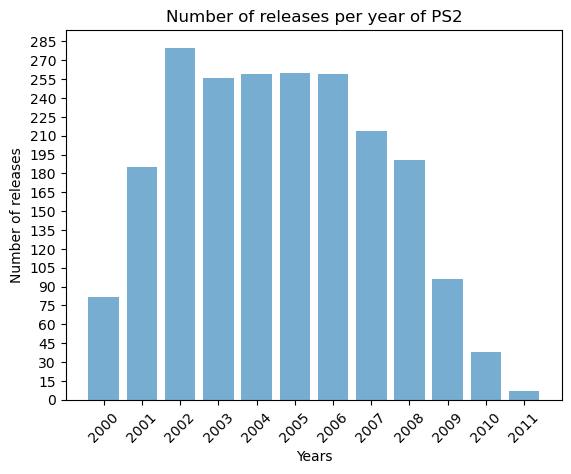

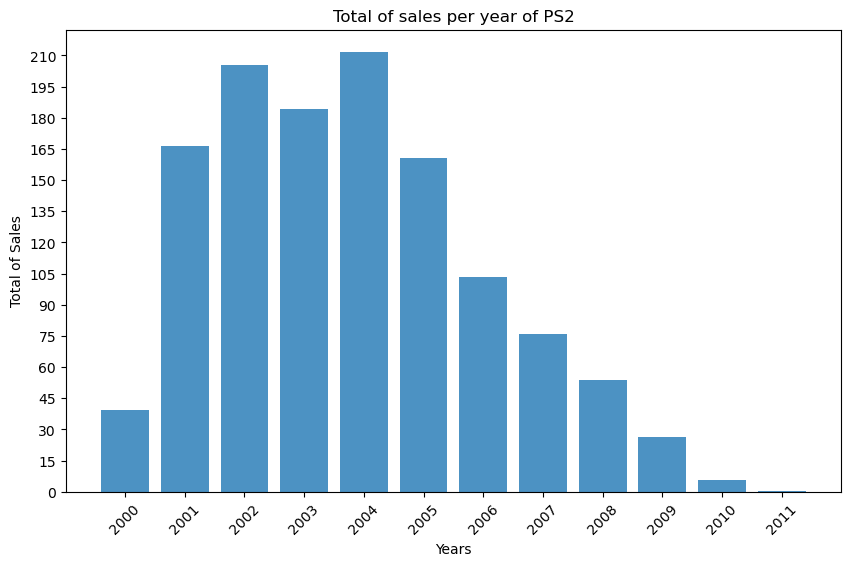

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
13241            Major League Baseball 2K11      PS2             2011   
11237                               FIFA 12      PS2             2011   
9382                       MLB 11: The Show      PS2             2011   
12525             Pro Evolution Soccer 2012      PS2             2011   
15378  Moujuutsukai to Oujisama: Snow Bride      PS2             2011   
...                                     ...      ...              ...   
10915                       ESPN NBA 2Night      PS2             2000   
5198                       NFL GameDay 2001      PS2             2000   
579            Midnight Club: Street Racing      PS2             2000   
4111              Theme Park Roller Coaster      PS2             2000   
1256                Tokyo Xtreme Racer Zero      PS2             2000   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
13241     sports      0.02      0.02      0.00         0.01           NaN   
11237     sports      0.00      0.02      0.00         0.06           NaN   
9382      sports      0.06      0.05      0.00         0.02           NaN   
12525     action      0.00      0.00      0.06         0.00           NaN   
15378  adventure      0.00      0.00      0.02         0.00           NaN   
...          ...       ...       ...       ...          ...           ...   
10915     sports      0.05      0.04      0.00         0.01          62.0   
5198      sports      0.18      0.14      0.00         0.05          51.0   
579       racing      2.00      0.47      0.02         0.14          78.0   
4111    strategy      0.23      0.18      0.00         0.06          82.0   
1256      racing      0.66      0.52      0.15         0.17          76.0   

       user_score   rating  total_sales  
13241         7.1        E         0.05  
11237         NaN  unknown         0.08  
9382          6.2        E         0.13  
12525         8.2        E         0.06  
15378         NaN  unknown         0.02  
...           ...      ...          ...  
10915         7.1        E         0.10  
5198          7.1        E         0.37  
579           7.8        T         2.63  
4111          7.9        E         0.47  
1256          8.9        E         1.50  

[2127 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2011              7               0.45
1              2010             38               5.64
2              2009             96              26.40
3              2008            191              53.90
4              2007            214              75.99
5              2006            259             103.42
6              2005            260             160.66
7              2004            259             211.81
8              2003            256             184.31
9              2002            280             205.38
10             2001            185             166.43
11             2000             82              39.17

year_of_release      mean       var
0              2000  0.477683  0.384428
1              2001  0.899622  3.232336
2              2002  0.733500  1.851211
3              2003  0.719961  0.979501
4              2004  0.817799  2.906448
5              2005  0.617923  0.810647
6              2006  0.399305  0.629172
7              2007  0.355093  0.448173
8              2008  0.282199  0.165224
9              2009  0.275000  0.131282
10             2010  0.148421  0.037376
11             2011  0.064286  0.001829

None
DISTRIBUCIÓN DE X360
El valor mínimo es: 2005
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma X360


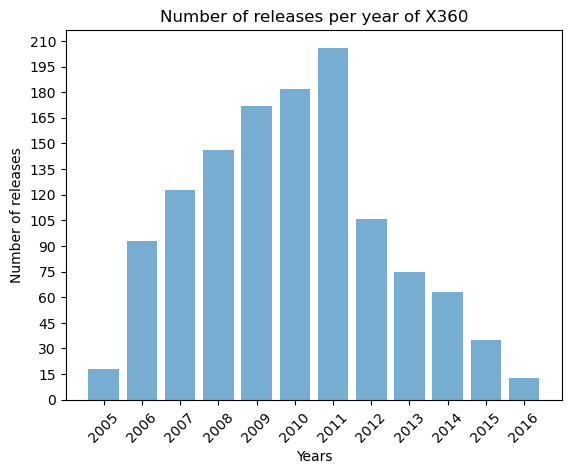

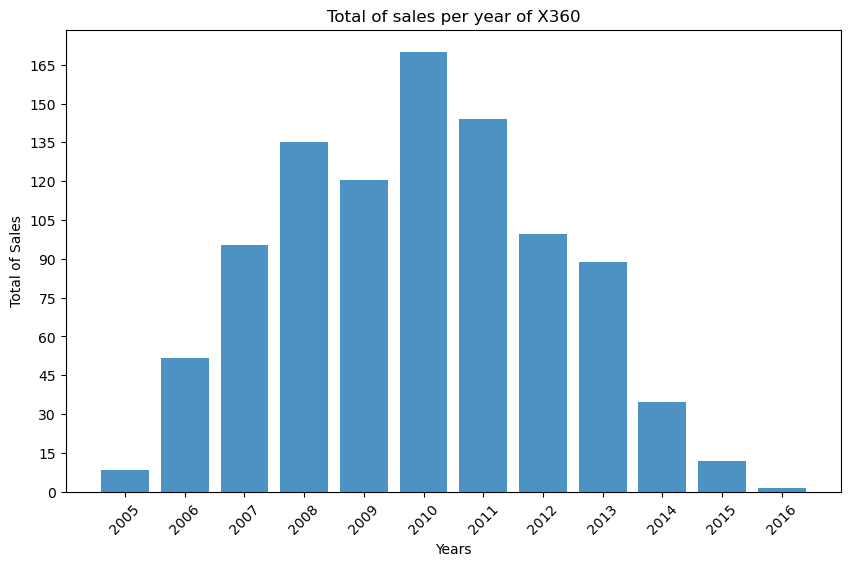

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
5010                                FIFA 17     X360             2016   
9806      Lego Star Wars: The Force Awakens     X360             2016   
14090                       Just Dance 2017     X360             2016   
14356        Batman: A Telltale Game Series     X360             2016   
13751  Call of Duty: Modern Warfare Trilogy     X360             2016   
...                                     ...      ...              ...   
5103                                Quake 4     X360             2005   
4660            Condemned: Criminal Origins     X360             2005   
2648                      Perfect Dark Zero     X360             2005   
10678                               NHL 2K6     X360             2005   
7020                                NBA 2K6     X360             2005   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
5010      sports      0.07      0.28      0.00         0.03           NaN   
9806      action      0.05      0.06      0.00         0.01           NaN   
14090       misc      0.02      0.02      0.00         0.00           NaN   
14356  adventure      0.01      0.02      0.00         0.00           NaN   
13751    shooter      0.02      0.02      0.00         0.00           NaN   
...          ...       ...       ...       ...          ...           ...   
5103     shooter      0.32      0.02      0.00         0.03          75.0   
4660      action      0.36      0.02      0.00         0.03          81.0   
2648     shooter      0.66      0.02      0.03         0.06          81.0   
10678     sports      0.09      0.00      0.00         0.01          75.0   
7020      action      0.21      0.01      0.00         0.02          81.0   

       user_score   rating  total_sales  
5010          1.7        E         0.38  
9806          6.9     E10+         0.12  
14090         7.1     E10+         0.04  
14356         NaN  unknown         0.03  
13751         7.1        M         0.04  
...           ...      ...          ...  
5103          6.7        M         0.37  
4660          8.2        M         0.41  
2648          7.3        M         0.77  
10678         6.1     E10+         0.10  
7020          8.6        E         0.24  

[1232 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2016             13               1.52
1              2015             35              11.96
2              2014             63              34.74
3              2013             75              88.58
4              2012            106              99.74
5              2011            206             143.84
6              2010            182             170.03
7              2009            172             120.29
8              2008            146             135.26
9              2007            123              95.41
10             2006             93              51.62
11             2005             18               8.25

year_of_release      mean       var
0              2005  0.458333  0.234238
1              2006  0.555054  0.851558
2              2007  0.775691  2.458353
3              2008  0.926438  2.100325
4              2009  0.699360  1.961735
5              2010  0.934231  5.025678
6              2011  0.698252  2.329304
7              2012  0.940943  3.222131
8              2013  1.181067  5.990966
9              2014  0.551429  0.559535
10             2015  0.341714  0.182168
11             2016  0.116923  0.013106

None
DISTRIBUCIÓN DE PS3
El valor mínimo es: 2006
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PS3


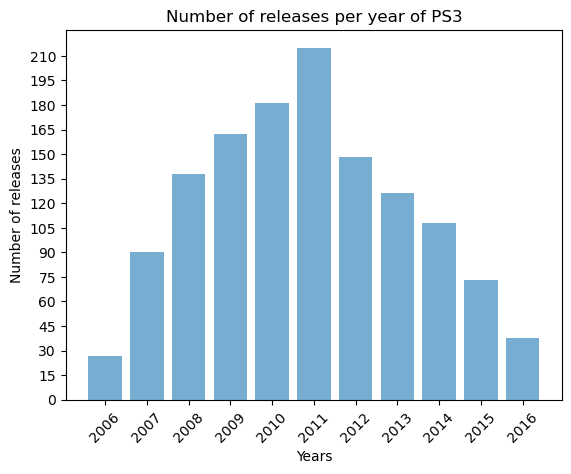

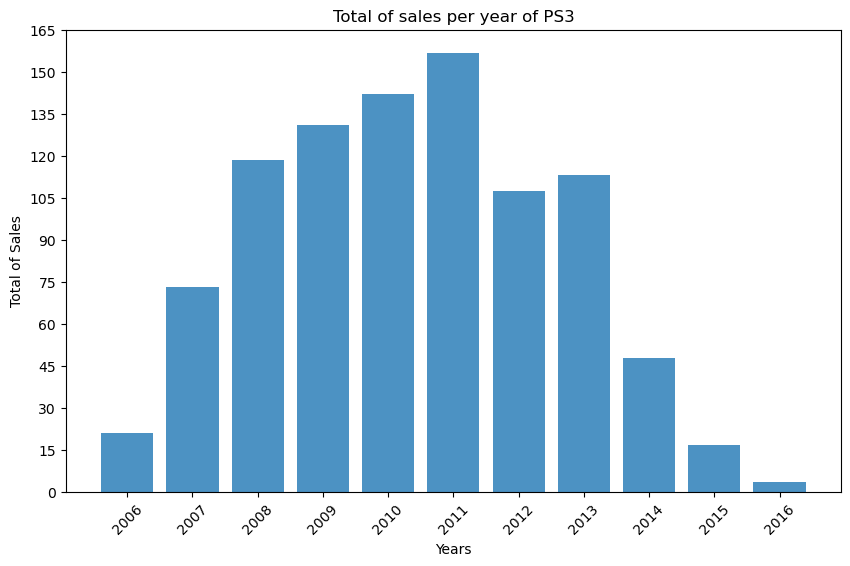

<Figure size 1000x600 with 0 Axes>

name platform  \
16710                      Samurai Warriors: Sanada Maru      PS3   
12493                             Attack on Titan (KOEI)      PS3   
15143                                         Toukiden 2      PS3   
15129                 Aegis of Earth: Protonovus Assault      PS3   
14947  TV Anime Idolm@ster: Cinderella Girls G4U! Pac...      PS3   
...                                                  ...      ...   
3218                               Tony Hawk's Project 8      PS3   
1745                                  Sonic the Hedgehog      PS3   
9647                                       Resident Evil      PS3   
1418                                       Ridge Racer 7      PS3   
3268                     Formula 1: Championship Edition      PS3   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
16710             2016    action      0.00      0.00      0.01         0.00   
12493             2016    action      0.00      0.00      0.06         0.00   
15143             2016    action      0.00      0.00      0.02         0.00   
15129             2016    action      0.01      0.01      0.00         0.00   
14947             2016      misc      0.00      0.00      0.03         0.00   
...                ...       ...       ...       ...       ...          ...   
3218              2006    sports      0.30      0.22      0.01         0.10   
1745              2006  platform      0.41      0.06      0.04         0.66   
9647              2006    action      0.00      0.00      0.12         0.00   
1418              2006    racing      0.24      0.70      0.16         0.26   
3268              2006    racing      0.00      0.57      0.04         0.00   

       critic_score  user_score   rating  total_sales  
16710           NaN         NaN  unknown         0.01  
12493           NaN         NaN  unknown         0.06  
15143           NaN         NaN  unknown         0.02  
15129           NaN         7.1        T         0.02  
14947           NaN         NaN  unknown         0.03  
...             ...         ...      ...          ...  
3218           76.0         7.2        T         0.63  
1745           43.0         4.1     E10+         1.17  
9647            NaN         NaN  unknown         0.12  
1418           78.0         7.1        E         1.36  
3268            NaN         NaN  unknown         0.61  

[1306 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2016             38               3.60
1              2015             73              16.82
2              2014            108              47.76
3              2013            126             113.25
4              2012            148             107.36
5              2011            215             156.78
6              2010            181             142.17
7              2009            162             130.93
8              2008            138             118.52
9              2007             90              73.19
10             2006             27              20.96

year_of_release      mean       var
0              2006  0.776296  1.158986
1              2007  0.813222  1.296490
2              2008  0.858841  1.676842
3              2009  0.808210  1.826079
4              2010  0.785470  2.217366
5              2011  0.729209  2.025148
6              2012  0.725405  2.200915
7              2013  0.898810  4.881795
8              2014  0.442222  0.661655
9              2015  0.230411  0.165565
10             2016  0.094737  0.014534

None
DISTRIBUCIÓN DE Wii
El valor mínimo es: 2006
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma Wii


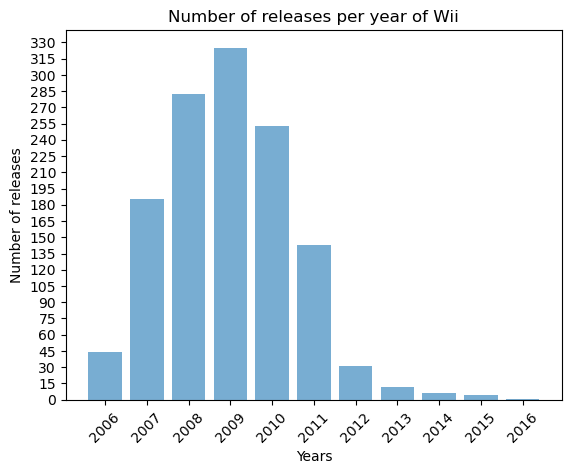

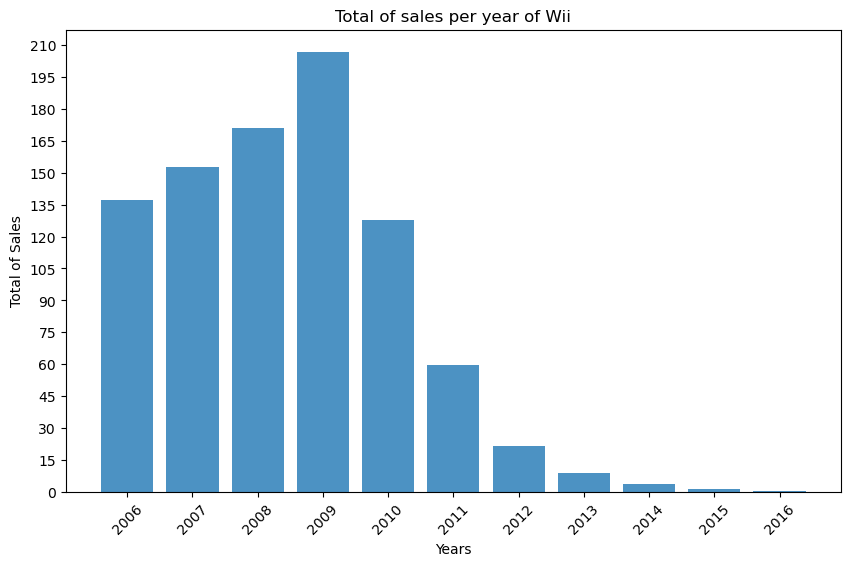

<Figure size 1000x600 with 0 Axes>

name platform  \
8009                                     Just Dance 2017      Wii   
14682                Barbie and Her Sisters Puppy Rescue      Wii   
8941                           Skylanders: SuperChargers      Wii   
16312                  Monster High: New Ghoul in School      Wii   
2179                                     Just Dance 2016      Wii   
...                                                  ...      ...   
7901                                Tamagotchi Party On!      Wii   
4015   SpongeBob SquarePants: Creature from the Krust...      Wii   
4006                                       Madden NFL 07      Wii   
717                      Super Monkey Ball: Banana Blitz      Wii   
0                                             Wii Sports      Wii   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
8009              2016      misc      0.06      0.11      0.00         0.01   
14682             2015    action      0.00      0.03      0.00         0.00   
8941              2015    action      0.02      0.12      0.00         0.01   
16312             2015    action      0.00      0.01      0.00         0.00   
2179              2015      misc      0.41      0.46      0.00         0.08   
...                ...       ...       ...       ...       ...          ...   
7901              2006      misc      0.12      0.00      0.06         0.01   
4015              2006  platform      0.44      0.02      0.00         0.04   
4006              2006    sports      0.46      0.00      0.00         0.04   
717               2006      misc      1.05      0.91      0.04         0.24   
0                 2006    sports     41.36     28.96      3.77         8.45   

       critic_score  user_score   rating  total_sales  
8009            NaN         7.1     E10+         0.18  
14682           NaN         7.1        E         0.03  
8941            NaN         NaN  unknown         0.15  
16312           NaN         7.1        E         0.01  
2179            NaN         7.1     E10+         0.95  
...             ...         ...      ...          ...  
7901            NaN         NaN  unknown         0.19  
4015           57.0         5.6        E         0.50  
4006           81.0         8.0        E         0.50  
717            74.0         5.7        E         2.24  
0              76.0         8.0        E        82.54  

[1286 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2016              1               0.18
1              2015              4               1.14
2              2014              6               3.75
3              2013             12               8.59
4              2012             31              21.71
5              2011            143              59.65
6              2010            253             127.95
7              2009            325             206.97
8              2008            282             171.32
9              2007            185             152.77
10             2006             44             137.15

year_of_release      mean         var
0              2006  3.117045  169.680635
1              2007  0.825784    4.680964
2              2008  0.607518    5.258853
3              2009  0.636831    7.385708
4              2010  0.505731    1.355922
5              2011  0.417133    1.025585
6              2012  0.700323    1.780077
7              2013  0.715833    1.286499
8              2014  0.625000    0.589310
9              2015  0.285000    0.200367
10             2016  0.180000         NaN

None
DISTRIBUCIÓN DE DS
El valor mínimo es: 1985
El valor máximo es: 2013
Años de lanzamiento y ventas de videojuegos de la plataforma DS


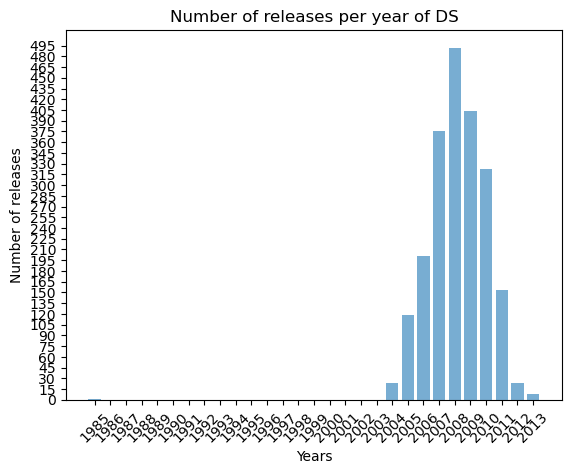

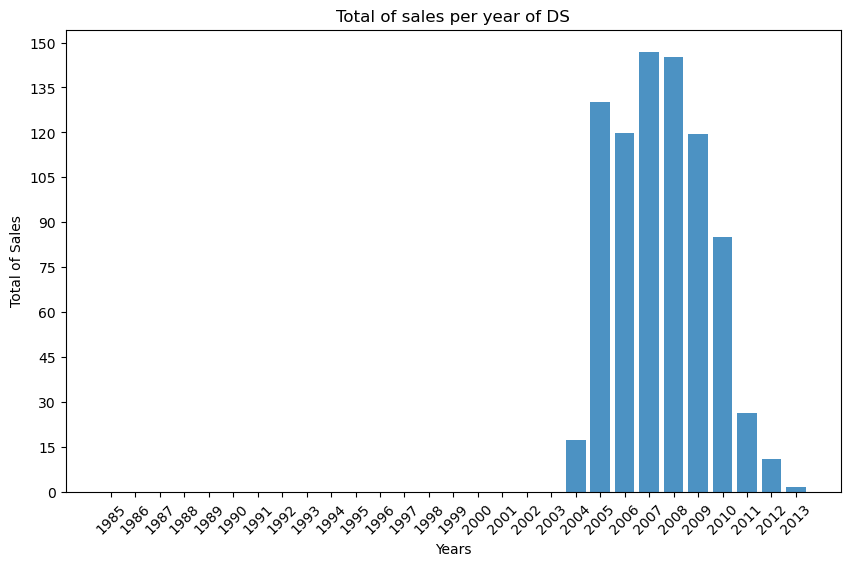

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
7460                          Disney's Planes       DS             2013   
14353                Turbo: Super Stunt Squad       DS             2013   
14716  LEGO Legends of Chima: Laval's Journey       DS             2013   
11973          The Croods: Prehistoric Party!       DS             2013   
5054                 LEGO Marvel Super Heroes       DS             2013   
...                                       ...      ...              ...   
3414                        Asphalt: Urban GT       DS             2004   
10940               Puyo Pop Fever (JP sales)       DS             2004   
10073                               Ping Pals       DS             2004   
9148               Mr. Driller: Drill Spirits       DS             2004   
15957     Strongest Tokyo University Shogi DS       DS             1985   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
7460   simulation      0.11      0.08      0.00         0.02           NaN   
14353      sports      0.00      0.03      0.00         0.00           NaN   
14716   adventure      0.00      0.03      0.00         0.00           NaN   
11973        misc      0.03      0.04      0.00         0.01           NaN   
5054       action      0.22      0.13      0.00         0.03           NaN   
...           ...       ...       ...       ...          ...           ...   
3414       racing      0.31      0.22      0.00         0.06          60.0   
10940      puzzle      0.00      0.00      0.09         0.00           NaN   
10073        misc      0.10      0.00      0.00         0.01          28.0   
9148       puzzle      0.08      0.00      0.05         0.01          70.0   
15957      action      0.00      0.00      0.02         0.00           NaN   

       user_score   rating  total_sales  
7460          7.1        E         0.21  
14353         7.1        E         0.03  
14716         7.1     E10+         0.03  
11973         NaN  unknown         0.08  
5054          4.8     E10+         0.38  
...           ...      ...          ...  
3414          7.5        E         0.59  
10940         NaN  unknown         0.09  
10073         3.9        E         0.11  
9148          8.9        E         0.14  
15957         NaN  unknown         0.02  

[2121 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2013              8               1.54
1              2012             23              11.01
2              2011            153              26.18
3              2010            323              85.02
4              2009            403             119.54
5              2008            492             145.31
6              2007            376             146.94
7              2006            201             119.81
8              2005            118             130.14
9              2004             23              17.27
10             1985              1               0.02

year_of_release      mean        var
0              1985  0.020000        NaN
1              2004  0.750870   4.556799
2              2005  1.102881  15.895862
3              2006  0.596070   6.380646
4              2007  0.390798   0.726048
5              2008  0.295346   0.385795
6              2009  0.296625   0.615196
7              2010  0.263220   0.814115
8              2011  0.171111   0.069781
9              2012  0.478696   2.793157
10             2013  0.192500   0.029593

None
DISTRIBUCIÓN DE PS
El valor mínimo es: 1994
El valor máximo es: 2003
Años de lanzamiento y ventas de videojuegos de la plataforma PS


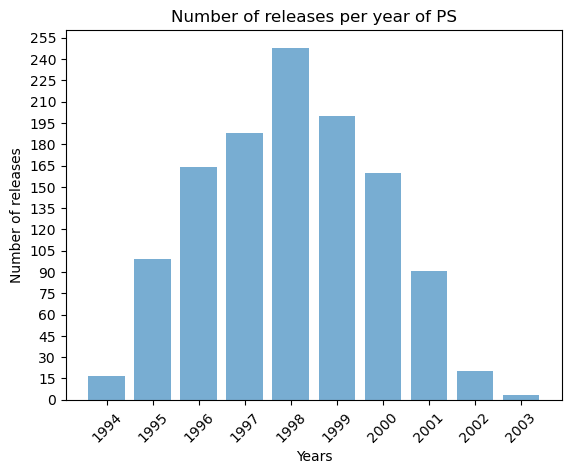

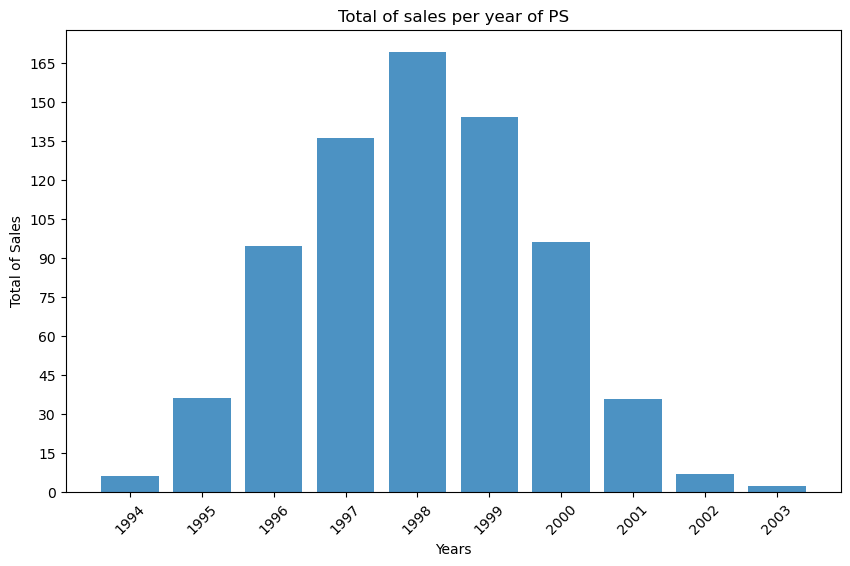

<Figure size 1000x600 with 0 Axes>

name platform  \
4572                                  Big Strike Bowling       PS   
1621   Disney's Tarzan / Disney's Aladdin in Nasira's...       PS   
4756   Disney's Hercules / Disney's The Jungle Book: ...       PS   
15875                                   Big Bass Fishing       PS   
12615                            Klonoa Beach Volleyball       PS   
...                                                  ...      ...   
3489                                          Theme Park       PS   
2582                                         Ridge Racer       PS   
5083                          Kileak: The DNA Imperative       PS   
10677                                     Crime Crackers       PS   
7925                                     ThunderStrike 2       PS   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
4572              2003        sports      0.23      0.16      0.00   
1621              2003          misc      0.69      0.47      0.00   
4756              2003          misc      0.23      0.15      0.00   
15875             2002        action      0.00      0.00      0.02   
12615             2002        sports      0.03      0.02      0.00   
...                ...           ...       ...       ...       ...   
3489              1994    simulation      0.24      0.16      0.13   
2582              1994        racing      0.00      0.00      0.74   
5083              1994       shooter      0.08      0.06      0.21   
10677             1994  role-playing      0.00      0.00      0.09   
7925              1994    simulation      0.10      0.07      0.00   

       other_sales  critic_score  user_score   rating  total_sales  
4572          0.03           NaN         NaN  unknown         0.42  
1621          0.08           NaN         NaN  unknown         1.24  
4756          0.03           NaN         NaN  unknown         0.41  
15875         0.00           NaN         7.2        E         0.02  
12615         0.00           NaN         NaN  unknown         0.05  
...            ...           ...         ...      ...          ...  
3489          0.04           NaN         NaN  unknown         0.57  
2582          0.05           NaN         NaN  unknown         0.79  
5083          0.02           NaN         NaN  unknown         0.37  
10677         0.01           NaN         NaN  unknown         0.10  
7925          0.01           NaN         NaN  unknown         0.18  

[1190 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2003              3               2.07
1             2002             20               6.67
2             2001             91              35.59
3             2000            160              96.37
4             1999            200             144.53
5             1998            248             169.49
6             1997            188             136.17
7             1996            164              94.70
8             1995             99              35.96
9             1994             17               6.03

year_of_release      mean       var
0             1994  0.354706  0.110651
1             1995  0.363232  0.403926
2             1996  0.577439  1.037204
3             1997  0.724309  1.855846
4             1998  0.683427  1.114885
5             1999  0.722650  1.484298
6             2000  0.602313  0.916119
7             2001  0.391099  0.302870
8             2002  0.333500  0.356634
9             2003  0.690000  0.226900

None
DISTRIBUCIÓN DE GBA
El valor mínimo es: 2000
El valor máximo es: 2007
Años de lanzamiento y ventas de videojuegos de la plataforma GBA


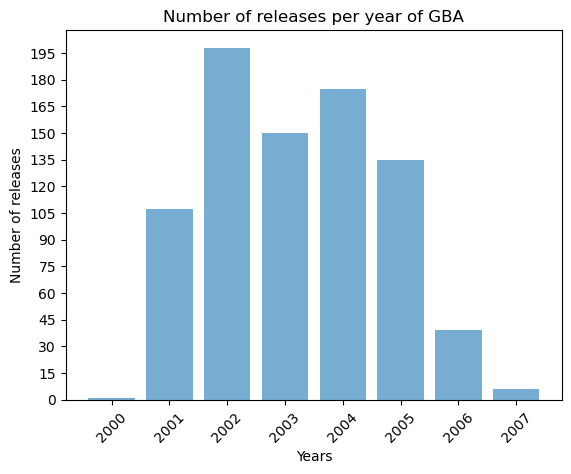

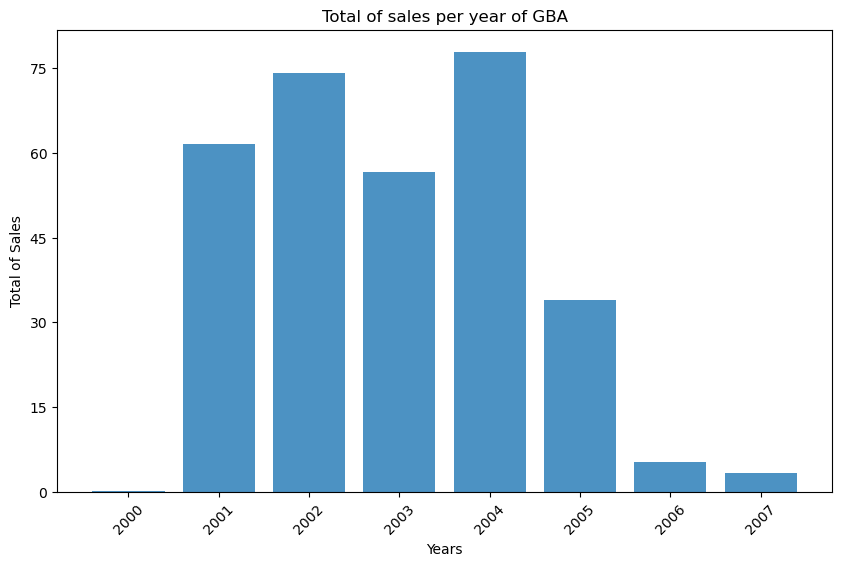

<Figure size 1000x600 with 0 Axes>

name platform  \
1667        Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA   
7044                       Barbie as The Island Princess      GBA   
15804         Cabbage Patch Kids: The Patch Puppy Rescue      GBA   
16483                              Petz: Hamsterz Life 2      GBA   
1001   2 Games in 1 Double Pack: The Incredibles / Fi...      GBA   
...                                                  ...      ...   
6233                              Power Pro Kun Pocket 3      GBA   
6260                                        M&M's Blast!      GBA   
14364            The Flintstones: Big Trouble in Bedrock      GBA   
14247                                  Monster Guardians      GBA   
12300             ESPN Winter X-Games: Snowboarding 2002      GBA   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
1667              2007          misc      0.87      0.32      0.00   
7044              2007     adventure      0.16      0.06      0.00   
15804             2007          misc      0.01      0.00      0.00   
16483             2007          misc      0.01      0.00      0.00   
1001              2007        action      1.26      0.47      0.00   
...                ...           ...       ...       ...       ...   
6233              2001        sports      0.00      0.00      0.27   
6260              2001        puzzle      0.20      0.07      0.00   
14364             2001      platform      0.02      0.01      0.00   
14247             2001  role-playing      0.00      0.00      0.03   
12300             2000        sports      0.05      0.02      0.00   

       other_sales  critic_score  user_score   rating  total_sales  
1667          0.02           NaN         NaN  unknown         1.21  
7044          0.00           NaN         NaN  unknown         0.22  
15804         0.00           NaN         NaN  unknown         0.01  
16483         0.00           NaN         NaN  unknown         0.01  
1001          0.03           NaN         NaN  unknown         1.76  
...            ...           ...         ...      ...          ...  
6233          0.01           NaN         NaN  unknown         0.28  
6260          0.00           NaN         NaN  unknown         0.27  
14364         0.00           NaN         NaN  unknown         0.03  
14247         0.00           NaN         NaN  unknown         0.03  
12300         0.00           NaN         NaN  unknown         0.07  

[811 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2007              6               3.40
1             2006             39               5.28
2             2005            135              33.86
3             2004            175              77.91
4             2003            150              56.67
5             2002            198              74.16
6             2001            107              61.53
7             2000              1               0.07

year_of_release      mean       var
0             2000  0.070000       NaN
1             2001  0.575047  1.156269
2             2002  0.374545  1.440716
3             2003  0.377800  0.384984
4             2004  0.445200  0.943230
5             2005  0.250815  0.102469
6             2006  0.135385  0.041815
7             2007  0.566667  0.543947

None
DISTRIBUCIÓN DE PS4
El valor mínimo es: 2013
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PS4


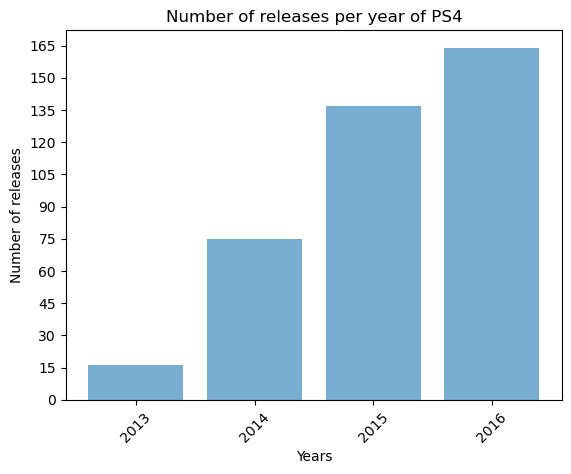

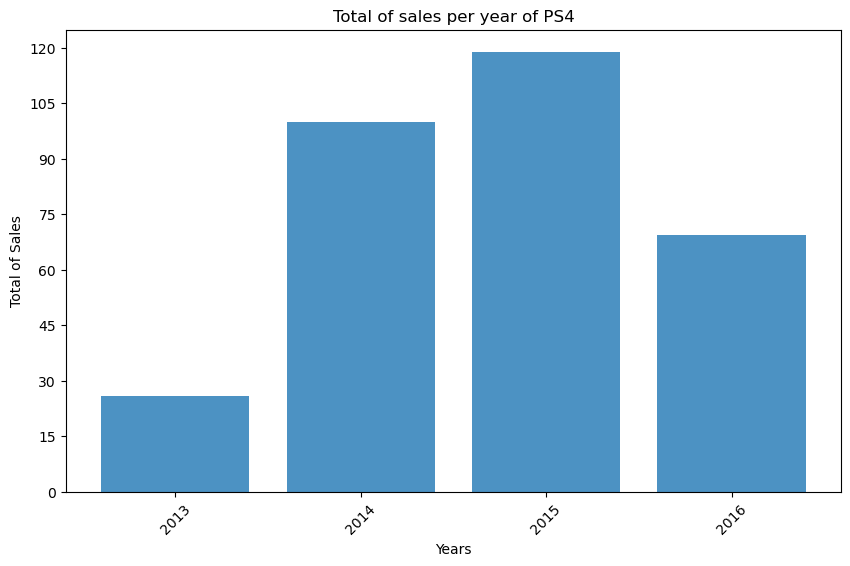

<Figure size 1000x600 with 0 Axes>

name platform  \
7578   The Heavy Rain and Beyond: Two Souls Collection      PS4   
11213                   Batman: A Telltale Game Series      PS4   
9117                                            XCOM 2      PS4   
9197                                     7 Days to Die      PS4   
9224                 Dead Island Definitive Collection      PS4   
...                                                ...      ...   
357                                      Battlefield 4      PS4   
509                    Assassin's Creed IV: Black Flag      PS4   
1139                          LEGO Marvel Super Heroes      PS4   
7296                             Angry Birds Star Wars      PS4   
863                              Need for Speed Rivals      PS4   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
7578              2016     action      0.00      0.17      0.00         0.03   
11213             2016  adventure      0.03      0.05      0.00         0.01   
9117              2016   strategy      0.04      0.08      0.00         0.02   
9197              2016     action      0.04      0.08      0.00         0.02   
9224              2016     action      0.03      0.07      0.01         0.02   
...                ...        ...       ...       ...       ...          ...   
357               2013    shooter      1.35      1.55      0.17         0.51   
509               2013     action      1.07      1.31      0.06         0.42   
1139              2013     action      0.59      0.76      0.01         0.26   
7296              2013   strategy      0.10      0.08      0.00         0.04   
863               2013     racing      0.73      0.92      0.03         0.30   

       critic_score  user_score   rating  total_sales  
7578            NaN         NaN  unknown         0.20  
11213           NaN         NaN  unknown         0.09  
9117           88.0         8.0        T         0.14  
9197           45.0         5.9        M         0.14  
9224           63.0         6.4        M         0.13  
...             ...         ...      ...          ...  
357            85.0         6.9        M         3.58  
509            83.0         7.8        M         2.86  
1139           83.0         7.7     E10+         1.62  
7296           47.0         2.0        E         0.22  
863            80.0         6.2     E10+         1.98  

[392 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016            164              69.25
1             2015            137             118.90
2             2014             75             100.00
3             2013             16              25.99

year_of_release      mean       var
0             2013  1.624375  1.565453
1             2014  1.333333  4.202966
2             2015  0.867883  3.449082
3             2016  0.422256  0.938722

None
DISTRIBUCIÓN DE PSP
El valor mínimo es: 2004
El valor máximo es: 2015
Años de lanzamiento y ventas de videojuegos de la plataforma PSP


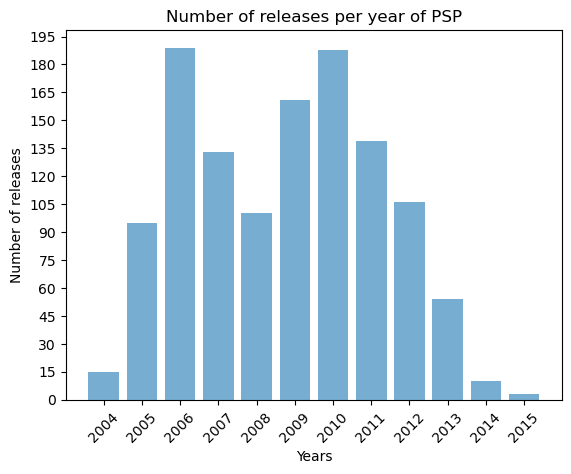

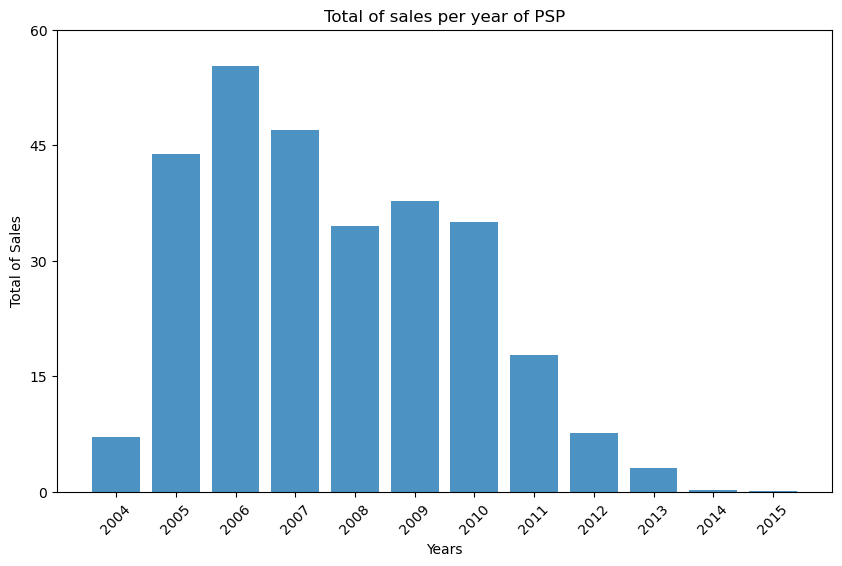

<Figure size 1000x600 with 0 Axes>

name platform  \
16069                 Meiji Toukyou Renka: Twilight Kiss      PSP   
11486          Uta no Prince-Sama: All Star After Secret      PSP   
15996                       Harukanaru Toki no Naka de 6      PSP   
16129                                  Shinobi Koutsutsu      PSP   
16603                   Satomi Hakkenden: Hachi Tamanoki      PSP   
...                                                  ...      ...   
9069   The Legend of Heroes II: Prophecy of the Moonl...      PSP   
8964             Darkstalkers Chronicle: The Chaos Tower      PSP   
2385                                     Metal Gear Ac!d      PSP   
5455                                  Ape Escape Academy      PSP   
8320                                  Mahjong Fight Club      PSP   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
16069             2015        action      0.00      0.00      0.02   
11486             2015        action      0.00      0.00      0.08   
15996             2015        action      0.00      0.00      0.02   
16129             2014     adventure      0.00      0.00      0.01   
16603             2014     adventure      0.00      0.00      0.01   
...                ...           ...       ...       ...       ...   
9069              2004  role-playing      0.03      0.00      0.11   
8964              2004      fighting      0.13      0.00      0.00   
2385              2004      strategy      0.32      0.26      0.12   
5455              2004          misc      0.13      0.15      0.00   
8320              2004          misc      0.00      0.00      0.17   

       other_sales  critic_score  user_score   rating  total_sales  
16069         0.00           NaN         NaN  unknown         0.02  
11486         0.00           NaN         NaN  unknown         0.08  
15996         0.00           NaN         NaN  unknown         0.02  
16129         0.00           NaN         NaN  unknown         0.01  
16603         0.00           NaN         NaN  unknown         0.01  
...            ...           ...         ...      ...          ...  
9069          0.00          63.0         6.9     E10+         0.14  
8964          0.01          74.0         7.9        T         0.14  
2385          0.17           NaN         NaN  unknown         0.87  
5455          0.05          51.0         5.8     E10+         0.33  
8320          0.00           NaN         NaN  unknown         0.17  

[1193 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2015              3               0.12
1              2014             10               0.24
2              2013             54               3.14
3              2012            106               7.69
4              2011            139              17.82
5              2010            188              35.04
6              2009            161              37.78
7              2008            100              34.55
8              2007            133              46.93
9              2006            189              55.32
10             2005             95              43.84
11             2004             15               7.06

year_of_release      mean       var
0              2004  0.470667  0.349192
1              2005  0.461474  0.836128
2              2006  0.292698  0.375737
3              2007  0.352857  0.320361
4              2008  0.345500  0.479231
5              2009  0.234658  0.152888
6              2010  0.186383  0.193581
7              2011  0.128201  0.022119
8              2012  0.072547  0.005920
9              2013  0.058148  0.004091
10             2014  0.024000  0.000693
11             2015  0.040000  0.001200

None
DISTRIBUCIÓN DE PC
El valor mínimo es: 1985
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PC


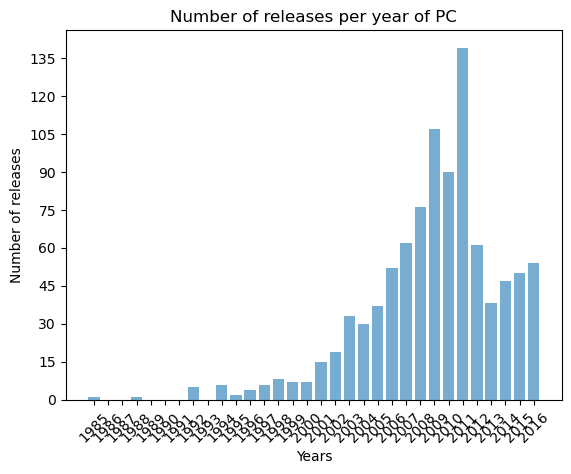

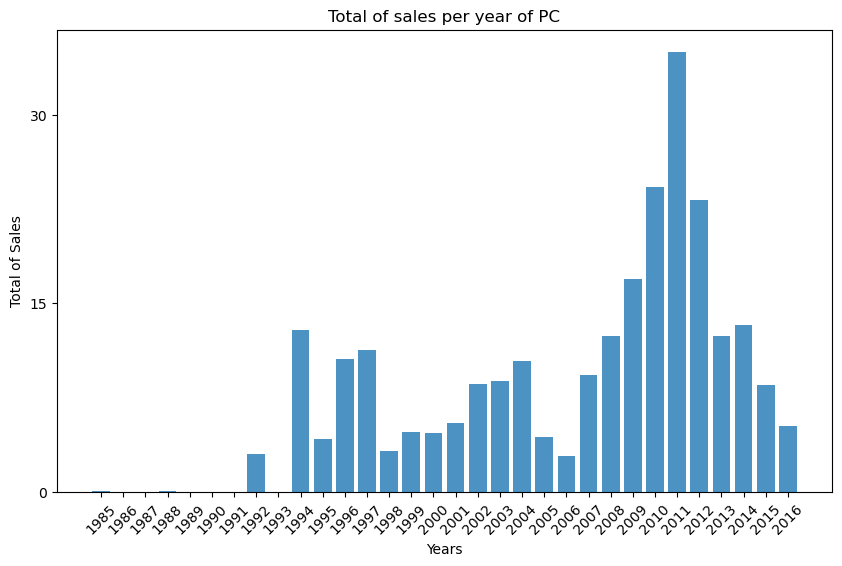

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release       genre  na_sales  \
13535   Life is Strange       PC             2016   adventure      0.01   
7328        Doom (2016)       PC             2016     shooter      0.07   
14400        DiRT Rally       PC             2016      racing      0.00   
14375  Song of the Deep       PC             2016      action      0.03   
7778          Mafia III       PC             2016      action      0.08   
...                 ...      ...              ...         ...       ...   
2612      The 7th Guest       PC             1992   adventure      0.02   
769        SimCity 2000       PC             1992  simulation      1.20   
12650         Syndicate       PC             1992    strategy      0.00   
14621           SimCity       PC             1988  simulation      0.00   
14470         Alter Ego       PC             1985  simulation      0.00   

       eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
13535      0.04       0.0         0.00          83.0         8.6        M   
7328       0.13       0.0         0.02           NaN         NaN  unknown   
14400      0.03       0.0         0.00          86.0         8.7        E   
14375      0.00       0.0         0.00          73.0         6.3        E   
7778       0.10       0.0         0.02          63.0         3.2        M   
...         ...       ...          ...           ...         ...      ...   
2612       0.77       0.0         0.00           NaN         NaN        T   
769        0.84       0.0         0.10           NaN         NaN  unknown   
12650      0.05       0.0         0.01           NaN         NaN  unknown   
14621      0.02       0.0         0.01          64.0         2.2     E10+   
14470      0.03       0.0         0.01          59.0         5.8        T   

       total_sales  
13535         0.05  
7328          0.22  
14400         0.03  
14375         0.03  
7778          0.20  
...            ...  
2612          0.79  
769           2.14  
12650         0.06  
14621         0.03  
14470         0.04  

[957 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2016             54               5.25
1              2015             50               8.52
2              2014             47              13.28
3              2013             38              12.38
4              2012             61              23.22
5              2011            139              35.03
6              2010             90              24.28
7              2009            107              16.91
8              2008             76              12.42
9              2007             62               9.28
10             2006             52               2.85
11             2005             37               4.37
12             2004             30              10.39
13             2003             33               8.84
14             2002             19               8.57
15             2001             15               5.47
16             2000              7               4.66
17             1999              7               4.74
18             1998              8               3.26
19             1997              6              11.27
20             1996              4              10.58
21             1995              2               4.22
22             1994              6              12.87
23             1992              5               3.03
24             1988              1               0.03
25             1985              1               0.04

year_of_release      mean       var
0              1985  0.040000       NaN
1              1988  0.030000       NaN
2              1992  0.606000  0.842980
3              1994  2.145000  1.442270
4              1995  2.110000  8.736200
5              1996  2.645000  3.279833
6              1997  1.878333  2.552697
7              1998  0.407500  0.507936
8              1999  0.677143  0.685857
9              2000  0.665714  1.268829
10             2001  0.364667  0.505355
11             2002  0.451053  1.181643
12             2003  0.267879  0.289267
13             2004  0.346333  1.444803
14             2005  0.118108  0.066188
15             2006  0.054808  0.009661
16             2007  0.149677  0.306370
17             2008  0.163421  0.097503
18             2009  0.158037  0.613146
19             2010  0.269778  0.398422
20             2011  0.252014  0.277576
21             2012  0.380656  0.603726
22             2013  0.325789  0.173236
23             2014  0.282553  0.239637
24             2015  0.170400  0.069396
25             2016  0.097222  0.018473

None
DISTRIBUCIÓN DE 3DS
El valor mínimo es: 2011
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma 3DS


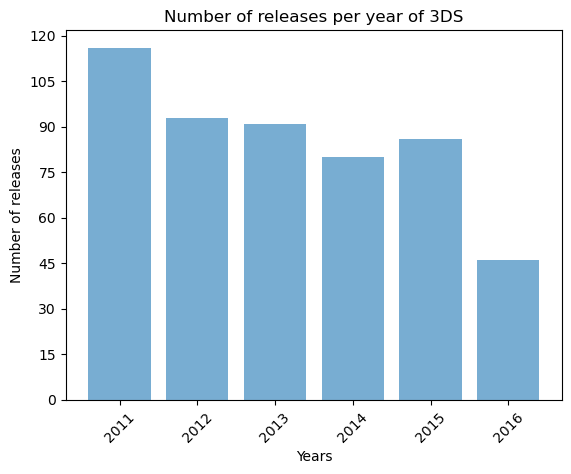

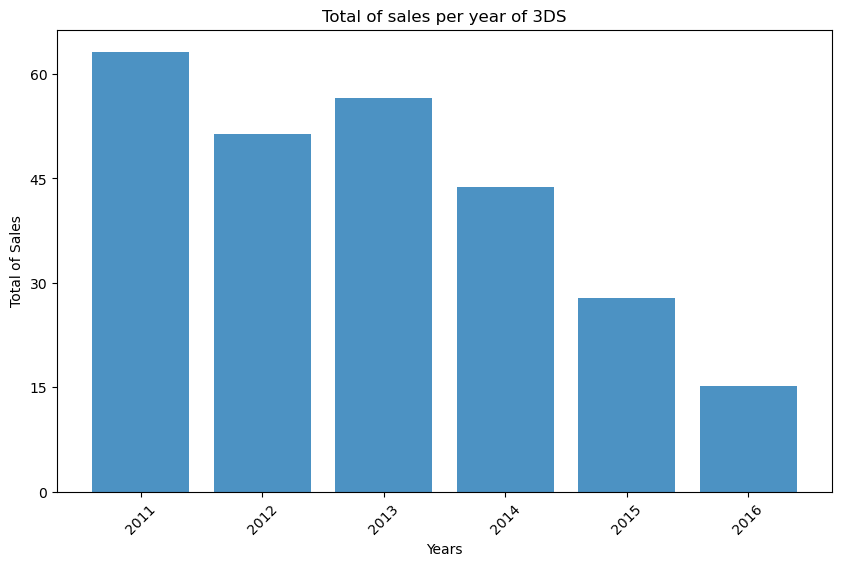

<Figure size 1000x600 with 0 Axes>

name platform  \
3593                                    Yokai Sangokushi      3DS   
14147  Super Battle For Money Sentouchuu: Kyuukyoku n...      3DS   
7371                                Dragon Ball: Fusions      3DS   
7747                        Shin Megami Tensei IV: Final      3DS   
5840                              Mario Party: Star Rush      3DS   
...                                                  ...      ...   
6796                  Ace Combat: Assault Horizon Legacy      3DS   
6609                                       Zoo Resort 3D      3DS   
12815                        Yuugen Gaisha Brave Company      3DS   
12818                    Ken to Mahou to Gakuen Mono. 3D      3DS   
16688                      Outdoors Unleashed: Africa 3D      3DS   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
3593              2016        action      0.00      0.00      0.56   
14147             2016        action      0.00      0.00      0.03   
7371              2016  role-playing      0.02      0.00      0.19   
7747              2016  role-playing      0.05      0.00      0.14   
5840              2016          misc      0.08      0.13      0.08   
...                ...           ...       ...       ...       ...   
6796              2011    simulation      0.10      0.06      0.08   
6609              2011    simulation      0.11      0.09      0.03   
12815             2011      strategy      0.00      0.00      0.06   
12818             2011  role-playing      0.00      0.00      0.06   
16688             2011        sports      0.01      0.00      0.00   

       other_sales  critic_score  user_score   rating  total_sales  
3593          0.00           NaN         NaN  unknown         0.56  
14147         0.00           NaN         NaN  unknown         0.03  
7371          0.00          68.0         7.6        T         0.21  
7747          0.01           NaN         NaN  unknown         0.20  
5840          0.02          68.0         6.8        E         0.31  
...            ...           ...         ...      ...          ...  
6796          0.01          71.0         7.8        T         0.25  
6609          0.02           NaN         7.1        E         0.25  
12815         0.00           NaN         NaN  unknown         0.06  
12818         0.00           NaN         NaN  unknown         0.06  
16688         0.00           NaN         7.1        T         0.01  

[512 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             46              15.14
1             2015             86              27.78
2             2014             80              43.76
3             2013             91              56.57
4             2012             93              51.36
5             2011            116              63.20

year_of_release      mean       var
0             2011  0.544828  2.618778
1             2012  0.552258  1.993089
2             2013  0.621648  3.059901
3             2014  0.547000  2.683234
4             2015  0.323023  0.389739
5             2016  0.329130  1.120493

None
DISTRIBUCIÓN DE XB
El valor mínimo es: 2000
El valor máximo es: 2008
Años de lanzamiento y ventas de videojuegos de la plataforma XB


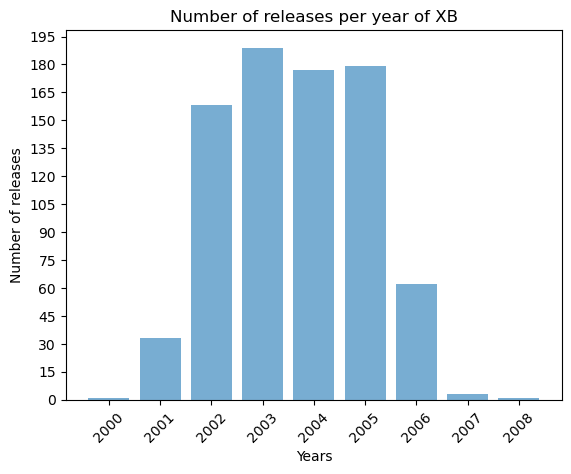

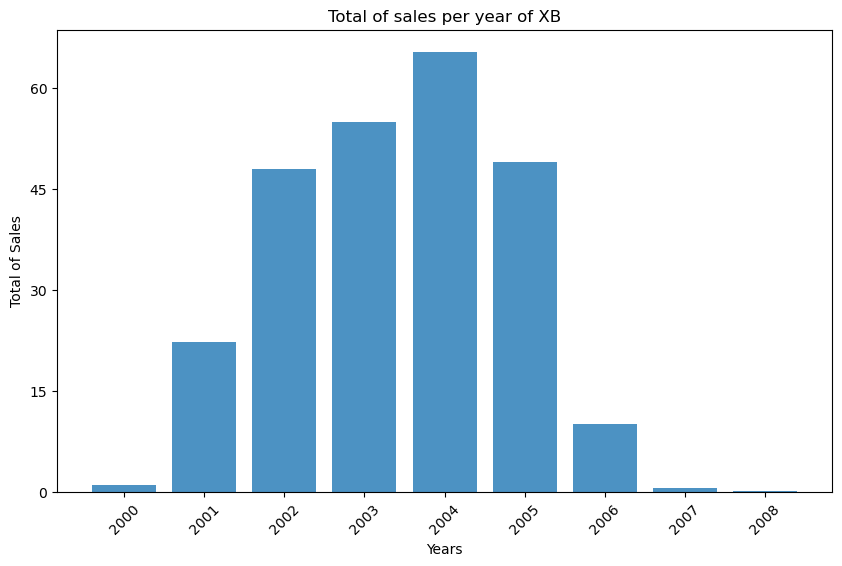

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release     genre  \
8184                        Madden NFL 09       XB             2008    sports   
8106                          Van Helsing       XB             2007    action   
11270                    NCAA Football 08       XB             2007    sports   
6023                        Madden NFL 08       XB             2007    sports   
13390  Full Spectrum Warrior: Ten Hammers       XB             2006  strategy   
...                                   ...      ...              ...       ...   
4478                           SSX Tricky       XB             2001    sports   
7509                     NASCAR Heat 2002       XB             2001    racing   
12288                     Kabuki Warriors       XB             2001    action   
4838                        NBA Live 2002       XB             2001    sports   
2076                       NFL Fever 2002       XB             2000    sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
8184       0.13      0.04       0.0         0.01           NaN         5.5   
8106       0.13      0.04       0.0         0.01          63.0         7.6   
11270      0.06      0.02       0.0         0.00          82.0         8.1   
6023       0.22      0.06       0.0         0.01          76.0         6.0   
13390      0.03      0.01       0.0         0.00          69.0         7.1   
...         ...       ...       ...          ...           ...         ...   
4478       0.32      0.09       0.0         0.02          88.0         8.5   
7509       0.15      0.04       0.0         0.01          78.0         7.1   
12288      0.05      0.01       0.0         0.00          32.0         2.5   
4838       0.35      0.03       0.0         0.02          76.0         7.5   
2076       0.74      0.21       0.0         0.04          79.0         8.5   

      rating  total_sales  
8184       E         0.18  
8106       T         0.18  
11270      E         0.08  
6023       E         0.29  
13390      M         0.04  
...      ...          ...  
4478       E         0.43  
7509       E         0.20  
12288      M         0.06  
4838       E         0.40  
2076       E         0.99  

[803 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2008              1               0.18
1             2007              3               0.55
2             2006             62              10.04
3             2005            179              49.08
4             2004            177              65.42
5             2003            189              55.04
6             2002            158              48.01
7             2001             33              22.26
8             2000              1               0.99

year_of_release      mean       var
0             2000  0.990000       NaN
1             2001  0.674545  1.308169
2             2002  0.303861  0.202713
3             2003  0.291217  0.158903
4             2004  0.369605  0.563053
5             2005  0.274190  0.117936
6             2006  0.161935  0.039298
7             2007  0.183333  0.011033
8             2008  0.180000       NaN

None
DISTRIBUCIÓN DE GB
El valor mínimo es: 1988
El valor máximo es: 2001
Años de lanzamiento y ventas de videojuegos de la plataforma GB


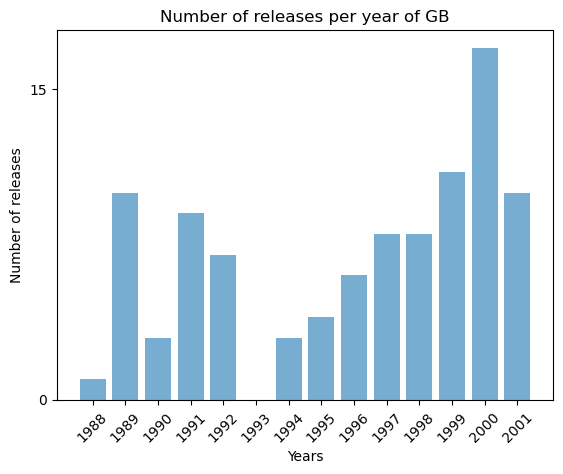

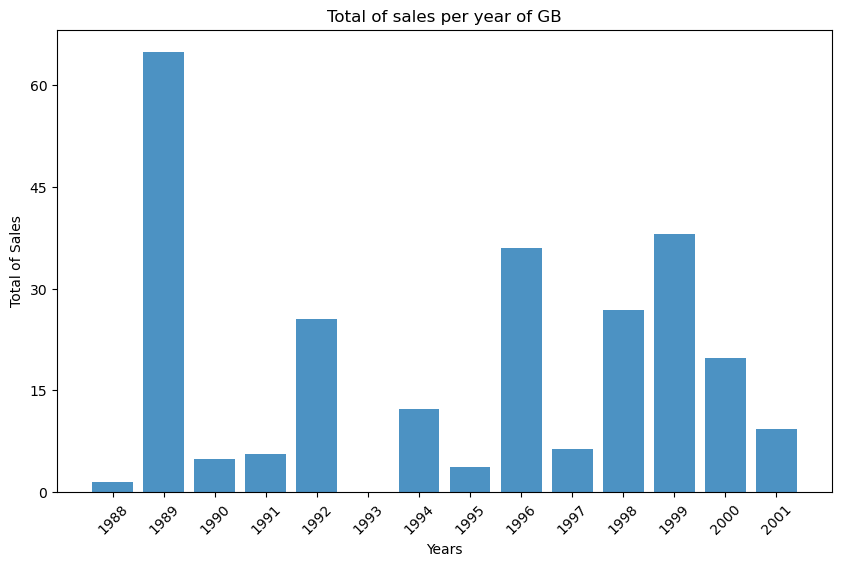

<Figure size 1000x600 with 0 Axes>

name platform  \
9873                Medarot 4: Kabuto / Kuwagata Version       GB   
2331               Pokemon Card GB2: Here Comes Team GR!       GB   
3590                            Hamtaro: Ham-Hams Unite!       GB   
4931   From TV Animation One Piece: Yume no Lufy Kaiz...       GB   
11847                                  Mega Man Xtreme 2       GB   
...                                                  ...      ...   
172                                            Dr. Mario       GB   
1856                            The Final Fantasy Legend       GB   
21                                      Super Mario Land       GB   
1145                                            Baseball       GB   
1340                                  Disney's DuckTales       GB   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
9873              2001  role-playing      0.00      0.00      0.12   
2331              2001      strategy      0.00      0.00      0.89   
3590              2001  role-playing      0.00      0.00      0.56   
4931              2001  role-playing      0.00      0.00      0.39   
11847             2001      platform      0.00      0.00      0.07   
...                ...           ...       ...       ...       ...   
172               1989        puzzle      2.18      0.96      2.00   
1856              1989  role-playing      0.00      0.00      1.10   
21                1989      platform     10.83      2.71      4.18   
1145              1989        sports      0.66      0.27      0.65   
1340              1988      platform      0.82      0.23      0.35   

       other_sales  critic_score  user_score   rating  total_sales  
9873          0.00           NaN         NaN  unknown         0.12  
2331          0.00           NaN         NaN  unknown         0.89  
3590          0.00           NaN         NaN  unknown         0.56  
4931          0.00           NaN         NaN  unknown         0.39  
11847         0.00           NaN         NaN  unknown         0.07  
...            ...           ...         ...      ...          ...  
172           0.20           NaN         NaN  unknown         5.34  
1856          0.00           NaN         NaN  unknown         1.10  
21            0.42           NaN         NaN  unknown        18.14  
1145          0.03           NaN         NaN  unknown         1.61  
1340          0.03           NaN         NaN  unknown         1.43  

[97 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              2001             10               9.24
1              2000             17              19.76
2              1999             11              38.00
3              1998              8              26.90
4              1997              8               6.37
5              1996              6              36.03
6              1995              4               3.60
7              1994              3              12.18
8              1992              7              25.49
9              1991              9               5.57
10             1990              3               4.89
11             1989             10              64.97
12             1988              1               1.43

year_of_release      mean         var
0              1988  1.430000         NaN
1              1989  6.497000   96.689712
2              1990  1.630000    2.544400
3              1991  0.618889    0.299711
4              1992  3.641429   13.740648
5              1994  4.060000    1.129900
6              1995  0.900000    0.968800
7              1996  6.005000  155.243510
8              1997  0.796250    0.301055
9              1998  3.362500   22.067650
10             1999  3.454545   45.958867
11             2000  1.162353    2.409832
12             2001  0.924000    0.592382

None
DISTRIBUCIÓN DE NES
El valor mínimo es: 1983
El valor máximo es: 1994
Años de lanzamiento y ventas de videojuegos de la plataforma NES


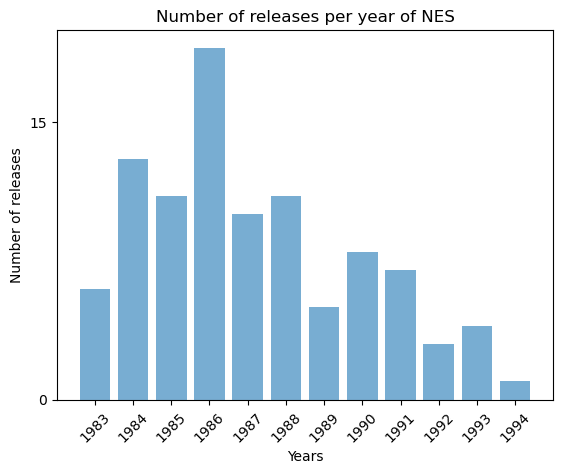

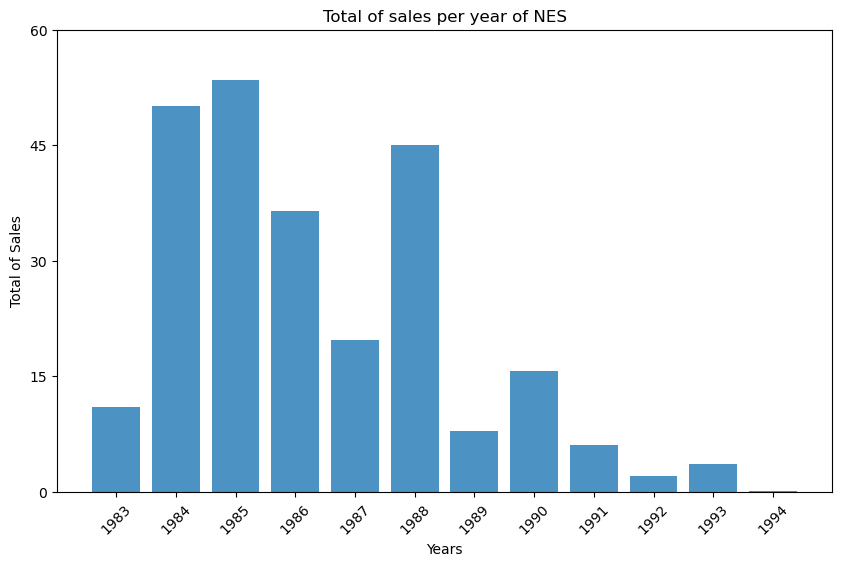

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release         genre  na_sales  \
10290  Final Fantasy I & II      NES             1994  role-playing      0.00   
1010      Kirby's Adventure      NES             1993      platform      0.79   
5202          Jurassic Park      NES             1993        action      0.25   
2102               Tetris 2      NES             1993        puzzle      0.62   
3841             Mega Man 6      NES             1993      platform      0.28   
...                     ...      ...              ...           ...       ...   
698             Mario Bros.      NES             1983      platform      0.51   
1809            Donkey Kong      NES             1983      platform      0.23   
1859                 Popeye      NES             1983      platform      0.51   
426                Baseball      NES             1983        sports      0.73   
772                 Mahjong      NES             1983          misc      0.01   

       eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
10290      0.00      0.11         0.00           NaN         NaN  unknown   
1010       0.14      0.80         0.02           NaN         NaN  unknown   
5202       0.10      0.00         0.01           NaN         NaN  unknown   
2102       0.13      0.21         0.02           NaN         NaN  unknown   
3841       0.07      0.16         0.01           NaN         NaN  unknown   
...         ...       ...          ...           ...         ...      ...   
698        0.12      1.63         0.02           NaN         NaN  unknown   
1809       0.05      0.84         0.01           NaN         NaN  unknown   
1859       0.12      0.45         0.02           NaN         NaN  unknown   
426        0.10      2.35         0.02           NaN         NaN  unknown   
772        0.00      2.13         0.00           NaN         NaN  unknown   

       total_sales  
10290         0.11  
1010          1.75  
5202          0.36  
2102          0.98  
3841          0.52  
...            ...  
698           2.28  
1809          1.13  
1859          1.10  
426           3.20  
772           2.14  

[98 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0              1994              1               0.11
1              1993              4               3.61
2              1992              3               1.98
3              1991              7               6.11
4              1990              8              15.73
5              1989              5               7.85
6              1988             11              45.01
7              1987             10              19.76
8              1986             19              36.41
9              1985             11              53.44
10             1984             13              50.08
11             1983              6              10.96

year_of_release      mean         var
0              1983  1.826667    0.743347
1              1984  3.852308   55.179386
2              1985  4.858182  138.415836
3              1986  1.916316    1.708025
4              1987  1.976000    1.333404
5              1988  4.091818   23.487276
6              1989  1.570000    2.447350
7              1990  1.966250    2.032741
8              1991  0.872857    0.316790
9              1992  0.660000    0.288300
10             1993  0.902500    0.388292
11             1994  0.110000         NaN

None
DISTRIBUCIÓN DE N64
El valor mínimo es: 1996
El valor máximo es: 2002
Años de lanzamiento y ventas de videojuegos de la plataforma N64


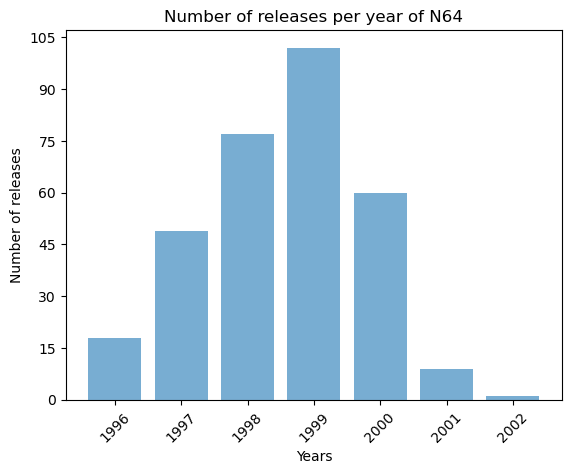

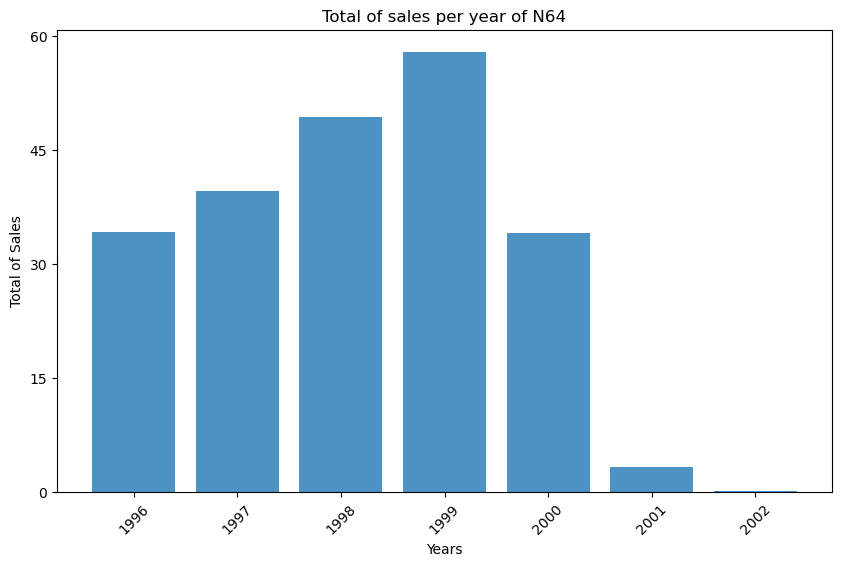

<Figure size 1000x600 with 0 Axes>

name platform  \
11498                           Tony Hawk's Pro Skater 3      N64   
10637                   Aidyn Chronicles: The First Mage      N64   
8586            The Powerpuff Girls: Chemical X-Traction      N64   
8588          Jikkyou Powerful Pro Yakyuu Basic-han 2001      N64   
2690                            Tony Hawk's Pro Skater 2      N64   
...                                                  ...      ...   
3809                           Wayne Gretzky's 3D Hockey      N64   
7200   Chou-Kuukan Night Pro Yakyuu King(higher JP sa...      N64   
6501                                 Nightmare Creatures      N64   
63                                         Mario Kart 64      N64   
45                                        Super Mario 64      N64   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
11498             2002        sports      0.06      0.02      0.00   
10637             2001  role-playing      0.08      0.02      0.00   
8586              2001        action      0.13      0.03      0.00   
8588              2001        sports      0.00      0.00      0.12   
2690              2001        sports      0.59      0.16      0.00   
...                ...           ...       ...       ...       ...   
3809              1996        sports      0.49      0.03      0.00   
7200              1996        sports      0.00      0.00      0.22   
6501              1996        action      0.21      0.05      0.00   
63                1996        racing      5.55      1.94      2.23   
45                1996      platform      6.91      2.85      1.91   

       other_sales  critic_score  user_score   rating  total_sales  
11498         0.00           NaN         NaN  unknown         0.08  
10637         0.00           NaN         NaN  unknown         0.10  
8586          0.00           NaN         NaN  unknown         0.16  
8588          0.04           NaN         NaN  unknown         0.16  
2690          0.01           NaN         NaN  unknown         0.76  
...            ...           ...         ...      ...          ...  
3809          0.00           NaN         NaN  unknown         0.52  
7200          0.00           NaN         NaN  unknown         0.22  
6501          0.00           NaN         NaN  unknown         0.26  
63            0.15           NaN         NaN  unknown         9.87  
45            0.23           NaN         NaN  unknown        11.90  

[316 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2002              1               0.08
1             2001              9               3.25
2             2000             60              33.97
3             1999            102              57.87
4             1998             77              49.24
5             1997             49              39.50
6             1996             18              34.10

year_of_release      mean        var
0             1996  1.894444  11.560508
1             1997  0.806122   2.033920
2             1998  0.639481   1.118268
3             1999  0.567353   1.035527
4             2000  0.566167   0.604156
5             2001  0.361111   0.066211
6             2002  0.080000        NaN

None
DISTRIBUCIÓN DE SNES
El valor mínimo es: 1990
El valor máximo es: 1999
Años de lanzamiento y ventas de videojuegos de la plataforma SNES


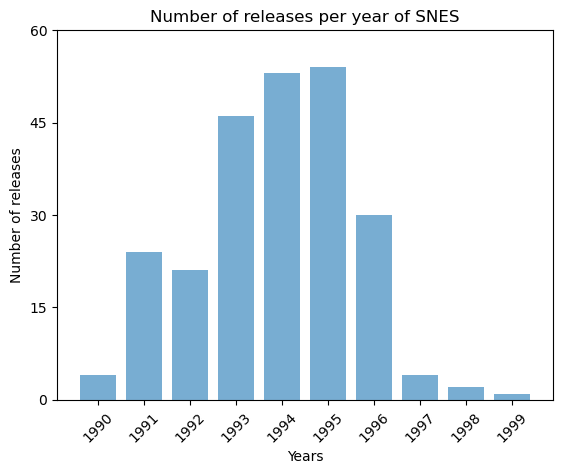

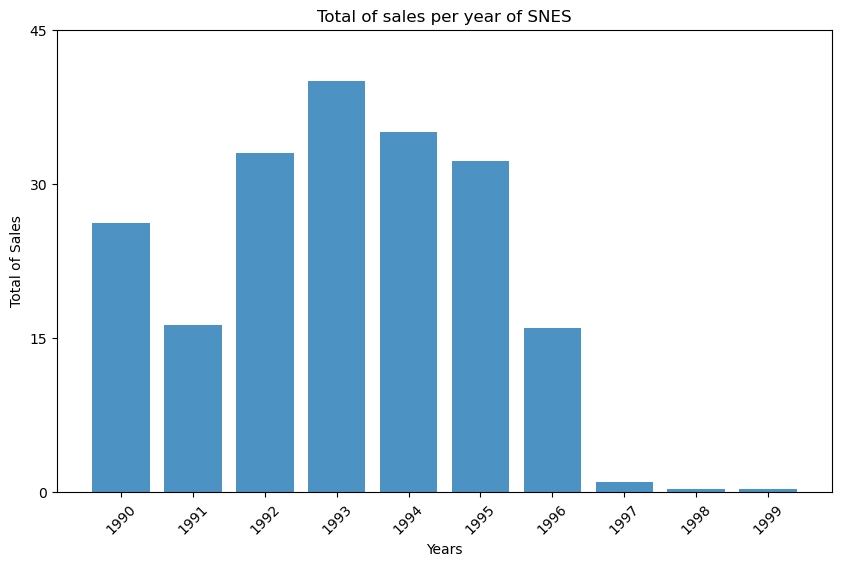

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
6554             Fire Emblem: Thracia 776     SNES             1999   
11403                   Derby Stallion 98     SNES             1998   
9222                      RockMan & Forte     SNES             1998   
5196                 Kirby's Dream Land 3     SNES             1997   
8450   Itoi Shigesato no Bass Tsuri No. 1     SNES             1997   
...                                   ...      ...              ...   
7068                         Super R-Type     SNES             1991   
1195                          Final Fight     SNES             1990   
511                                F-Zero     SNES             1990   
1791                           Pilotwings     SNES             1990   
18                      Super Mario World     SNES             1990   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
6554     strategy      0.00      0.00      0.26         0.00           NaN   
11403      sports      0.00      0.00      0.08         0.00           NaN   
9222     platform      0.00      0.00      0.14         0.00           NaN   
5196     platform      0.00      0.00      0.36         0.00           NaN   
8450       sports      0.00      0.00      0.17         0.00           NaN   
...           ...       ...       ...       ...          ...           ...   
7068      shooter      0.00      0.00      0.23         0.00           NaN   
1195       action      0.67      0.17      0.69         0.03           NaN   
511        racing      1.37      0.51      0.89         0.07           NaN   
1791   simulation      0.46      0.17      0.48         0.02           NaN   
18       platform     12.78      3.75      3.54         0.55           NaN   

       user_score   rating  total_sales  
6554          NaN  unknown         0.26  
11403         NaN  unknown         0.08  
9222          NaN  unknown         0.14  
5196          NaN  unknown         0.36  
8450          NaN  unknown         0.17  
...           ...      ...          ...  
7068          NaN  unknown         0.23  
1195          NaN  unknown         1.56  
511           NaN  unknown         2.84  
1791          NaN  unknown         1.13  
18            NaN  unknown        20.62  

[239 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             1999              1               0.26
1             1998              2               0.22
2             1997              4               0.99
3             1996             30              15.92
4             1995             54              32.20
5             1994             53              35.08
6             1993             46              40.02
7             1992             21              32.98
8             1991             24              16.22
9             1990              4              26.15

year_of_release      mean        var
0             1990  6.537500  88.668292
1             1991  0.675833   1.010660
2             1992  1.570476   5.331885
3             1993  0.870000   2.579258
4             1994  0.661887   1.787616
5             1995  0.596296   1.101194
6             1996  0.530667   0.557986
7             1997  0.247500   0.009692
8             1998  0.110000   0.001800
9             1999  0.260000        NaN

None
DISTRIBUCIÓN DE GC
El valor mínimo es: 2001
El valor máximo es: 2007
Años de lanzamiento y ventas de videojuegos de la plataforma GC


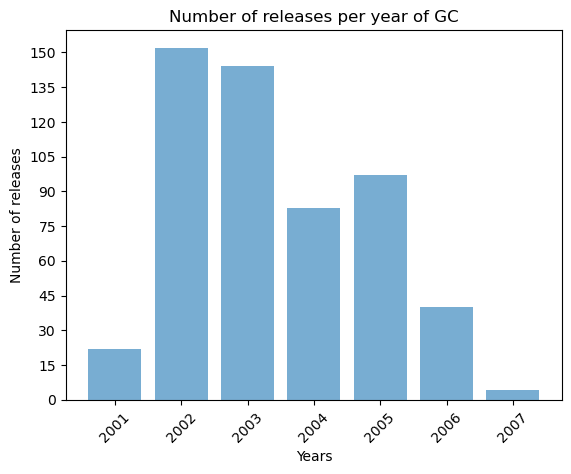

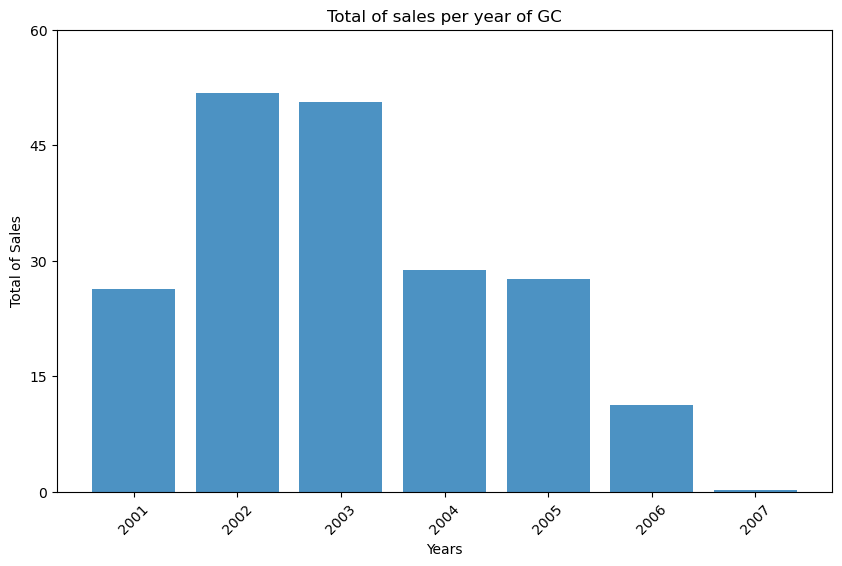

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release     genre  \
9015                   Ratatouille       GC             2007    action   
11687                Madden NFL 08       GC             2007    sports   
13566  Disney's Meet the Robinsons       GC             2007    action   
16394                    Surf's Up       GC             2007    sports   
6608                    Happy Feet       GC             2006    action   
...                            ...      ...              ...       ...   
3721                    SSX Tricky       GC             2001    sports   
2504      Tony Hawk's Pro Skater 3       GC             2001    sports   
7228        All-Star Baseball 2002       GC             2001    sports   
4058                    Crazy Taxi       GC             2001    racing   
111        Super Smash Bros. Melee       GC             2001  fighting   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
9015       0.11      0.03      0.00         0.00          60.0         5.6   
11687      0.06      0.02      0.00         0.00          75.0         7.0   
13566      0.03      0.01      0.00         0.00          68.0         7.1   
16394      0.01      0.00      0.00         0.00           NaN         7.1   
6608       0.20      0.05      0.00         0.01           NaN         8.6   
...         ...       ...       ...          ...           ...         ...   
3721       0.42      0.11      0.00         0.01          87.0         8.6   
2504       0.64      0.17      0.00         0.02          91.0         9.0   
7228       0.17      0.04      0.00         0.01          66.0         5.6   
4058       0.36      0.09      0.02         0.01          69.0         7.5   
111        4.41      1.04      1.39         0.22          92.0         9.1   

      rating  total_sales  
9015       E         0.14  
11687      E         0.08  
13566   E10+         0.04  
16394   E10+         0.01  
6608       E         0.26  
...      ...          ...  
3721       E         0.54  
2504       T         0.83  
7228       E         0.22  
4058       T         0.48  
111        T         7.06  

[542 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2007              4               0.27
1             2006             40              11.26
2             2005             97              27.62
3             2004             83              28.82
4             2003            144              50.61
5             2002            152              51.81
6             2001             22              26.34

year_of_release      mean       var
0             2001  1.197273  2.794497
1             2002  0.340855  0.545200
2             2003  0.351458  0.502417
3             2004  0.347229  0.174781
4             2005  0.284742  0.133167
5             2006  0.281500  0.100757
6             2007  0.067500  0.003158

None
DISTRIBUCIÓN DE XOne
El valor mínimo es: 2013
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma XOne


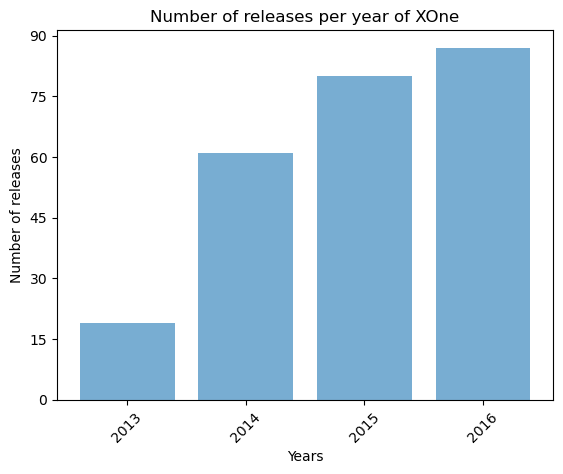

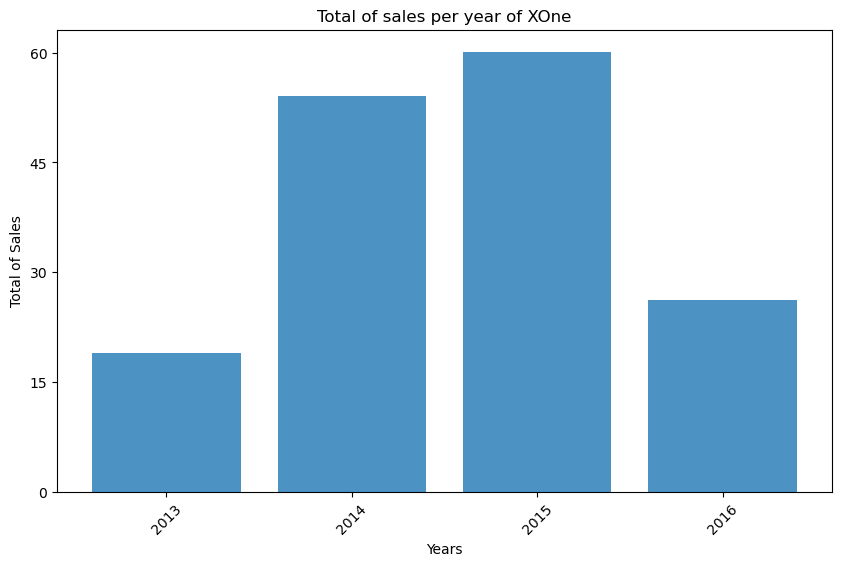

<Figure size 1000x600 with 0 Axes>

name platform  \
16672  Metal Gear Solid V: The Definitive Experience     XOne   
10821                         Skylanders Imaginators     XOne   
4095            Plants vs. Zombies: Garden Warfare 2     XOne   
11629           Assassin's Creed The Ezio Collection     XOne   
3606                                   Quantum Break     XOne   
...                                              ...      ...   
5690                           Skylanders SWAP Force     XOne   
1176                                   Dead Rising 3     XOne   
2956                           Need for Speed Rivals     XOne   
1400                               Ryse: Son of Rome     XOne   
5190                               Zoo Tycoon (2013)     XOne   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
16672             2016      action      0.01      0.00      0.00         0.00   
10821             2016    platform      0.05      0.04      0.00         0.01   
4095              2016     shooter      0.29      0.15      0.00         0.04   
11629             2016      action      0.03      0.04      0.00         0.01   
3606              2016      action      0.30      0.20      0.01         0.05   
...                ...         ...       ...       ...       ...          ...   
5690              2013    platform      0.22      0.06      0.00         0.03   
1176              2013      action      1.06      0.35      0.01         0.15   
2956              2013      racing      0.46      0.17      0.00         0.07   
1400              2013      action      0.83      0.43      0.00         0.13   
5190              2013  simulation      0.18      0.15      0.00         0.03   

       critic_score  user_score   rating  total_sales  
16672           NaN         7.1        M         0.01  
10821          78.0         6.0     E10+         0.10  
4095           80.0         8.1     E10+         0.48  
11629          74.0         7.6        M         0.08  
3606           77.0         6.8        M         0.56  
...             ...         ...      ...          ...  
5690            NaN         5.5     E10+         0.31  
1176           78.0         6.8        M         1.57  
2956           75.0         5.8     E10+         0.70  
1400           60.0         6.1        M         1.39  
5190            NaN         NaN  unknown         0.36  

[247 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             87              26.15
1             2015             80              60.14
2             2014             61              54.07
3             2013             19              18.96

year_of_release      mean       var
0             2013  0.997895  0.718362
1             2014  0.886393  1.460283
2             2015  0.751750  1.524911
3             2016  0.300575  0.301547

None
DISTRIBUCIÓN DE 2600
El valor mínimo es: 1980
El valor máximo es: 1989
Años de lanzamiento y ventas de videojuegos de la plataforma 2600


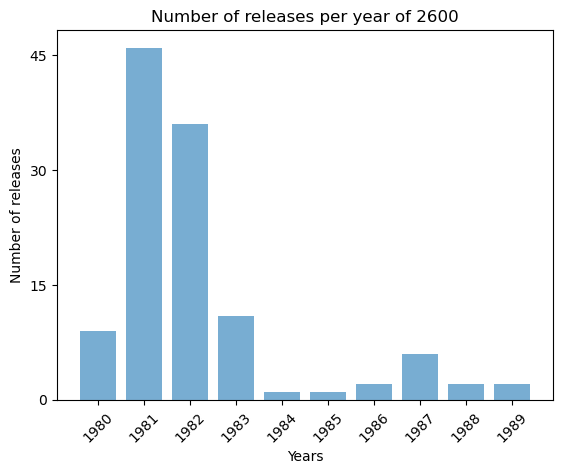

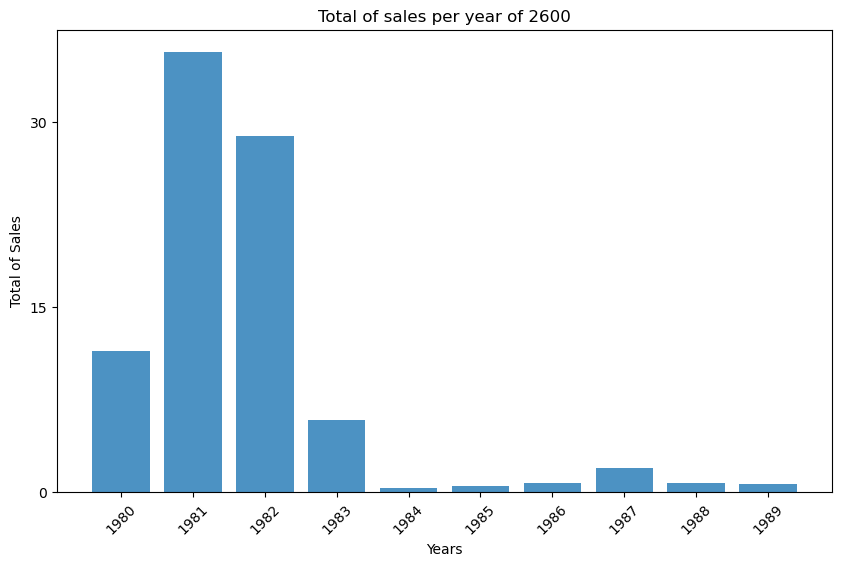

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release     genre  na_sales  eu_sales  \
4129   Double Dragon     2600             1989    action      0.45      0.02   
8741            Klax     2600             1989    puzzle      0.14      0.01   
6921         Rampage     2600             1988    action      0.22      0.01   
3930   River Raid II     2600             1988   shooter      0.47      0.03   
3111  Kung-Fu Master     2600             1987    action      0.60      0.04   
...              ...      ...              ...       ...       ...       ...   
4019      Ice Hockey     2600             1980    sports      0.46      0.03   
1968        Defender     2600             1980      misc      0.99      0.05   
2650          Boxing     2600             1980  fighting      0.72      0.04   
6300          Bridge     2600             1980      misc      0.25      0.02   
1764         Kaboom!     2600             1980      misc      1.07      0.07   

      jp_sales  other_sales  critic_score  user_score   rating  total_sales  
4129       0.0         0.01           NaN         NaN  unknown         0.48  
8741       0.0         0.00           NaN         NaN  unknown         0.15  
6921       0.0         0.00           NaN         NaN  unknown         0.23  
3930       0.0         0.01           NaN         NaN  unknown         0.51  
3111       0.0         0.01           NaN         NaN  unknown         0.65  
...        ...          ...           ...         ...      ...          ...  
4019       0.0         0.01           NaN         NaN  unknown         0.50  
1968       0.0         0.01           NaN         NaN  unknown         1.05  
2650       0.0         0.01           NaN         NaN  unknown         0.77  
6300       0.0         0.00           NaN         NaN  unknown         0.27  
1764       0.0         0.01           NaN         NaN  unknown         1.15  

[116 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             1989              2               0.63
1             1988              2               0.74
2             1987              6               1.94
3             1986              2               0.67
4             1985              1               0.45
5             1984              1               0.27
6             1983             11               5.84
7             1982             36              28.88
8             1981             46              35.68
9             1980              9              11.38

year_of_release      mean       var
0             1980  1.264444  1.914203
1             1981  0.775652  0.613118
2             1982  0.802222  1.582338
3             1983  0.530909  0.102289
4             1984  0.270000       NaN
5             1985  0.450000       NaN
6             1986  0.335000  0.002450
7             1987  0.323333  0.054547
8             1988  0.370000  0.039200
9             1989  0.315000  0.054450

None
DISTRIBUCIÓN DE WiiU
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma WiiU


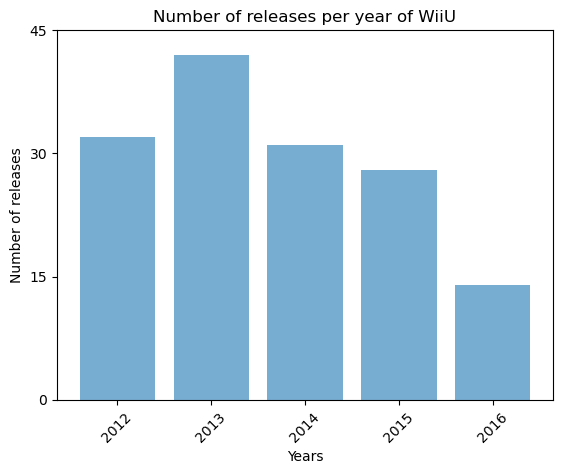

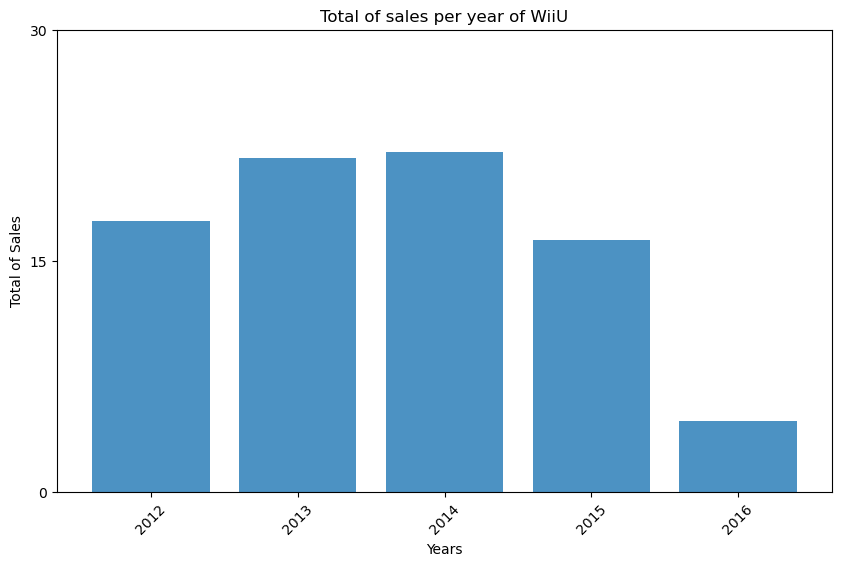

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
16652                             Fast Racing Neo      WiiU             2016   
5174                                Star Fox: Zero     WiiU             2016   
10847                              Just Dance 2017     WiiU             2016   
5376   Mario & Sonic at the Rio 2016 Olympic Games     WiiU             2016   
2973                                     Minecraft     WiiU             2016   
...                                            ...      ...              ...   
4706                    Call of Duty: Black Ops II     WiiU             2012   
8024                       Tekken Tag Tournament 2     WiiU             2012   
14316                                      Trine 2     WiiU             2012   
11471                      Warriors Orochi 3 Hyper     WiiU             2012   
8034                                Ninja Gaiden 3     WiiU             2012   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16652    action      0.00      0.01      0.00         0.00          81.0   
5174    shooter      0.17      0.10      0.07         0.03          69.0   
10847      misc      0.03      0.06      0.00         0.01           NaN   
5376     action      0.07      0.14      0.11         0.02           NaN   
2973       misc      0.28      0.17      0.18         0.04           NaN   
...         ...       ...       ...       ...          ...           ...   
4706    shooter      0.20      0.18      0.00         0.03          81.0   
8024   fighting      0.09      0.07      0.01         0.01           NaN   
14316  platform      0.00      0.03      0.00         0.00           NaN   
11471    action      0.04      0.02      0.02         0.01          64.0   
8034     action      0.14      0.03      0.00         0.02           NaN   

       user_score   rating  total_sales  
16652         8.5        E         0.01  
5174          7.4     E10+         0.37  
10847         7.1     E10+         0.10  
5376          NaN  unknown         0.34  
2973          NaN  unknown         0.67  
...           ...      ...          ...  
4706          6.9        M         0.41  
8024          NaN  unknown         0.18  
14316         NaN  unknown         0.03  
11471         7.4        T         0.09  
8034          NaN  unknown         0.19  

[147 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             14               4.60
1             2015             28              16.35
2             2014             31              22.03
3             2013             42              21.65
4             2012             32              17.56

year_of_release      mean       var
0             2012  0.548750  1.311876
1             2013  0.515476  0.627835
2             2014  0.710645  2.222960
3             2015  0.583929  1.016854
4             2016  0.328571  0.121198

None
DISTRIBUCIÓN DE PSV
El valor mínimo es: 2011
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PSV


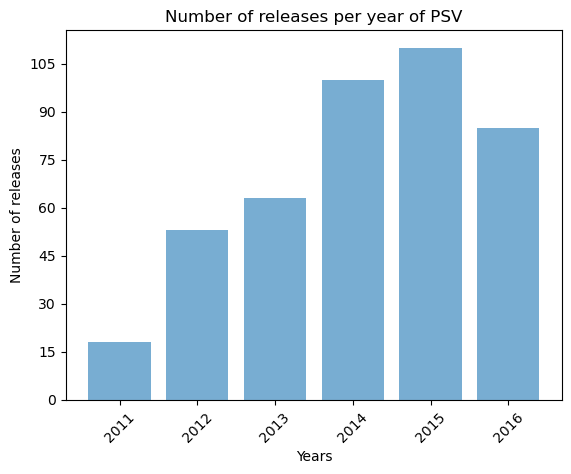

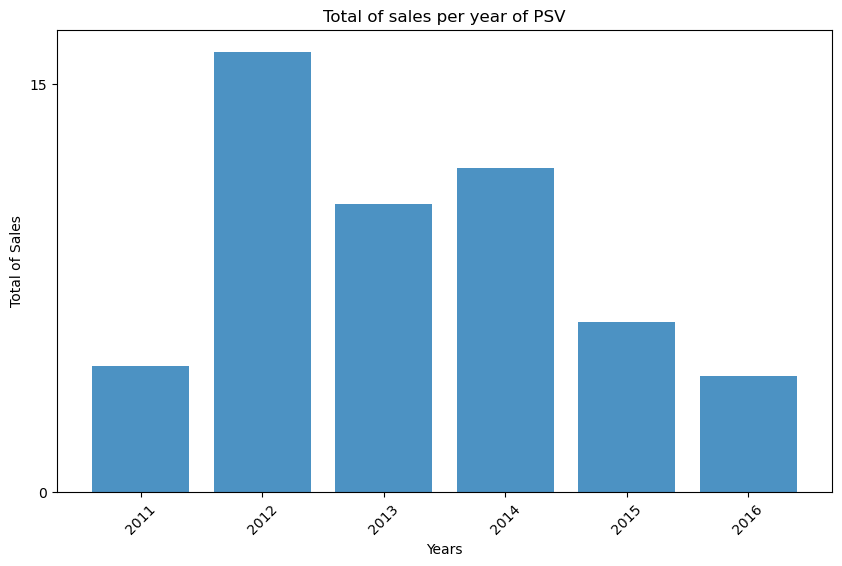

<Figure size 1000x600 with 0 Axes>

name platform  \
16714                                Winning Post 8 2016      PSV   
14992  The Legend of Heroes: Trails in the Sky Third ...      PSV   
9350                              Attack on Titan (KOEI)      PSV   
14692                        Genkai Tokki: Seven Pirates      PSV   
9178                            Odin Sphere: Leifthrasir      PSV   
...                                                  ...      ...   
7234                                  Asphalt: Injection      PSV   
11029                    Michael Jackson: The Experience      PSV   
16031                                     Minna to Issho      PSV   
14756                           Dream Club Zero Portable      PSV   
10596                                 Lord of Apocalypse      PSV   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
16714             2016    simulation      0.00      0.00      0.01   
14992             2016  role-playing      0.00      0.00      0.02   
9350              2016        action      0.00      0.00      0.13   
14692             2016  role-playing      0.00      0.00      0.03   
9178              2016  role-playing      0.02      0.02      0.09   
...                ...           ...       ...       ...       ...   
7234              2011        action      0.13      0.06      0.00   
11029             2011          misc      0.04      0.03      0.00   
16031             2011          misc      0.00      0.00      0.02   
14756             2011    simulation      0.00      0.00      0.03   
10596             2011  role-playing      0.00      0.00      0.10   

       other_sales  critic_score  user_score   rating  total_sales  
16714         0.00           NaN         NaN  unknown         0.01  
14992         0.00           NaN         NaN  unknown         0.02  
9350          0.00           NaN         NaN  unknown         0.13  
14692         0.00           NaN         NaN  unknown         0.03  
9178          0.01          93.0         7.9        T         0.14  
...            ...           ...         ...      ...          ...  
7234          0.03          49.0         4.8     E10+         0.22  
11029         0.02          57.0         5.8     E10+         0.09  
16031         0.00           NaN         NaN  unknown         0.02  
14756         0.00           NaN         NaN  unknown         0.03  
10596         0.00           NaN         NaN  unknown         0.10  

[429 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             85               4.25
1             2015            110               6.25
2             2014            100              11.90
3             2013             63              10.59
4             2012             53              16.19
5             2011             18               4.63

year_of_release      mean       var
0             2011  0.257222  0.122009
1             2012  0.305472  0.122121
2             2013  0.168095  0.034054
3             2014  0.119000  0.048759
4             2015  0.056818  0.004754
5             2016  0.050000  0.003167

None
DISTRIBUCIÓN DE SAT
El valor mínimo es: 1994
El valor máximo es: 1999
Años de lanzamiento y ventas de videojuegos de la plataforma SAT


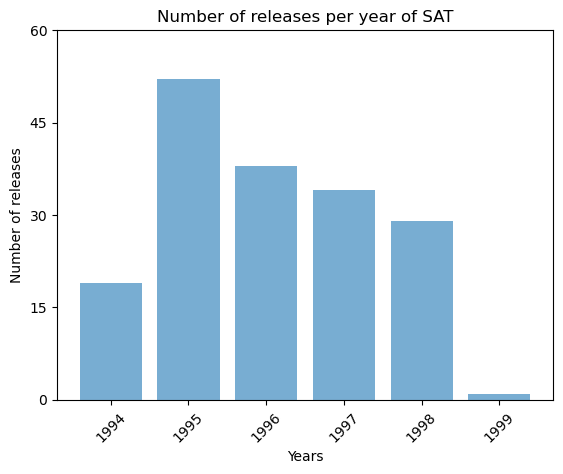

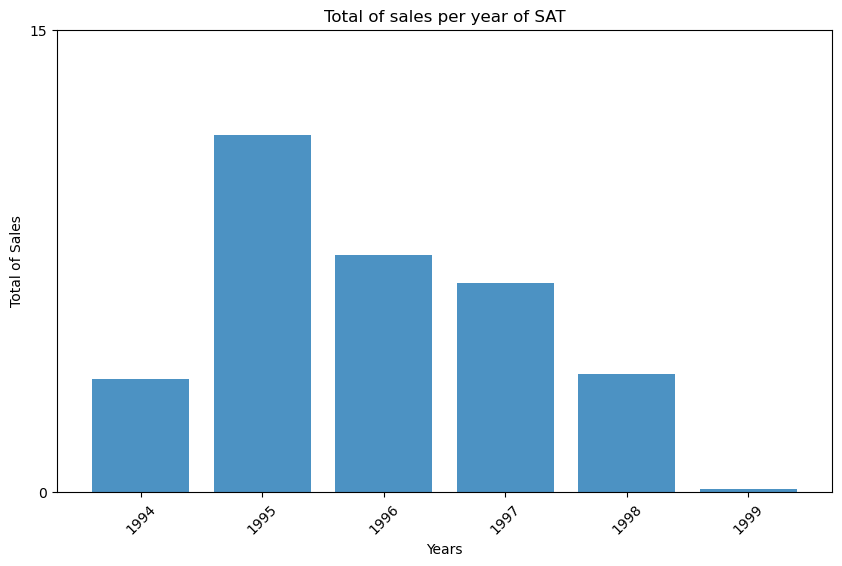

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
11197                                Derby Stallion      SAT             1999   
15430                                        Code R      SAT             1998   
11671                               Slayers Royal 2      SAT             1998   
12861                 Shining Force III: Scenario 2      SAT             1998   
10081  Shinseiki Evangelion: Koutetsu no Girlfriend      SAT             1998   
...                                             ...      ...              ...   
12589                              Worldwide Soccer      SAT             1994   
6219                                   SimCity 2000      SAT             1994   
12381                                      Robotica      SAT             1994   
11303                                    Theme Park      SAT             1994   
13280                          Golden Axe: The Duel      SAT             1994   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
11197        sports       0.0       0.0      0.09          0.0           NaN   
15430     adventure       0.0       0.0      0.02          0.0           NaN   
11671  role-playing       0.0       0.0      0.08          0.0           NaN   
12861      strategy       0.0       0.0      0.05          0.0           NaN   
10081     adventure       0.0       0.0      0.11          0.0           NaN   
...             ...       ...       ...       ...          ...           ...   
12589        sports       0.0       0.0      0.06          0.0           NaN   
6219     simulation       0.0       0.0      0.28          0.0           NaN   
12381       shooter       0.0       0.0      0.06          0.0           NaN   
11303    simulation       0.0       0.0      0.08          0.0           NaN   
13280      fighting       0.0       0.0      0.05          0.0           NaN   

       user_score   rating  total_sales  
11197         NaN  unknown         0.09  
15430         NaN  unknown         0.02  
11671         NaN  unknown         0.08  
12861         NaN  unknown         0.05  
10081         NaN  unknown         0.11  
...           ...      ...          ...  
12589         NaN  unknown         0.06  
6219          NaN  unknown         0.28  
12381         NaN  unknown         0.06  
11303         NaN  unknown         0.08  
13280         NaN  unknown         0.05  

[173 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             1999              1               0.09
1             1998             29               3.82
2             1997             34               6.77
3             1996             38               7.69
4             1995             52              11.57
5             1994             19               3.65

year_of_release      mean       var
0             1994  0.192105  0.063118
1             1995  0.222500  0.094796
2             1996  0.202368  0.024073
3             1997  0.199118  0.020311
4             1998  0.131724  0.017150
5             1999  0.090000       NaN

None
DISTRIBUCIÓN DE GEN
El valor mínimo es: 1990
El valor máximo es: 1994
Años de lanzamiento y ventas de videojuegos de la plataforma GEN


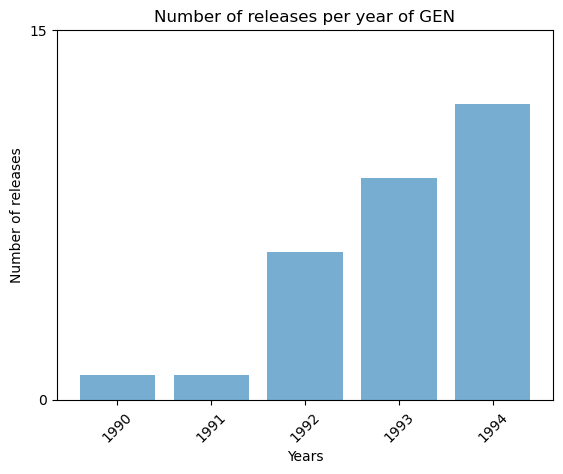

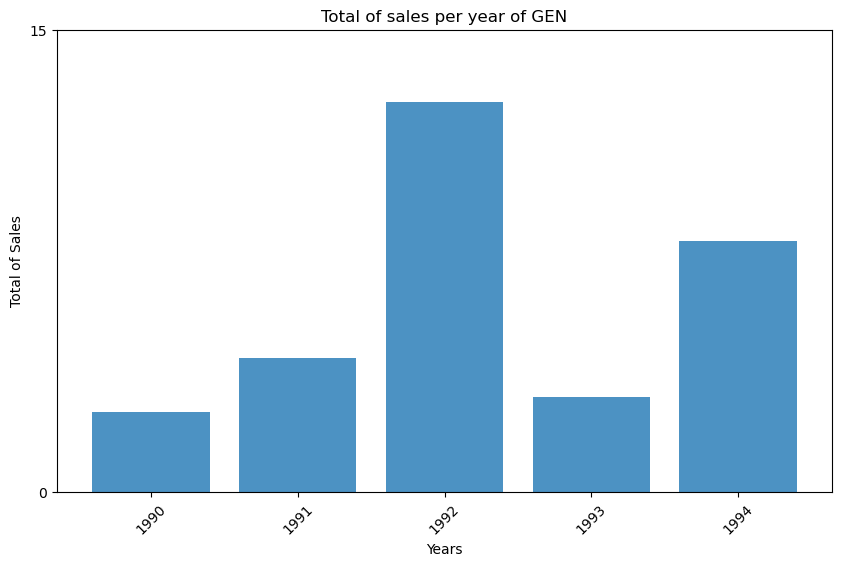

<Figure size 1000x600 with 0 Axes>

name platform  \
14488                            Puzzle & Action: Tant-R      GEN   
996                                 Sonic the Hedgehog 3      GEN   
9000      Lunar 2: Eternal Blue(sales, but wrong system)      GEN   
6451                                       Virtua Racing      GEN   
1842                          NBA Jam Tournament Edition      GEN   
1453                                     Mortal Kombat 3      GEN   
11563                   Yuu Yuu Hakusho: Makyo Toitsusen      GEN   
1365                              Disney's The Lion King      GEN   
960                                     Sonic & Knuckles      GEN   
14085                             J-League Pro Striker 2      GEN   
14132                             Castlevania Bloodlines      GEN   
11660                Dragon Slayer: The Legend of Heroes      GEN   
12984                                    Dynamite Headdy      GEN   
13343                                       Beyond Oasis      GEN   
12264                                  Streets of Rage 3      GEN   
12098  Street Fighter II': Special Champion Edition (...      GEN   
14244                                            unknown      GEN   
11986                            Ecco: The Tides of Time      GEN   
8893                             Super Street Fighter II      GEN   
7885                                    Shining Force II      GEN   
659                                              unknown      GEN   
9787                                    Ecco the Dolphin      GEN   
9563                                      Gunstar Heroes      GEN   
1099        Street Fighter II': Special Champion Edition      GEN   
832                                              NBA Jam      GEN   
564                                        Mortal Kombat      GEN   
145                                 Sonic the Hedgehog 2      GEN   
257                                   Sonic the Hedgehog      GEN   
588                                      Streets of Rage      GEN   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
14488             1994          misc      0.00      0.00      0.03   
996               1994      platform      1.02      0.47      0.20   
9000              1994  role-playing      0.00      0.00      0.14   
6451              1994        racing      0.00      0.00      0.26   
1842              1994        sports      0.95      0.14      0.00   
1453              1994      fighting      1.03      0.27      0.00   
11563             1994      fighting      0.00      0.00      0.08   
1365              1994      platform      0.97      0.37      0.03   
960               1994      platform      1.24      0.43      0.03   
14085             1994        sports      0.00      0.00      0.04   
14132             1994      platform      0.00      0.00      0.04   
11660             1994  role-playing      0.00      0.00      0.08   
12984             1993      platform      0.00      0.00      0.05   
13343             1993  role-playing      0.00      0.00      0.05   
12264             1993        action      0.00      0.00      0.07   
12098             1993        action      0.00      0.00      0.07   
14244             1993       unknown      0.00      0.00      0.03   
11986             1993     adventure      0.00      0.00      0.07   
8893              1993      fighting      0.00      0.00      0.15   
7885              1993      strategy      0.00      0.00      0.19   
659               1993       unknown      1.78      0.53      0.00   
9787              1992     adventure      0.00      0.00      0.12   
9563              1992       shooter      0.00      0.00      0.13   
1099              1992      fighting      1.00      0.30      0.31   
832               1992        sports      1.75      0.25      0.00   
564               1992      fighting      1.95      0.63      0.00   
145               1992      platform      4.47      1.20      0.16   
257               199

year_of_release  n_of_releases  total_sales_pyear
0             1994             12               8.13
1             1993              9               3.07
2             1992              6              12.64
3             1991              1               4.33
4             1990              1               2.60

year_of_release      mean       var
0             1990  2.600000       NaN
1             1991  4.330000       NaN
2             1992  2.106667  4.739467
3             1993  0.341111  0.593011
4             1994  0.677500  0.552039

None
DISTRIBUCIÓN DE DC
El valor mínimo es: 1998
El valor máximo es: 2008
Años de lanzamiento y ventas de videojuegos de la plataforma DC


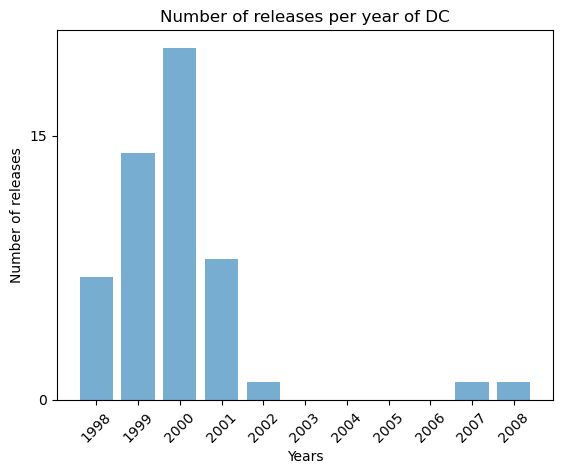

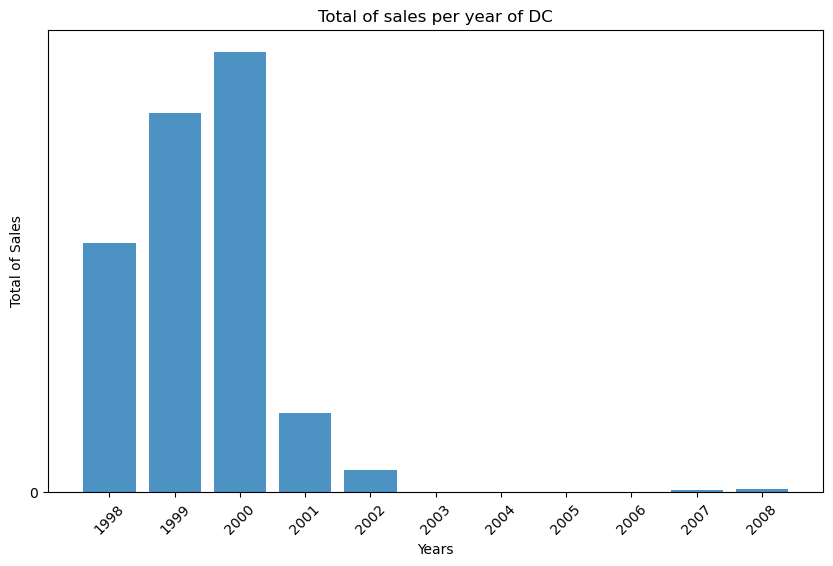

<Figure size 1000x600 with 0 Axes>

name platform  \
14006                         Pia Carrot e Youkoso!! 2.5       DC   
15997                               Triggerheart Exelica       DC   
6041                       Sakura Wars 4: Koi Seyo,Otome       DC   
8904                                          Shenmue II       DC   
13931                               Gundam Battle Online       DC   
13282          Capcom vs. SNK: Millennium Fight 2000 Pro       DC   
9661         Capcom vs. SNK 2: Millionaire Fighting 2001       DC   
7977                         Phantasy Star Online Ver. 2       DC   
12095                                       Crazy Taxi 2       DC   
9844                                   Sonic Adventure 2       DC   
5514                 Sakura Wars 3: Paris wa Moeteiru ka       DC   
10998                                   Skies of Arcadia       DC   
966                                           Crazy Taxi       DC   
10362                                        Sakura Wars       DC   
10685        Sakura Wars 2: Kimi, Shinitamou koto Nakare       DC   
11538                             Sentimental Graffiti 2       DC   
11311                 Derby Tsuku: Derby Uma o Tsukurou!       DC   
9077              Marvel vs. Capcom 2: New Age of Heroes       DC   
11927                    The King of Fighters: Evolution       DC   
12302                                              Kanon       DC   
12850      Jikkyou Powerful Pro Yakyuu DreamCast Edition       DC   
13109                             The Typing of the Dead       DC   
14054                                  Fighting Vipers 2       DC   
9165                                     Dead or Alive 2       DC   
9558                                             Sega GT       DC   
8103   Soccer Tsuku Tokudai Gou: J-League Pro Soccer ...       DC   
7642                                          Grandia II       DC   
7520                                Phantasy Star Online       DC   
1877                                             NFL 2K1       DC   
1787                      Resident Evil - Code: Veronica       DC   
7230                                      Capcom vs. SNK       DC   
5693                                    Virtua Striker 2       DC   
1712                                             Shenmue       DC   
13255                                             NBA 2K       DC   
5240                J-League Pro Soccer Club o Tsukurou!       DC   
5350                                         SoulCalibur       DC   
8306                                  Tokyo Xtreme Racer       DC   
11241                                  Sega Bass Fishing       DC   
1679                                              NFL 2K       DC   
3815                                              Seaman       DC   
6964                         Pro Yakyuu Team o Tsukurou!       DC   
10657           Marvel vs. Capcom: Clash of Super Heroes       DC   
10535                                       Blue Stinger       DC   
10522             The King of Fighters: Dream Match 1999       DC   
4665                           Sega Rally Championship 2       DC   
9055                                         Power Stone       DC   
12507                                   PenPen TriIceLon       DC   
5145                                  Virtua Fighter 3tb       DC   
12297                                               July       DC   
11380                               Godzilla Generations       DC   
6426                             The House of the Dead 2       DC   
643                                      Sonic Adventure       DC   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
14006             2008     adventure      0.00      0.00      0.04   
15997             2007       shooter      0.00      0.00      0.02   
6041              2002     adventure      0.00      0.00      0.29   
8904              2001     adventure      0.00      0.00      0.15   
13931             2001        action      0.

year_of_release  n_of_releases  total_sales_pyear
0             2008              1               0.04
1             2007              1               0.02
2             2002              1               0.29
3             2001              8               1.07
4             2000             20               5.99
5             1999             14               5.16
6             1998              7               3.38

year_of_release      mean       var
0             1998  0.482857  0.735624
1             1999  0.368571  0.139629
2             2000  0.299500  0.223468
3             2001  0.133750  0.008884
4             2002  0.290000       NaN
5             2007  0.020000       NaN
6             2008  0.040000       NaN

None
DISTRIBUCIÓN DE SCD
El valor mínimo es: 1993
El valor máximo es: 1994
Años de lanzamiento y ventas de videojuegos de la plataforma SCD


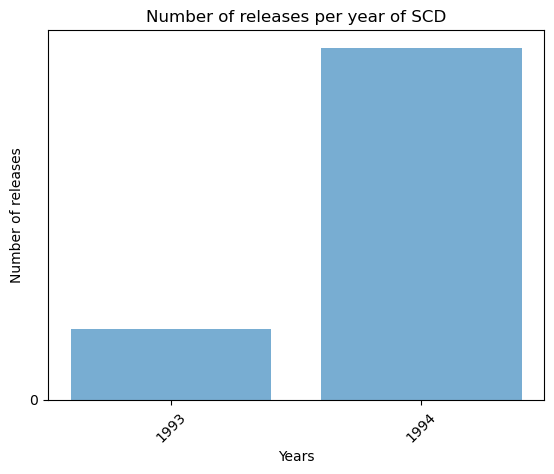

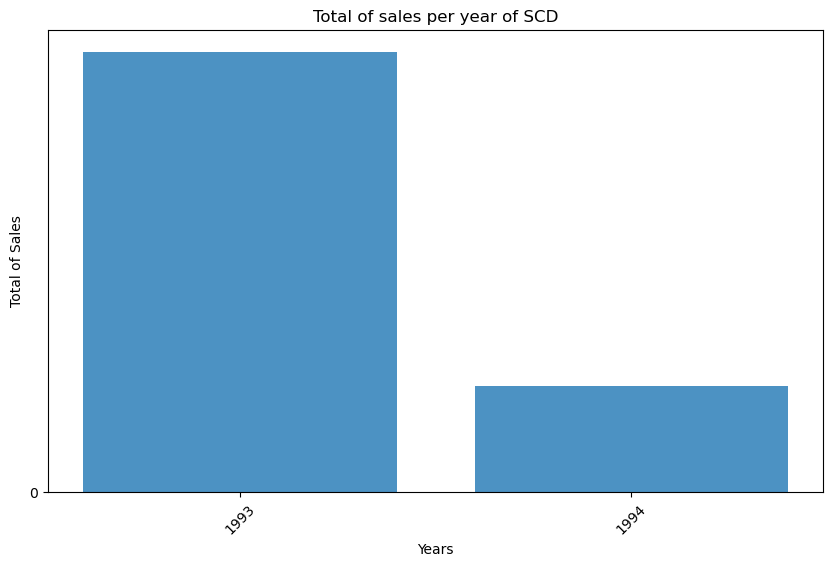

<Figure size 1000x600 with 0 Axes>

name platform  \
9008                                   Shining Force CD      SCD   
11781  Formula One World Championship: Beyond the Limit      SCD   
12612                Record of Lodoss War: Eiyuu Sensou      SCD   
13010                             Game no Kanzume Vol 2      SCD   
13489                             Game no Kanzume Vol 1      SCD   
1263                                           Sonic CD      SCD   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
9008              1994      strategy       0.0      0.00      0.14   
11781             1994        racing       0.0      0.00      0.07   
12612             1994  role-playing       0.0      0.00      0.06   
13010             1994          misc       0.0      0.00      0.05   
13489             1994          misc       0.0      0.00      0.04   
1263              1993      platform       1.0      0.36      0.09   

       other_sales  critic_score  user_score   rating  total_sales  
9008          0.00           NaN         NaN  unknown         0.14  
11781         0.00           NaN         NaN  unknown         0.07  
12612         0.00           NaN         NaN  unknown         0.06  
13010         0.00           NaN         NaN  unknown         0.05  
13489         0.00           NaN         NaN  unknown         0.04  
1263          0.05           NaN         NaN  unknown         1.50

year_of_release  n_of_releases  total_sales_pyear
0             1994              5               0.36
1             1993              1               1.50

year_of_release   mean      var
0             1993  1.500      NaN
1             1994  0.072  0.00157

None
DISTRIBUCIÓN DE NG
El valor mínimo es: 1993
El valor máximo es: 1996
Años de lanzamiento y ventas de videojuegos de la plataforma NG


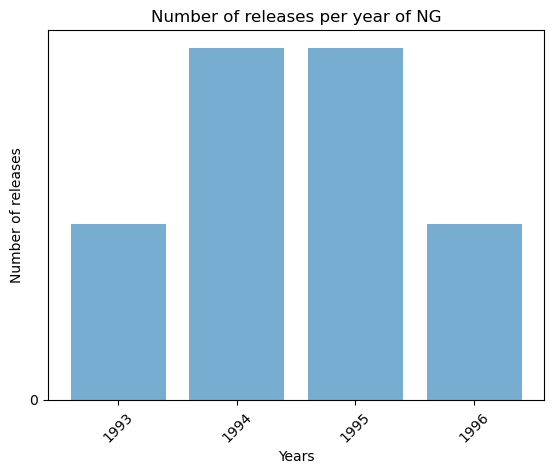

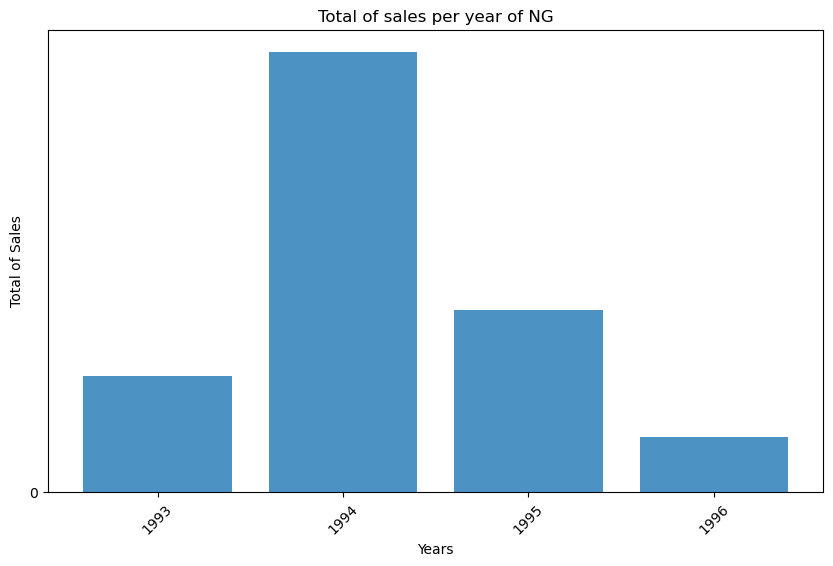

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
12823                    The King of Fighters '96       NG             1996   
13968  Art of Fighting 3: The Path of the Warrior       NG             1996   
7499                     The King of Fighters '95       NG             1995   
11528                         Samurai Shodown III       NG             1995   
14500                    Far East of Eden Shinden       NG             1995   
15655                            Super Dodge Ball       NG             1995   
6663                           Samurai Shodown II       NG             1994   
7017                The King of Fighters '95 (CD)       NG             1994   
7542                         Samurai Spirits (CD)       NG             1994   
9710                     The King of Fighters '94       NG             1994   
9201                The King of Fighters '94 (CD)       NG             1993   
12119                             Samurai Shodown       NG             1993   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
12823  fighting       0.0       0.0      0.06          0.0           NaN   
13968  fighting       0.0       0.0      0.04          0.0           NaN   
7499   fighting       0.0       0.0      0.20          0.0           NaN   
11528  fighting       0.0       0.0      0.08          0.0           NaN   
14500  fighting       0.0       0.0      0.03          0.0           NaN   
15655    sports       0.0       0.0      0.02          0.0           NaN   
6663   fighting       0.0       0.0      0.25          0.0           NaN   
7017   fighting       0.0       0.0      0.23          0.0           NaN   
7542   fighting       0.0       0.0      0.20          0.0           NaN   
9710   fighting       0.0       0.0      0.12          0.0           NaN   
9201   fighting       0.0       0.0      0.14          0.0           NaN   
12119  fighting       0.0       0.0      0.07          0.0           NaN   

       user_score   rating  total_sales  
12823         NaN  unknown         0.06  
13968         NaN  unknown         0.04  
7499          NaN  unknown         0.20  
11528         NaN  unknown         0.08  
14500         NaN  unknown         0.03  
15655         NaN  unknown         0.02  
6663          NaN  unknown         0.25  
7017          NaN  unknown         0.23  
7542          NaN  unknown         0.20  
9710          NaN  unknown         0.12  
9201          NaN  unknown         0.14  
12119         NaN  unknown         0.07

year_of_release  n_of_releases  total_sales_pyear
0             1996              2               0.10
1             1995              4               0.33
2             1994              4               0.80
3             1993              2               0.21

year_of_release    mean       var
0             1993  0.1050  0.002450
1             1994  0.2000  0.003267
2             1995  0.0825  0.006825
3             1996  0.0500  0.000200

None
DISTRIBUCIÓN DE WS
El valor mínimo es: 1999
El valor máximo es: 2001
Años de lanzamiento y ventas de videojuegos de la plataforma WS


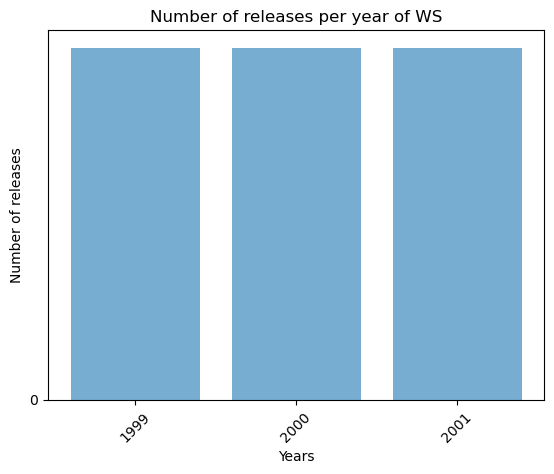

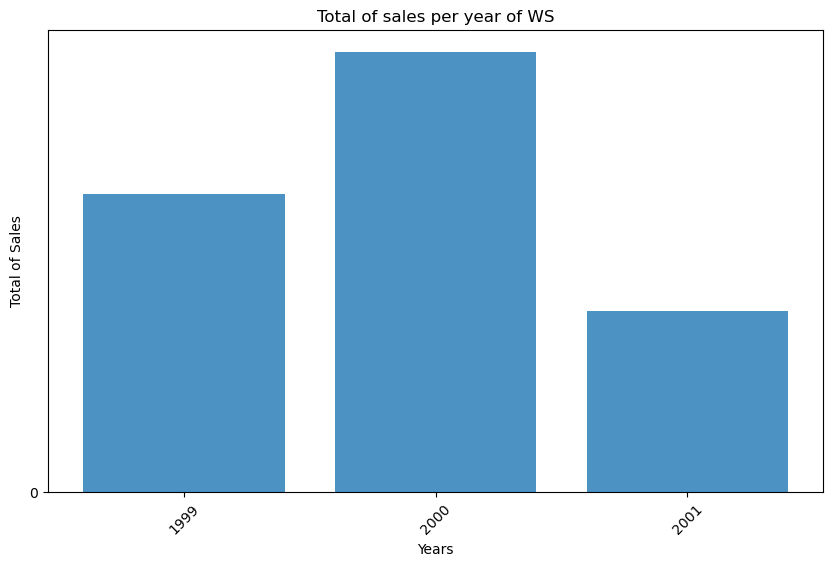

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
6650                            Final Fantasy II       WS             2001   
14224      SD Gundam G Generation: Gather Beat 2       WS             2001   
3926                               Final Fantasy       WS             2000   
8294       Super Robot Taisen Compact 2 Dai-1-Bu       WS             2000   
6110              Digimon Adventure: Anode Tamer       WS             1999   
8039   Chocobo no Fushigi Dungeon for WonderSwan       WS             1999   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
6650   role-playing       0.0       0.0      0.25          0.0           NaN   
14224      strategy       0.0       0.0      0.03          0.0           NaN   
3926   role-playing       0.0       0.0      0.51          0.0           NaN   
8294       strategy       0.0       0.0      0.17          0.0           NaN   
6110   role-playing       0.0       0.0      0.28          0.0           NaN   
8039   role-playing       0.0       0.0      0.18          0.0           NaN   

       user_score   rating  total_sales  
6650          NaN  unknown         0.25  
14224         NaN  unknown         0.03  
3926          NaN  unknown         0.51  
8294          NaN  unknown         0.17  
6110          NaN  unknown         0.28  
8039          NaN  unknown         0.18

year_of_release  n_of_releases  total_sales_pyear
0             2001              2               0.28
1             2000              2               0.68
2             1999              2               0.46

year_of_release  mean     var
0             1999  0.23  0.0050
1             2000  0.34  0.0578
2             2001  0.14  0.0242

None
DISTRIBUCIÓN DE TG16
El valor mínimo es: 1995
El valor máximo es: 1995
Años de lanzamiento y ventas de videojuegos de la plataforma TG16


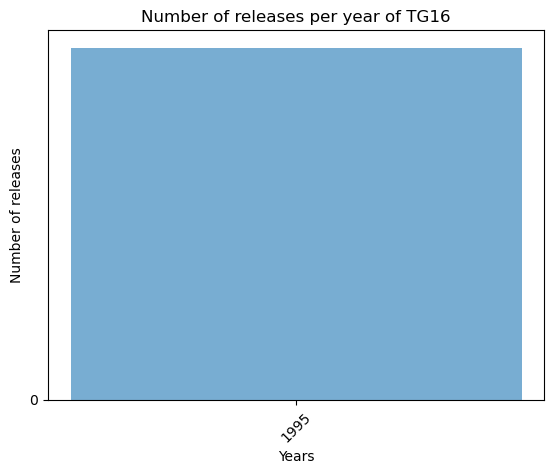

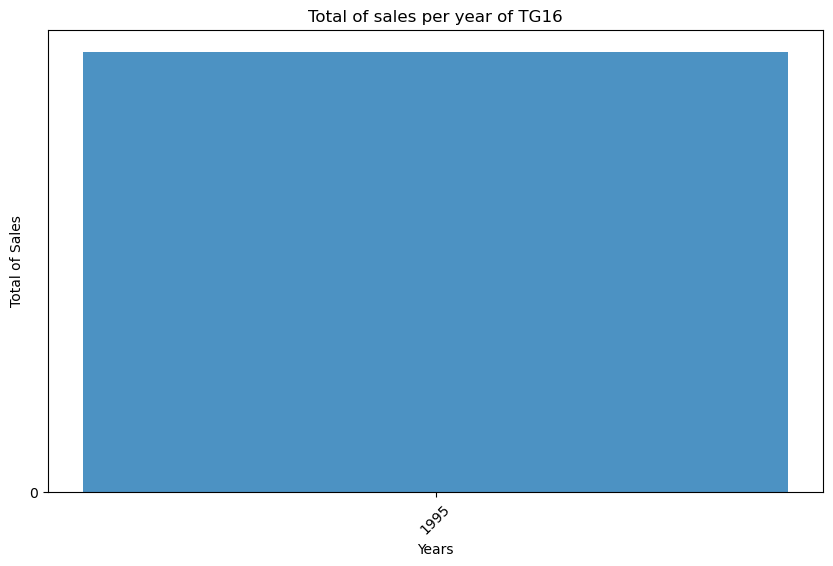

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release      genre  \
9223                       Doukyuusei     TG16             1995  adventure   
15633  Ginga Fukei Densetsu: Sapphire     TG16             1995    shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
9223        0.0       0.0      0.14          0.0           NaN         NaN   
15633       0.0       0.0      0.02          0.0           NaN         NaN   

        rating  total_sales  
9223   unknown         0.14  
15633  unknown         0.02

year_of_release  n_of_releases  total_sales_pyear
0             1995              2               0.16

year_of_release  mean     var
0             1995  0.08  0.0072

None
DISTRIBUCIÓN DE 3DO
El valor mínimo es: 1994
El valor máximo es: 1995
Años de lanzamiento y ventas de videojuegos de la plataforma 3DO


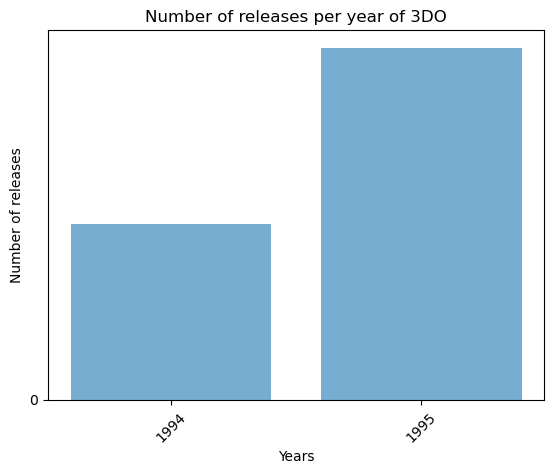

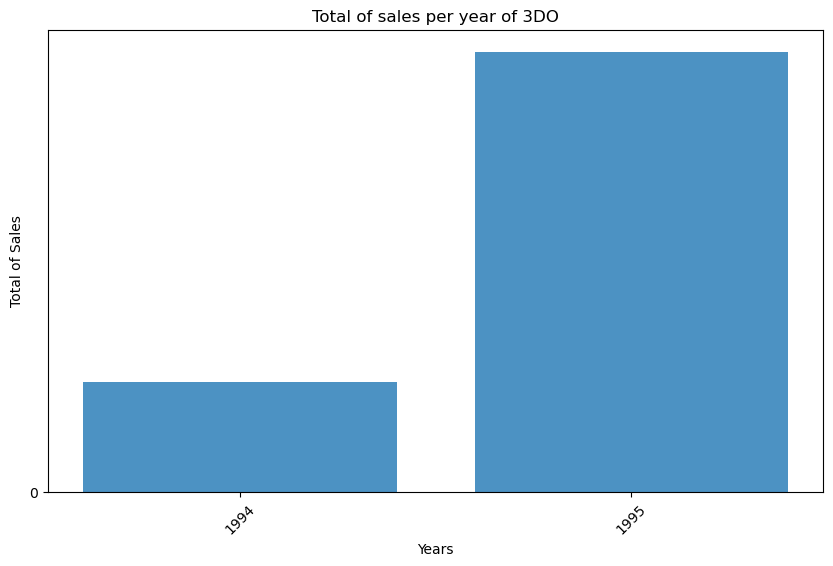

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
12663                           Policenauts      3DO             1995   
15560  Sotsugyou II: Neo Generation Special      3DO             1995   
15076                           Bust-A-Move      3DO             1994   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
12663   adventure       0.0       0.0      0.06          0.0           NaN   
15560  simulation       0.0       0.0      0.02          0.0           NaN   
15076      puzzle       0.0       0.0      0.02          0.0           NaN   

       user_score   rating  total_sales  
12663         NaN  unknown         0.06  
15560         NaN  unknown         0.02  
15076         NaN  unknown         0.02

year_of_release  n_of_releases  total_sales_pyear
0             1995              2               0.08
1             1994              1               0.02

year_of_release  mean     var
0             1994  0.02     NaN
1             1995  0.04  0.0008

None
DISTRIBUCIÓN DE GG
El valor mínimo es: 1992
El valor máximo es: 1992
Años de lanzamiento y ventas de videojuegos de la plataforma GG


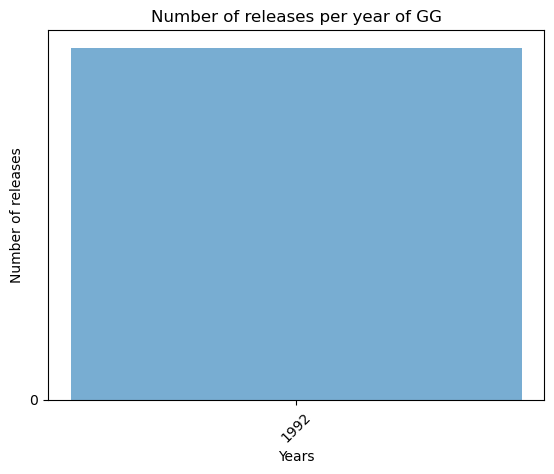

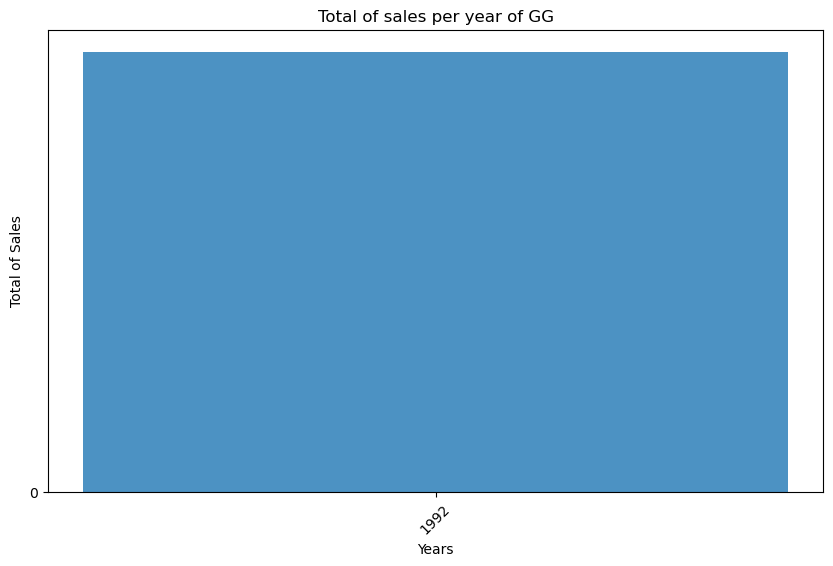

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release     genre  \
13571  Sonic the Hedgehog 2 (8-bit)       GG             1992  platform   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
13571       0.0       0.0      0.04          0.0           NaN         NaN   

        rating  total_sales  
13571  unknown         0.04

year_of_release  n_of_releases  total_sales_pyear
0             1992              1               0.04

year_of_release  mean  var
0             1992  0.04  NaN

None
DISTRIBUCIÓN DE PCFX
El valor mínimo es: 1996
El valor máximo es: 1996
Años de lanzamiento y ventas de videojuegos de la plataforma PCFX


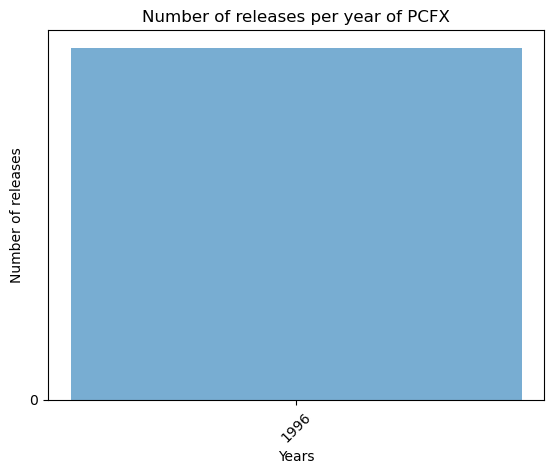

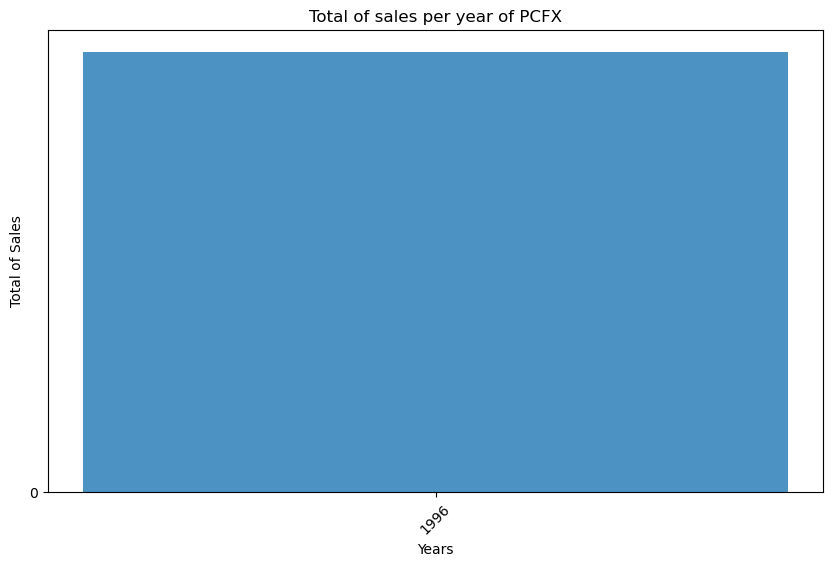

<Figure size 1000x600 with 0 Axes>

name platform  year_of_release  \
14634  Blue Breaker: Ken Yorimo Hohoemi o     PCFX             1996   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
14634  role-playing       0.0       0.0      0.03          0.0           NaN   

       user_score   rating  total_sales  
14634         NaN  unknown         0.03

year_of_release  n_of_releases  total_sales_pyear
0             1996              1               0.03

year_of_release  mean  var
0             1996  0.03  NaN

None


In [64]:
# Ciclo for para observar todas las plataformas de distribución total
for platform in ice_df_best_plt['platform']:
    ice_platform=distribution_total(platform)
    print(ice_platform)

#### 3.2.3 Distribución total del 2012 en adelante

In [66]:
#Funcion para hacer la distribución
def distribution (plt2):
    #Zona de tablas
    
    #Df borrando los años desconocidos
    print(f'DISTRIBUCIÓN DE {plt2}')
    ice_platform=ice_df[(ice_df['platform']==plt2) & (ice_df['year_of_release']!=-1)& (ice_df['year_of_release']>2011)]
    ice_platform=ice_platform.sort_values(by='year_of_release',ascending=False)
    #Valores mínimos y máximos
    print(f' Puntuación promedio de {platform} en critic score: {ice_platform['critic_score'].mean()}')
    print(f' Puntuación promedio de {platform} en user score: {ice_platform['user_score'].mean()}')
    val_min = ice_platform['year_of_release'].min()
    print(f'El valor mínimo es: {val_min}')
    val_max=ice_platform['year_of_release'].max()
    print(f'El valor máximo es: {val_max}')
    #Tabla número de entregas por año
    values=ice_platform['year_of_release'].value_counts().sort_index(ascending=False).reset_index()
    values.columns=['year_of_release','n_of_releases']
    # print(f'Años de lanzamientos: \n {values}')
    
    #Tabla de promedios y varianzas
    sales_mean=ice_platform.groupby('year_of_release')['total_sales'].agg(['mean', 'var']).reset_index()
    #Tabla de total de ventas
    sales_year=ice_platform.groupby('year_of_release')['total_sales'].sum().sort_index(ascending=False).reset_index()
    sales_year.columns=['year_of_release','total_sales_pyear']
    # print(f'Ventas por cada año: \n {sales_year}')
    
    #Tabla de total de ventas y número de ejemplares
    sales_values=values.merge(sales_year,on='year_of_release',how='left')
    print(f'Años de lanzamiento y ventas de videojuegos de la plataforma {plt2}')
    # display(sales_values)

    #Zona de Gráficas
    #Boxplot
    # sns.boxplot(data=ice_platform, x='year_of_release', y='total_sales')
    # plt.title(f'Distribution of sales by year of {plt2}')
    # plt.xlabel('Year')
    # plt.ylabel('Money')
    # plt.show()

    #Histograma de número de veces que se vendió cierta cantidad de dinero
    # plt.hist(sales_year['total_sales_pyear'], bins=range(0, int(sales_year['total_sales_pyear'].max()) + 20, 20), alpha=0.8,label='sales')
    # plt.legend()
    # plt.xticks(range(0, int(sales_year['total_sales_pyear'].max()) + 20, 20))  
    # plt.title(f'Frecuency of total sales by year of {plt2}')
    # plt.ylabel('Frecuency')
    # plt.xlabel('Money')
    # plt.show()

    # #Histograma de frecuencia de lanzamientos durante los años registrados
    # plt.hist(sales_values['n_of_releases'], bins=range(0, int(sales_values['n_of_releases'].max()) + 20, 20), alpha=0.8,label='sales')
    # plt.legend()
    # # plt.xticks(range(val_min,  int(sales_values['year_of_release'].max()) + 1, 1))  
    # plt.xticks(range(0, int(sales_values['n_of_releases'].max()) + 20, 20))  
    # plt.title(f'Frecuency of number of releases by year {plt2}')
    # plt.ylabel('Frecuency')
    # plt.xlabel('Number of releases')
    # plt.show()

    #Gráfico de Barras de number of releases
    # plt.bar(x= sales_values['year_of_release'], height = sales_values['n_of_releases'], alpha=0.6)
    # # Establecer las etiquetas del eje X con los nombres de los meses
    # plt.xticks(range(val_min,val_max+1,1),rotation=45)  # Ajustar las etiquetas del eje X
    # plt.yticks(range(0,sales_values['n_of_releases'].max()+10,20))
    # plt.xlabel('Years')  
    # plt.ylabel('Number of releases') 
    # plt.title(f'Number of releases per year of {plt2}') 
    # # plt.legend()
    # plt.figure(figsize=(10,6))
    # # plt.show()

    #Number of sales per year
    # plt.bar(x=sales_values['year_of_release'],height=sales_values['total_sales_pyear'],alpha=0.8)
    # # Establecer las etiquetas del eje X con los nombres de los meses
    # plt.xticks(range(val_min,val_max+1,1),rotation=45)  # Ajustar las etiquetas del eje X
    # plt.yticks(range(0, int(sales_values['total_sales_pyear'].max()) + 10, 20))
    # plt.xlabel('Years')  
    # plt.ylabel('Number of Sales') 
    # plt.title(f'Number of sales per year of {plt2}') 
    # # plt.legend()
    # plt.figure(figsize=(10,6))
    # # plt.show()
    # # plt.show()
    
    return display(ice_platform,sales_values,sales_mean)
    

#### 3.2.4 Distribución total del 2012 en adelante con gráficas

In [68]:
#Funcion para hacer la distribución
def distribution_graphs (plt2):
    #Zona de tablas
    #Df borrando los años desconocidos
    bey_elev= ice_df[ice_df['platform']==plt2]
    if (bey_elev['year_of_release']>2011).any():
        print(f'DISTRIBUCIÓN DE {plt2}')
        print('\n') 
        ice_platform=ice_df[(ice_df['platform']==plt2) & (ice_df['year_of_release']!=-1)]
        ice=platform=ice_df[ice_df['year_of_release']>2011]
        ice_platform=ice_platform.sort_values(by='year_of_release',ascending=False)
    #Valores mínimos y máximos
        val_min = ice_platform['year_of_release'].min()
        print(f'El valor mínimo es: {val_min}')
        val_max=ice_platform['year_of_release'].max()
        print(f'El valor máximo es: {val_max}')
    #Tabla número de entregas por año
        values=ice_platform['year_of_release'].value_counts().sort_index(ascending=False).reset_index()
        values.columns=['year_of_release','n_of_releases']
    # print(f'Años de lanzamientos: \n {values}')
    
    #Tabla de promedios y varianzas
        sales_mean=ice_platform.groupby('year_of_release')['total_sales'].agg(['mean', 'var']).reset_index()
    #Tabla de total de ventas
        sales_year=ice_platform.groupby('year_of_release')['total_sales'].sum().sort_index(ascending=False).reset_index()
        sales_year.columns=['year_of_release','total_sales_pyear']
    # print(f'Ventas por cada año: \n {sales_year}')
    
    #Tabla de total de ventas y número de ejemplares
        sales_values=values.merge(sales_year,on='year_of_release',how='left')
        print(f'Años de lanzamiento y ventas de videojuegos de la plataforma {plt2}')
    # display(sales_values)

      #Gráfico de Barras de number of releases
        filtered_sales_values = sales_values[sales_values['year_of_release'] > 2011]
        plt.bar(x= filtered_sales_values['year_of_release'], height = filtered_sales_values['n_of_releases'], alpha=0.6)
    # Establecer las etiquetas del eje X con los nombres de los meses
        plt.xticks(range(2012,val_max+1,1),rotation=45)  # Ajustar las etiquetas del eje X
        plt.yticks(range(0,sales_values['n_of_releases'].max()+10,20))
        plt.xlabel('Years')  
        plt.ylabel('Number of releases') 
        plt.title(f'Number of releases per year of {plt2}') 
    # plt.legend()
        # plt.figure(figsize=(10,6))
        plt.show()

    #Number of sales per year
        plt.bar(x=filtered_sales_values['year_of_release'],height=filtered_sales_values['total_sales_pyear'],alpha=0.8)
    # Establecer las etiquetas del eje X con los nombres de los meses
        plt.xticks(range(2012,val_max+1,1),rotation=45)  # Ajustar las etiquetas del eje X
        plt.yticks(range(0, int(sales_values['total_sales_pyear'].max()) + 10, 10))
        plt.xlabel('Years')  
        plt.ylabel('Total of Sales') 
        plt.title(f'Total of sales per year of {plt2}') 
    # plt.legend()
        # plt.figure(figsize=(10,6))
        plt.show()
    else: 
        print(f'No existen datos de 2011 a 2016 de {plt2}')
        
        # ice_df_best_plt = ice_df_best_plt[ice_df_best_plt['platform'] != plt2]
        return print('\n')

#### 3.2.5 Lista de plataformas de 2012 en adelante

La lista de la parte de abajo si: 
 if (bey_elev['year_of_release'] > 2010).any():

 	platform 	total_sales
0 	PS2 	1255.77
1 	X360 	971.42
2 	PS3 	939.65
3 	Wii 	907.51
4 	DS 	806.12
7 	PS4 	314.14
8 	PSP 	294.05
9 	PC 	259.52
10 	3DS 	259.00
17 	XOne 	159.32
19 	WiiU 	82.19
20 	PSV 	54.07

Se considerara tomar delk 2012 al 2016 para que resten 11 platformas las cuales cuentan con estrenos de videojuegos a partir del 2012. Las plataformas posiblemente rentables son aquellas que tengan un gran número de estrenosy buenos números de ventas los últimos 5 años.

### 3.3 Determinar para que periodo debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

### 3.4 Filtrar los datos de otros años que no sean relevantes

In [73]:
# Mostrar el DataFrame actualizado y las plataformas eliminadas
eliminated_df = pd.DataFrame(columns=['platform'])

for platform in ice_df_best_plt['platform']:
    # Filtrar el DataFrame por la plataforma actual
    bey_elev = ice_df[ice_df['platform'] == platform]

    # Verificar si hay lanzamientos después de 2010
    if (bey_elev['year_of_release']>2011).any():
        # Si hay lanzamientos después de 2010, continúa con el siguiente ciclo
        continue
    else:
        # Si no hay lanzamientos después de 2010, agregar la plataforma a eliminated_df
        eliminated_df = pd.concat([eliminated_df, pd.DataFrame({'platform': [platform]})],ignore_index=True)
        # Eliminar la plataforma de ice_df_best_plt
        ice_df_best_plt = ice_df_best_plt[ice_df_best_plt['platform'] != platform]

# display(ice_df_best_plt)
ice_years_best=all_results.merge(ice_df_best_plt,on='platform',how='right')
display(ice_years_best)
print(f'{ice_years_best['difference'].mean()}')
# display(eliminated_df)
ice_years_mid=all_results.merge(eliminated_df,on='platform',how='right')
display(ice_years_mid)
print(f'{ice_years_mid['difference'].mean()}')

platform  min_year  max_year  difference  total_sales
0      X360      2005      2016          11       971.42
1       PS3      2006      2016          10       939.65
2       Wii      2006      2016          10       907.51
3        DS      1985      2013          28       806.12
4       PS4      2013      2016           3       314.14
5       PSP      2004      2015          11       294.05
6        PC      1985      2016          31       259.52
7       3DS      2011      2016           5       259.00
8      XOne      2013      2016           3       159.32
9      WiiU      2012      2016           4        82.19
10      PSV      2011      2016           5        54.07

11.0


platform  min_year  max_year  difference
0       PS2      2000      2011          11
1        PS      1994      2003           9
2       GBA      2000      2007           7
3        XB      2000      2008           8
4        GB      1988      2001          13
5       NES      1983      1994          11
6       N64      1996      2002           6
7      SNES      1990      1999           9
8        GC      2001      2007           6
9      2600      1980      1989           9
10      SAT      1994      1999           5
11      GEN      1990      1994           4
12       DC      1998      2008          10
13      SCD      1993      1994           1
14       NG      1993      1996           3
15       WS      1999      2001           2
16     TG16      1995      1995           0
17      3DO      1994      1995           1
18       GG      1992      1992           0
19     PCFX      1996      1996           0

5.75


In [74]:
for platform in ice_df_best_plt['platform']:
    ice_platform0=distribution(platform)
    print(ice_platform0)

DISTRIBUCIÓN DE X360
 Puntuación promedio de X360 en critic score: 70.87134502923976
 Puntuación promedio de X360 en user score: 6.260162601626016
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma X360


name platform  \
13751               Call of Duty: Modern Warfare Trilogy     X360   
5010                                             FIFA 17     X360   
14098                          Pro Evolution Soccer 2017     X360   
14356                     Batman: A Telltale Game Series     X360   
10371                                           WWE 2K17     X360   
...                                                  ...      ...   
8600                            Just Dance: Disney Party     X360   
3485   London 2012: The Official Video Game of the Ol...     X360   
8365                                      Anarchy Reigns     X360   
8317                            Country Dance: All Stars     X360   
5793                           Pro Evolution Soccer 2013     X360   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
13751             2016    shooter      0.02      0.02      0.00         0.00   
5010              2016     sports      0.07      0.28      0.00         0.03   
14098             2016     sports      0.01      0.02      0.00         0.00   
14356             2016  adventure      0.01      0.02      0.00         0.00   
10371             2016     sports      0.05      0.04      0.00         0.01   
...                ...        ...       ...       ...       ...          ...   
8600              2012       misc      0.13      0.02      0.00         0.02   
3485              2012     sports      0.07      0.44      0.00         0.07   
8365              2012     action      0.12      0.02      0.02         0.01   
8317              2012     action      0.16      0.00      0.00         0.01   
5793              2012     sports      0.08      0.20      0.00         0.03   

       critic_score  user_score   rating  total_sales  
13751           NaN         7.1        M         0.04  
5010            NaN         1.7        E         0.38  
14098           NaN         6.5        E         0.03  
14356           NaN         NaN  unknown         0.03  
10371           NaN         7.1        T         0.10  
...             ...         ...      ...          ...  
8600            NaN         7.1        E         0.17  
3485            NaN         NaN  unknown         0.58  
8365           73.0         7.9        M         0.17  
8317            NaN         5.2     E10+         0.17  
5793           82.0         6.9        E         0.31  

[292 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             13               1.52
1             2015             35              11.96
2             2014             63              34.74
3             2013             75              88.58
4             2012            106              99.74

year_of_release      mean       var
0             2012  0.940943  3.222131
1             2013  1.181067  5.990966
2             2014  0.551429  0.559535
3             2015  0.341714  0.182168
4             2016  0.116923  0.013106

None
DISTRIBUCIÓN DE PS3
 Puntuación promedio de PS3 en critic score: 71.56542056074767
 Puntuación promedio de PS3 en user score: 6.580582524271845
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PS3


name platform  year_of_release  \
7727                         MLB 16: The Show      PS3             2016   
12493                  Attack on Titan (KOEI)      PS3             2016   
12382  Super Robot Wars OG: The Moon Dwellers      PS3             2016   
12074             Guilty Gear Xrd -Revelator-      PS3             2016   
11578                          UEFA Euro 2016      PS3             2016   
...                                       ...      ...              ...   
7364                                  Journey      PS3             2012   
3702                  Tiger Woods PGA Tour 13      PS3             2012   
13760             Test Drive: Ferrari Legends      PS3             2012   
10390         Aquapazza: Aquaplus Dream Match      PS3             2012   
9076                                    Okami      PS3             2012   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
7727      action      0.16      0.00      0.00         0.04           NaN   
12493     action      0.00      0.00      0.06         0.00           NaN   
12382       misc      0.00      0.00      0.06         0.00           NaN   
12074   fighting      0.02      0.02      0.03         0.01           NaN   
11578     sports      0.00      0.04      0.03         0.01           NaN   
...          ...       ...       ...       ...          ...           ...   
7364   adventure      0.04      0.13      0.00         0.04          92.0   
3702      sports      0.24      0.21      0.00         0.08          75.0   
13760     racing      0.04      0.00      0.00         0.01          62.0   
10390   fighting      0.05      0.00      0.05         0.01          75.0   
9076      action      0.00      0.00      0.14         0.00           NaN   

       user_score   rating  total_sales  
7727          NaN  unknown         0.20  
12493         NaN  unknown         0.06  
12382         NaN  unknown         0.06  
12074         NaN  unknown         0.08  
11578         NaN  unknown         0.08  
...           ...      ...          ...  
7364          8.8        E         0.21  
3702          5.7        E         0.53  
13760         4.9        E         0.05  
10390         7.8        T         0.11  
9076          NaN  unknown         0.14  

[493 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             38               3.60
1             2015             73              16.82
2             2014            108              47.76
3             2013            126             113.25
4             2012            148             107.36

year_of_release      mean       var
0             2012  0.725405  2.200915
1             2013  0.898810  4.881795
2             2014  0.442222  0.661655
3             2015  0.230411  0.165565
4             2016  0.094737  0.014534

None
DISTRIBUCIÓN DE Wii
 Puntuación promedio de Wii en critic score: 76.2
 Puntuación promedio de Wii en user score: 6.591176470588234
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma Wii


name platform  \
8009                                     Just Dance 2017      Wii   
2179                                     Just Dance 2016      Wii   
8941                           Skylanders: SuperChargers      Wii   
16312                  Monster High: New Ghoul in School      Wii   
14682                Barbie and Her Sisters Puppy Rescue      Wii   
7991                          How to Train Your Dragon 2      Wii   
13570                        Disney Planes Fire & Rescue      Wii   
2180                               Skylanders: Trap Team      Wii   
3611                                             FIFA 15      Wii   
850                                      Just Dance 2015      Wii   
16144                             Penguins of Madagascar      Wii   
9110                                     Disney's Planes      Wii   
11922                     The Croods: Prehistoric Party!      Wii   
7137                          Zumba Fitness: World Party      Wii   
6443                               Angry Birds Star Wars      Wii   
4985                                             FIFA 14      Wii   
12958  Pretty Cure All Stars Everyone Gather ? Let's ...      Wii   
1158                                     Disney Infinity      Wii   
766                                Skylanders SWAP Force      Wii   
10911                                       The Smurfs 2      Wii   
14840                              Young Justice: Legacy      Wii   
16044                           Turbo: Super Stunt Squad      Wii   
359                                      Just Dance 2014      Wii   
10896                          Pro Evolution Soccer 2013      Wii   
16359              Captain Morgane and the Golden Turtle      Wii   
10540                    Inazuma Eleven GO Strikers 2013      Wii   
16117                              Brave: The Video Game      Wii   
11431                                  I Am In The Movie      Wii   
10442                         Fatal Frame 2: Wii Edition      Wii   
15166                                         QUIZ PARTY      Wii   
15765                                           The Cube      Wii   
16298                                       Turbo Trainz      Wii   
12439                                 Zumba Fitness Core      Wii   
116                                         Just Dance 4      Wii   
9872                            Just Dance: Disney Party      Wii   
8965                                             WWE '13      Wii   
439                                        Mario Party 9      Wii   
614                                    Skylanders Giants      Wii   
1396                      LEGO Batman 2: DC Super Heroes      Wii   
2139                                      Dragon Quest X      Wii   
2166                     Epic Mickey 2: The Power of Two      Wii   
2319                          LEGO The Lord of the Rings      Wii   
2945                                      FIFA Soccer 13      Wii   
2995           Kirby's Dream Collection: Special Edition      Wii   
3055                                 Puzzler Brain Games      Wii   
3986                                       Madden NFL 13      Wii   
4628                                            NBA 2K13      Wii   
4939                                  WipeOut 3 The Game      Wii   
6020                                    Just Dance Wii 2      Wii   
7148                                        We Sing Pop!      Wii   
7761                           Just Dance: Greatest Hits      Wii   
8792            The Amazing Spider-Man (Console Version)      Wii   
8875                          Major League Baseball 2K12      Wii   
16560                                Transformers: Prime      Wii   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
8009              2016          misc      0.06      0.11      0.00   
2179              2015          misc      0.41      0.46      0.00   
8941              2015        action      0.02

year_of_release  n_of_releases  total_sales_pyear
0             2016              1               0.18
1             2015              4               1.14
2             2014              6               3.75
3             2013             12               8.59
4             2012             31              21.71

year_of_release      mean       var
0             2012  0.700323  1.780077
1             2013  0.715833  1.286499
2             2014  0.625000  0.589310
3             2015  0.285000  0.200367
4             2016  0.180000       NaN

None
DISTRIBUCIÓN DE DS
 Puntuación promedio de DS en critic score: 80.0
 Puntuación promedio de DS en user score: 7.081249999999999
El valor mínimo es: 2012
El valor máximo es: 2013
Años de lanzamiento y ventas de videojuegos de la plataforma DS


name platform  year_of_release  \
11973             The Croods: Prehistoric Party!       DS             2013   
14353                   Turbo: Super Stunt Squad       DS             2013   
3862                        Frozen: Olaf's Quest       DS             2013   
5054                    LEGO Marvel Super Heroes       DS             2013   
7460                             Disney's Planes       DS             2013   
7993                                The Smurfs 2       DS             2013   
14716     LEGO Legends of Chima: Laval's Journey       DS             2013   
9753           Moshi Monsters: Katsuma Unleashed       DS             2013   
83               Pokemon Black 2/Pokemon White 2       DS             2012   
14969                     Secrets of the Titanic       DS             2012   
14994          Jewel Quest 5: The Sleepless Star       DS             2012   
15036      Captain Morgane and the Golden Turtle       DS             2012   
16004                      Brave: The Video Game       DS             2012   
15240                              Jewel Match 2       DS             2012   
15424  Natalie Brooks: Mystery at Hillcrest High       DS             2012   
16211                         GoGo's Crazy Bones       DS             2012   
16296                     Hakuoki: Reimeiroku DS       DS             2012   
16372             Curse of the Amsterdam Diamond       DS             2012   
14956                Heroes of Hellas 2: Olympia       DS             2012   
13170     Detective Conan: Prelude from the Past       DS             2012   
14370                              Silverlicious       DS             2012   
13954                  Tokumei Sentai Go-Busters       DS             2012   
2039                            Pokemon Conquest       DS             2012   
13158             Jewel Master: Cradle of Persia       DS             2012   
11641                 Major League Baseball 2K12       DS             2012   
10588        All Kamen Rider: Rider Generation 2       DS             2012   
9311                  LEGO The Lord of the Rings       DS             2012   
7671    The Amazing Spider-Man (Console Version)       DS             2012   
4845        Moshi Monsters: Moshlings Theme Park       DS             2012   
2963              LEGO Batman 2: DC Super Heroes       DS             2012   
16414                             Gakuen Hetalia       DS             2012   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
11973          misc      0.03      0.04      0.00         0.01           NaN   
14353        sports      0.00      0.03      0.00         0.00           NaN   
3862       platform      0.21      0.26      0.00         0.04           NaN   
5054         action      0.22      0.13      0.00         0.03           NaN   
7460     simulation      0.11      0.08      0.00         0.02           NaN   
7993       platform      0.00      0.17      0.00         0.01           NaN   
14716     adventure      0.00      0.03      0.00         0.00           NaN   
9753         action      0.00      0.11      0.00         0.01           NaN   
83     role-playing      2.79      1.72      3.14         0.41           NaN   
14969        action      0.00      0.02      0.00         0.00           NaN   
14994        action      0.00      0.02      0.00         0.00           NaN   
15036     adventure      0.00      0.02      0.00         0.00           NaN   
16004        action      0.00      0.01      0.00         0.00           NaN   
15240        puzzle      0.00      0.02      0.00         0.00           NaN   
15424        action      0.00      0.02      0.00         0.00           NaN   
16211        action      0.00      0.01      0.00         0.00           NaN   
16296        action      0.00      0.00      0.01         0.00           NaN   
16372        puzzle      0.00      0.01      0.00         0.00           NaN   
14956        puzzle      0.

year_of_release  n_of_releases  total_sales_pyear
0             2013              8               1.54
1             2012             23              11.01

year_of_release      mean       var
0             2012  0.478696  2.793157
1             2013  0.192500  0.029593

None
DISTRIBUCIÓN DE PS4
 Puntuación promedio de PS4 en critic score: 72.09126984126983
 Puntuación promedio de PS4 en user score: 6.756273764258555
El valor mínimo es: 2013
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PS4


name platform  \
7578   The Heavy Rain and Beyond: Two Souls Collection      PS4   
11213                   Batman: A Telltale Game Series      PS4   
9117                                            XCOM 2      PS4   
9197                                     7 Days to Die      PS4   
9224                 Dead Island Definitive Collection      PS4   
...                                                ...      ...   
357                                      Battlefield 4      PS4   
509                    Assassin's Creed IV: Black Flag      PS4   
1139                          LEGO Marvel Super Heroes      PS4   
7296                             Angry Birds Star Wars      PS4   
863                              Need for Speed Rivals      PS4   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
7578              2016     action      0.00      0.17      0.00         0.03   
11213             2016  adventure      0.03      0.05      0.00         0.01   
9117              2016   strategy      0.04      0.08      0.00         0.02   
9197              2016     action      0.04      0.08      0.00         0.02   
9224              2016     action      0.03      0.07      0.01         0.02   
...                ...        ...       ...       ...       ...          ...   
357               2013    shooter      1.35      1.55      0.17         0.51   
509               2013     action      1.07      1.31      0.06         0.42   
1139              2013     action      0.59      0.76      0.01         0.26   
7296              2013   strategy      0.10      0.08      0.00         0.04   
863               2013     racing      0.73      0.92      0.03         0.30   

       critic_score  user_score   rating  total_sales  
7578            NaN         NaN  unknown         0.20  
11213           NaN         NaN  unknown         0.09  
9117           88.0         8.0        T         0.14  
9197           45.0         5.9        M         0.14  
9224           63.0         6.4        M         0.13  
...             ...         ...      ...          ...  
357            85.0         6.9        M         3.58  
509            83.0         7.8        M         2.86  
1139           83.0         7.7     E10+         1.62  
7296           47.0         2.0        E         0.22  
863            80.0         6.2     E10+         1.98  

[392 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016            164              69.25
1             2015            137             118.90
2             2014             75             100.00
3             2013             16              25.99

year_of_release      mean       var
0             2013  1.624375  1.565453
1             2014  1.333333  4.202966
2             2015  0.867883  3.449082
3             2016  0.422256  0.938722

None
DISTRIBUCIÓN DE PSP
 Puntuación promedio de PSP en critic score: 74.0
 Puntuación promedio de PSP en user score: 6.333333333333333
El valor mínimo es: 2012
El valor máximo es: 2015
Años de lanzamiento y ventas de videojuegos de la plataforma PSP


name platform  \
11486          Uta no Prince-Sama: All Star After Secret      PSP   
16069                 Meiji Toukyou Renka: Twilight Kiss      PSP   
15996                       Harukanaru Toki no Naka de 6      PSP   
11107                             Pro Yaky? Spirits 2014      PSP   
16233                          Geten no Hana: Yume Akari      PSP   
...                                                  ...      ...   
13403                                      Amnesia Later      PSP   
13428                     Hakuouki: Bakumatsu Musou Roku      PSP   
13602                    Record of Agarest War: Marriage      PSP   
13688                            Great Battle Full Blast      PSP   
14173  Even in a Game Listen to Me Girls. I Am Your F...      PSP   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
11486             2015        action       0.0       0.0      0.08   
16069             2015        action       0.0       0.0      0.02   
15996             2015        action       0.0       0.0      0.02   
11107             2014        sports       0.0       0.0      0.09   
16233             2014          misc       0.0       0.0      0.01   
...                ...           ...       ...       ...       ...   
13403             2012          misc       0.0       0.0      0.05   
13428             2012        action       0.0       0.0      0.05   
13602             2012  role-playing       0.0       0.0      0.04   
13688             2012        action       0.0       0.0      0.04   
14173             2012        action       0.0       0.0      0.03   

       other_sales  critic_score  user_score   rating  total_sales  
11486          0.0           NaN         NaN  unknown         0.08  
16069          0.0           NaN         NaN  unknown         0.02  
15996          0.0           NaN         NaN  unknown         0.02  
11107          0.0           NaN         NaN  unknown         0.09  
16233          0.0           NaN         NaN  unknown         0.01  
...            ...           ...         ...      ...          ...  
13403          0.0           NaN         NaN  unknown         0.05  
13428          0.0           NaN         NaN  unknown         0.05  
13602          0.0           NaN         NaN  unknown         0.04  
13688          0.0           NaN         NaN  unknown         0.04  
14173          0.0           NaN         NaN  unknown         0.03  

[173 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2015              3               0.12
1             2014             10               0.24
2             2013             54               3.14
3             2012            106               7.69

year_of_release      mean       var
0             2012  0.072547  0.005920
1             2013  0.058148  0.004091
2             2014  0.024000  0.000693
3             2015  0.040000  0.001200

None
DISTRIBUCIÓN DE PC
 Puntuación promedio de PC en critic score: 75.83838383838383
 Puntuación promedio de PC en user score: 6.444549763033175
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PC


name platform  year_of_release  \
13744                              Stellaris       PC             2016   
9292          Call of Duty: Infinite Warfare       PC             2016   
12891                      Hearts of Iron IV       PC             2016   
12834                          Rocket League       PC             2016   
12719                       Street Fighter V       PC             2016   
...                                      ...      ...              ...   
14970  Captain Morgane and the Golden Turtle       PC             2012   
14783                             Botanicula       PC             2012   
8601                     The Sims 3: Seasons       PC             2012   
8763                           Darksiders II       PC             2012   
192                               Diablo III       PC             2012   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
13744      strategy      0.00      0.04       0.0         0.00          78.0   
9292        shooter      0.04      0.08       0.0         0.01          73.0   
12891      strategy      0.00      0.05       0.0         0.00          83.0   
12834        sports      0.01      0.04       0.0         0.00          86.0   
12719      fighting      0.00      0.05       0.0         0.00          74.0   
...             ...       ...       ...       ...          ...           ...   
14970     adventure      0.00      0.02       0.0         0.00          54.0   
14783     adventure      0.00      0.02       0.0         0.00          82.0   
8601     simulation      0.00      0.13       0.0         0.02          73.0   
8763         action      0.03      0.10       0.0         0.02          81.0   
192    role-playing      2.44      2.16       0.0         0.54          88.0   

       user_score   rating  total_sales  
13744         8.0  unknown         0.04  
9292          3.0        M         0.13  
12891         6.9  unknown         0.05  
12834         8.2        E         0.05  
12719         2.9        T         0.05  
...           ...      ...          ...  
14970         6.2  unknown         0.02  
14783         8.3  unknown         0.02  
8601          7.5        T         0.15  
8763          7.8        M         0.15  
192           4.0        M         5.14  

[250 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             54               5.25
1             2015             50               8.52
2             2014             47              13.28
3             2013             38              12.38
4             2012             61              23.22

year_of_release      mean       var
0             2012  0.380656  0.603726
1             2013  0.325789  0.173236
2             2014  0.282553  0.239637
3             2015  0.170400  0.069396
4             2016  0.097222  0.018473

None
DISTRIBUCIÓN DE 3DS
 Puntuación promedio de 3DS en critic score: 69.8173076923077
 Puntuación promedio de 3DS en user score: 7.046853146853147
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma 3DS


name platform  year_of_release  \
16677              Aikatsu Stars! My Special Appeal      3DS             2016   
3788    Mario & Sonic at the Rio 2016 Olympic Games      3DS             2016   
9719              Lego Star Wars: The Force Awakens      3DS             2016   
13794                    Haikyu!! Cross Team Match!      3DS             2016   
1466                                  Yokai Watch 3      3DS             2016   
...                                             ...      ...              ...   
7695                     Aikatsu! Cinderella Lesson      3DS             2012   
7732       The Amazing Spider-Man (Console Version)      3DS             2012   
7762                                  New Love Plus      3DS             2012   
8046   Hatsune Miku and Future Stars: Project Mirai      3DS             2012   
10103                                    Funky Barn      3DS             2012   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16677        action      0.00      0.00      0.01         0.00           NaN   
3788         action      0.05      0.21      0.25         0.02           NaN   
9719         action      0.04      0.07      0.01         0.01           NaN   
13794     adventure      0.00      0.00      0.04         0.00           NaN   
1466         action      0.00      0.00      1.33         0.00           NaN   
...             ...       ...       ...       ...          ...           ...   
7695   role-playing      0.00      0.00      0.20         0.00           NaN   
7732         action      0.15      0.03      0.00         0.01           NaN   
7762     simulation      0.00      0.00      0.19         0.00           NaN   
8046           misc      0.00      0.00      0.18         0.00           NaN   
10103    simulation      0.07      0.03      0.00         0.01           NaN   

       user_score   rating  total_sales  
16677         NaN  unknown         0.01  
3788          NaN  unknown         0.53  
9719          7.8     E10+         0.13  
13794         NaN  unknown         0.04  
1466          NaN  unknown         1.33  
...           ...      ...          ...  
7695          NaN  unknown         0.20  
7732          NaN  unknown         0.19  
7762          NaN  unknown         0.19  
8046          NaN  unknown         0.18  
10103         NaN  unknown         0.11  

[396 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             46              15.14
1             2015             86              27.78
2             2014             80              43.76
3             2013             91              56.57
4             2012             93              51.36

year_of_release      mean       var
0             2012  0.552258  1.993089
1             2013  0.621648  3.059901
2             2014  0.547000  2.683234
3             2015  0.323023  0.389739
4             2016  0.329130  1.120493

None
DISTRIBUCIÓN DE XOne
 Puntuación promedio de XOne en critic score: 73.32544378698225
 Puntuación promedio de XOne en user score: 6.55440414507772
El valor mínimo es: 2013
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma XOne


name platform  \
16672  Metal Gear Solid V: The Definitive Experience     XOne   
10821                         Skylanders Imaginators     XOne   
4095            Plants vs. Zombies: Garden Warfare 2     XOne   
11629           Assassin's Creed The Ezio Collection     XOne   
3606                                   Quantum Break     XOne   
...                                              ...      ...   
5690                           Skylanders SWAP Force     XOne   
1176                                   Dead Rising 3     XOne   
2956                           Need for Speed Rivals     XOne   
1400                               Ryse: Son of Rome     XOne   
5190                               Zoo Tycoon (2013)     XOne   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
16672             2016      action      0.01      0.00      0.00         0.00   
10821             2016    platform      0.05      0.04      0.00         0.01   
4095              2016     shooter      0.29      0.15      0.00         0.04   
11629             2016      action      0.03      0.04      0.00         0.01   
3606              2016      action      0.30      0.20      0.01         0.05   
...                ...         ...       ...       ...       ...          ...   
5690              2013    platform      0.22      0.06      0.00         0.03   
1176              2013      action      1.06      0.35      0.01         0.15   
2956              2013      racing      0.46      0.17      0.00         0.07   
1400              2013      action      0.83      0.43      0.00         0.13   
5190              2013  simulation      0.18      0.15      0.00         0.03   

       critic_score  user_score   rating  total_sales  
16672           NaN         7.1        M         0.01  
10821          78.0         6.0     E10+         0.10  
4095           80.0         8.1     E10+         0.48  
11629          74.0         7.6        M         0.08  
3606           77.0         6.8        M         0.56  
...             ...         ...      ...          ...  
5690            NaN         5.5     E10+         0.31  
1176           78.0         6.8        M         1.57  
2956           75.0         5.8     E10+         0.70  
1400           60.0         6.1        M         1.39  
5190            NaN         NaN  unknown         0.36  

[247 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             87              26.15
1             2015             80              60.14
2             2014             61              54.07
3             2013             19              18.96

year_of_release      mean       var
0             2013  0.997895  0.718362
1             2014  0.886393  1.460283
2             2015  0.751750  1.524911
3             2016  0.300575  0.301547

None
DISTRIBUCIÓN DE WiiU
 Puntuación promedio de WiiU en critic score: 70.73333333333333
 Puntuación promedio de WiiU en user score: 6.913333333333333
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma WiiU


name platform  year_of_release  \
16652                             Fast Racing Neo      WiiU             2016   
5174                                Star Fox: Zero     WiiU             2016   
10847                              Just Dance 2017     WiiU             2016   
5376   Mario & Sonic at the Rio 2016 Olympic Games     WiiU             2016   
2973                                     Minecraft     WiiU             2016   
...                                            ...      ...              ...   
4706                    Call of Duty: Black Ops II     WiiU             2012   
8024                       Tekken Tag Tournament 2     WiiU             2012   
14316                                      Trine 2     WiiU             2012   
11471                      Warriors Orochi 3 Hyper     WiiU             2012   
8034                                Ninja Gaiden 3     WiiU             2012   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
16652    action      0.00      0.01      0.00         0.00          81.0   
5174    shooter      0.17      0.10      0.07         0.03          69.0   
10847      misc      0.03      0.06      0.00         0.01           NaN   
5376     action      0.07      0.14      0.11         0.02           NaN   
2973       misc      0.28      0.17      0.18         0.04           NaN   
...         ...       ...       ...       ...          ...           ...   
4706    shooter      0.20      0.18      0.00         0.03          81.0   
8024   fighting      0.09      0.07      0.01         0.01           NaN   
14316  platform      0.00      0.03      0.00         0.00           NaN   
11471    action      0.04      0.02      0.02         0.01          64.0   
8034     action      0.14      0.03      0.00         0.02           NaN   

       user_score   rating  total_sales  
16652         8.5        E         0.01  
5174          7.4     E10+         0.37  
10847         7.1     E10+         0.10  
5376          NaN  unknown         0.34  
2973          NaN  unknown         0.67  
...           ...      ...          ...  
4706          6.9        M         0.41  
8024          NaN  unknown         0.18  
14316         NaN  unknown         0.03  
11471         7.4        T         0.09  
8034          NaN  unknown         0.19  

[147 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             14               4.60
1             2015             28              16.35
2             2014             31              22.03
3             2013             42              21.65
4             2012             32              17.56

year_of_release      mean       var
0             2012  0.548750  1.311876
1             2013  0.515476  0.627835
2             2014  0.710645  2.222960
3             2015  0.583929  1.016854
4             2016  0.328571  0.121198

None
DISTRIBUCIÓN DE PSV
 Puntuación promedio de PSV en critic score: 71.32710280373831
 Puntuación promedio de PSV en user score: 7.394160583941606
El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PSV


name platform  \
16714                                Winning Post 8 2016      PSV   
7769                                       Kan Colle Kai      PSV   
10780                          Digimon World: Next Order      PSV   
14992  The Legend of Heroes: Trails in the Sky Third ...      PSV   
15040                              Reco Love: Blue Ocean      PSV   
...                                                  ...      ...   
6788                             Ys: Memories of Celceta      PSV   
6118                          LEGO The Lord of the Rings      PSV   
5968                         Modnation Racers: Road Trip      PSV   
5887                                       Madden NFL 13      PSV   
13770  Ou to Maou to 7-nin no Himegimitachi: Shin Ous...      PSV   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
16714             2016    simulation      0.00      0.00      0.01   
7769              2016        action      0.00      0.00      0.19   
10780             2016        action      0.00      0.00      0.10   
14992             2016  role-playing      0.00      0.00      0.02   
15040             2016     adventure      0.00      0.00      0.02   
...                ...           ...       ...       ...       ...   
6788              2012        action      0.10      0.01      0.10   
6118              2012        action      0.09      0.13      0.00   
5968              2012        racing      0.15      0.09      0.00   
5887              2012        sports      0.28      0.00      0.00   
13770             2012        action      0.00      0.00      0.04   

       other_sales  critic_score  user_score   rating  total_sales  
16714         0.00           NaN         NaN  unknown         0.01  
7769          0.00           NaN         NaN  unknown         0.19  
10780         0.00           NaN         NaN  unknown         0.10  
14992         0.00           NaN         NaN  unknown         0.02  
15040         0.00           NaN         NaN  unknown         0.02  
...            ...           ...         ...      ...          ...  
6788          0.04          82.0         8.8        T         0.25  
6118          0.06          54.0         5.6     E10+         0.28  
5968          0.04          62.0         6.4        E         0.28  
5887          0.02          63.0         7.3        E         0.30  
13770         0.00           NaN         NaN  unknown         0.04  

[411 rows x 12 columns]

year_of_release  n_of_releases  total_sales_pyear
0             2016             85               4.25
1             2015            110               6.25
2             2014            100              11.90
3             2013             63              10.59
4             2012             53              16.19

year_of_release      mean       var
0             2012  0.305472  0.122121
1             2013  0.168095  0.034054
2             2014  0.119000  0.048759
3             2015  0.056818  0.004754
4             2016  0.050000  0.003167

None


DISTRIBUCIÓN DE X360


El valor mínimo es: 2005
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma X360


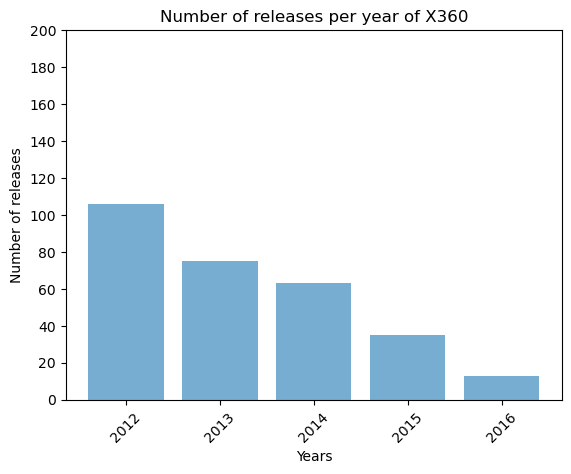

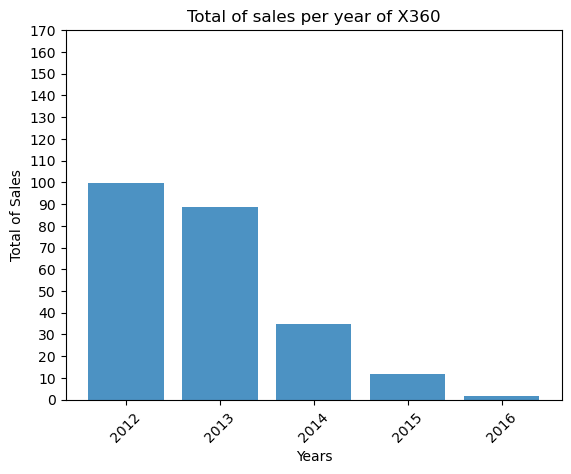

None
DISTRIBUCIÓN DE PS3


El valor mínimo es: 2006
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PS3


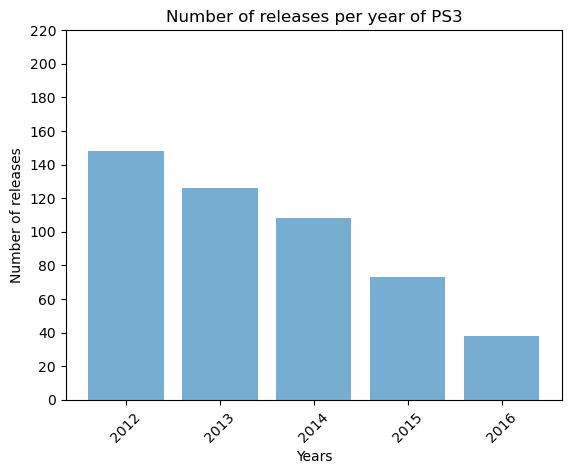

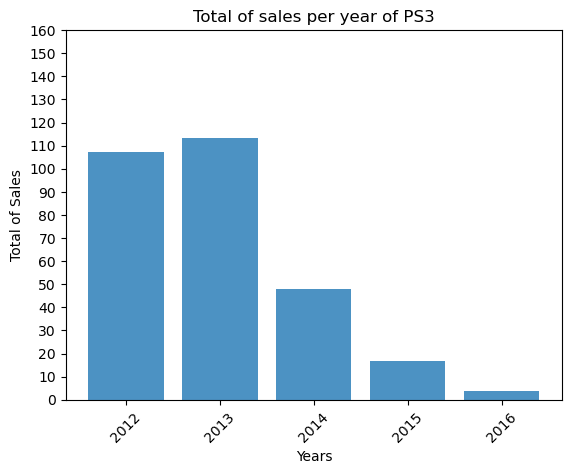

None
DISTRIBUCIÓN DE Wii


El valor mínimo es: 2006
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma Wii


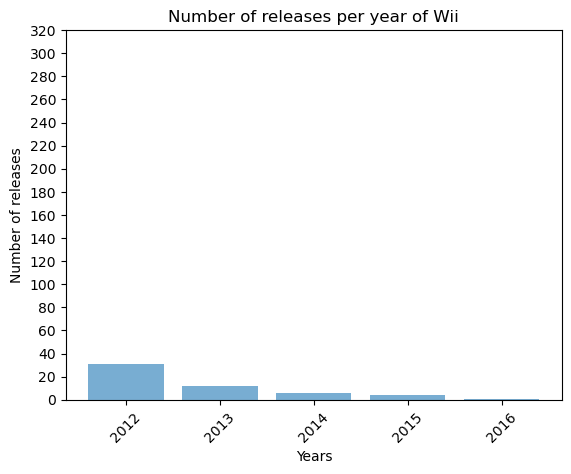

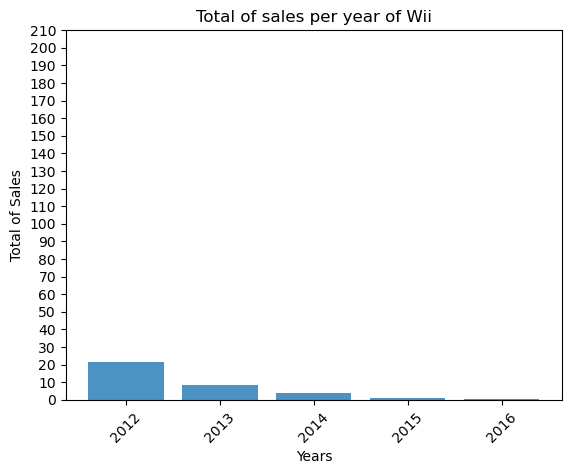

None
DISTRIBUCIÓN DE DS


El valor mínimo es: 1985
El valor máximo es: 2013
Años de lanzamiento y ventas de videojuegos de la plataforma DS


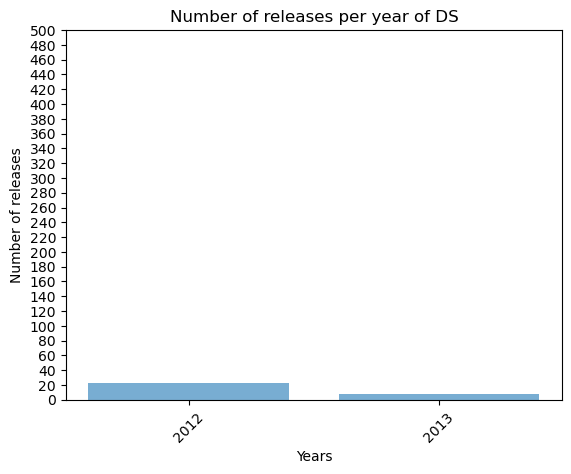

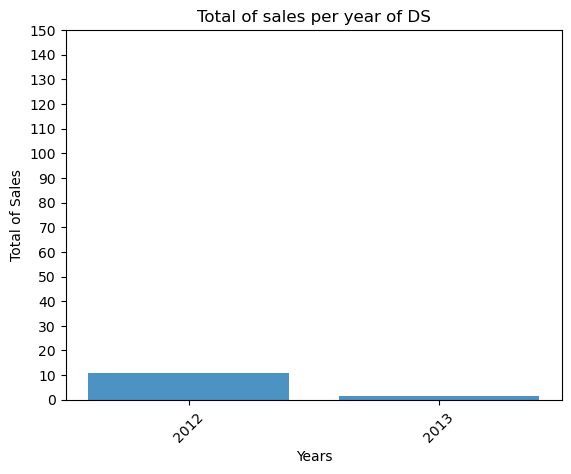

None
DISTRIBUCIÓN DE PS4


El valor mínimo es: 2013
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PS4


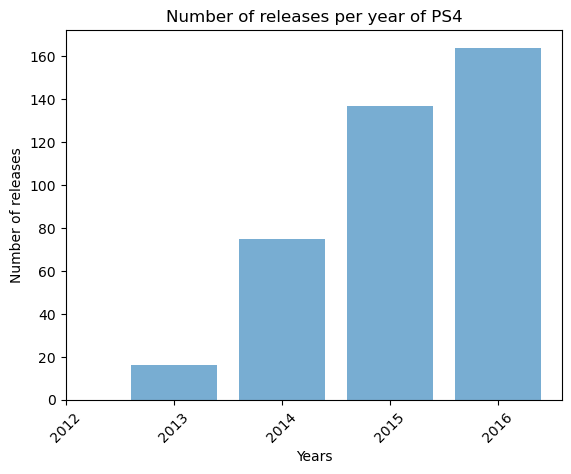

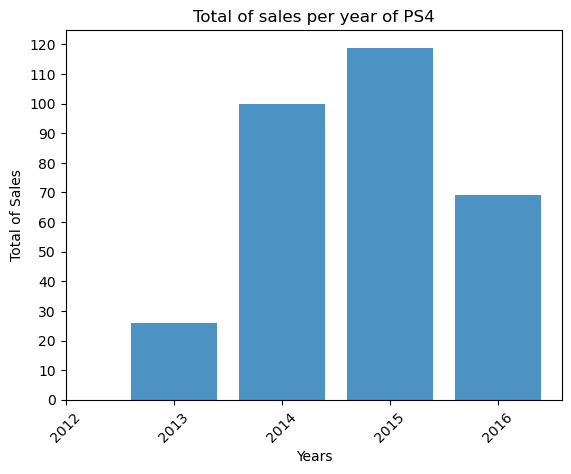

None
DISTRIBUCIÓN DE PSP


El valor mínimo es: 2004
El valor máximo es: 2015
Años de lanzamiento y ventas de videojuegos de la plataforma PSP


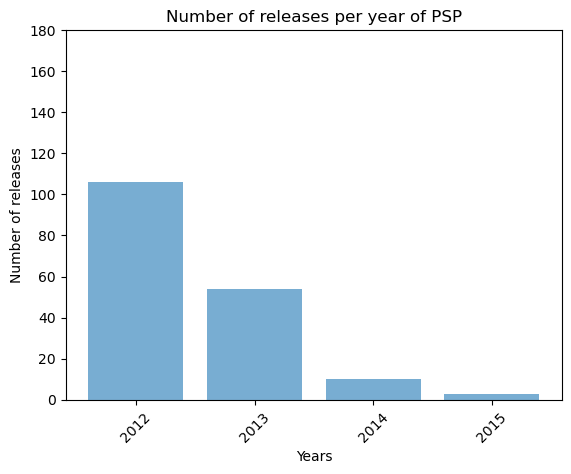

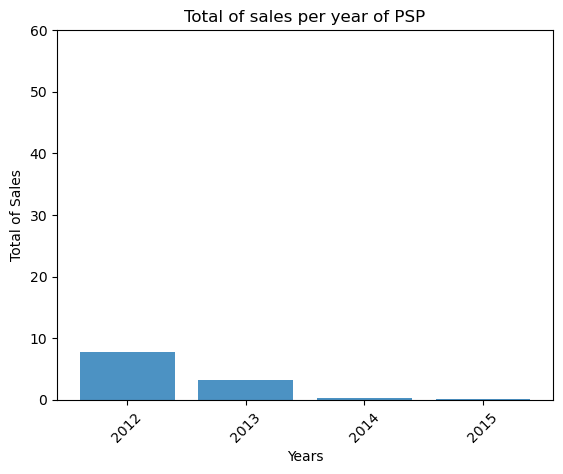

None
DISTRIBUCIÓN DE PC


El valor mínimo es: 1985
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PC


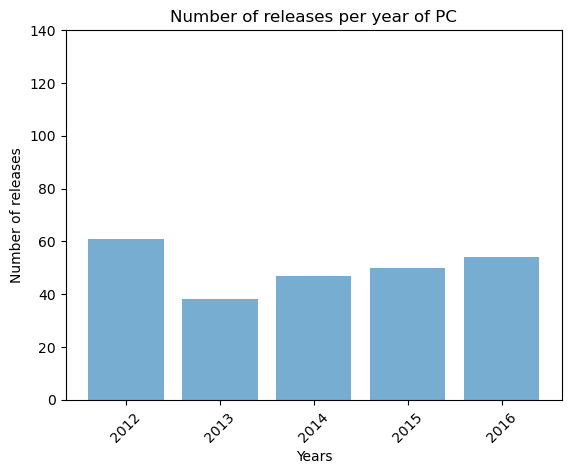

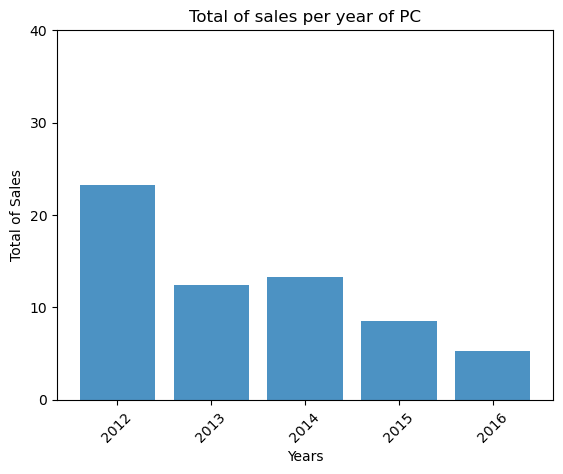

None
DISTRIBUCIÓN DE 3DS


El valor mínimo es: 2011
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma 3DS


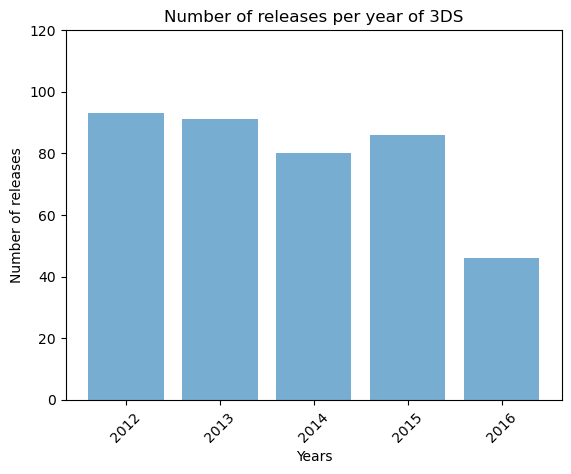

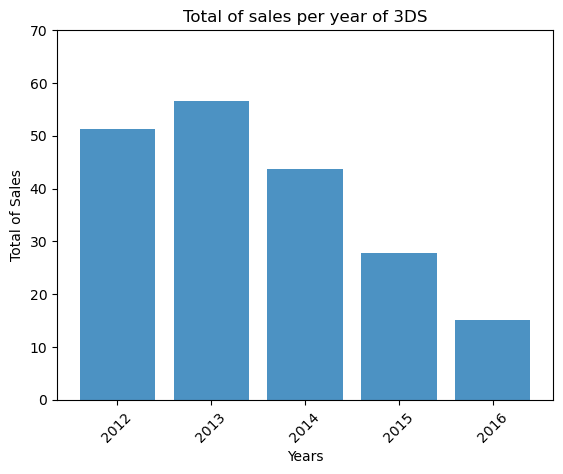

None
DISTRIBUCIÓN DE XOne


El valor mínimo es: 2013
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma XOne


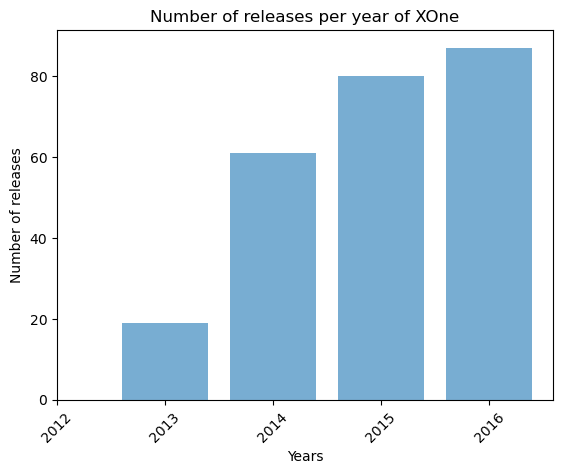

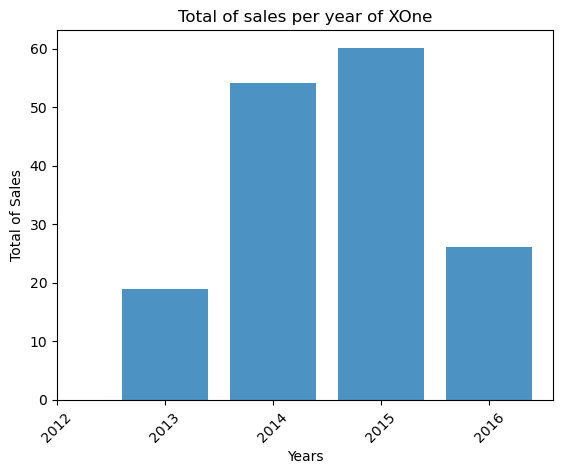

None
DISTRIBUCIÓN DE WiiU


El valor mínimo es: 2012
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma WiiU


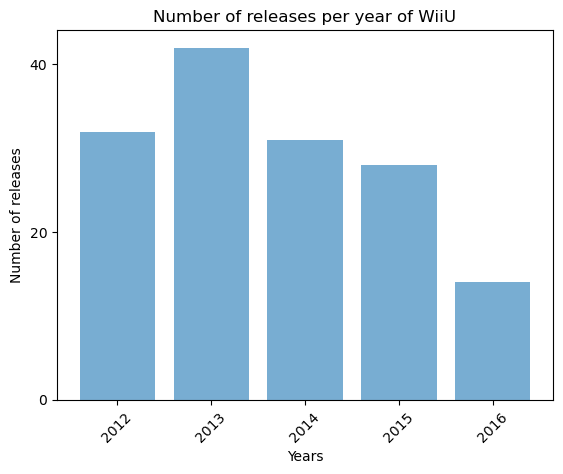

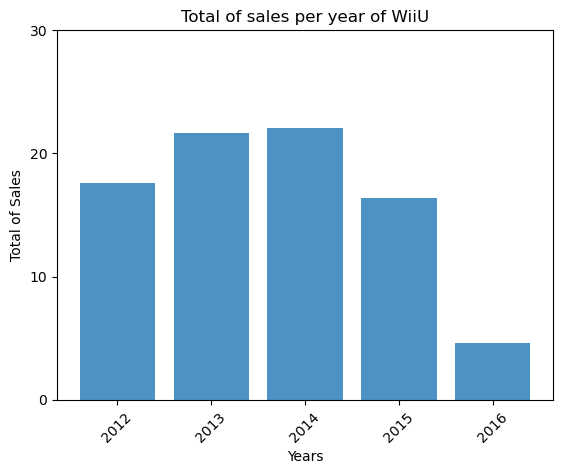

None
DISTRIBUCIÓN DE PSV


El valor mínimo es: 2011
El valor máximo es: 2016
Años de lanzamiento y ventas de videojuegos de la plataforma PSV


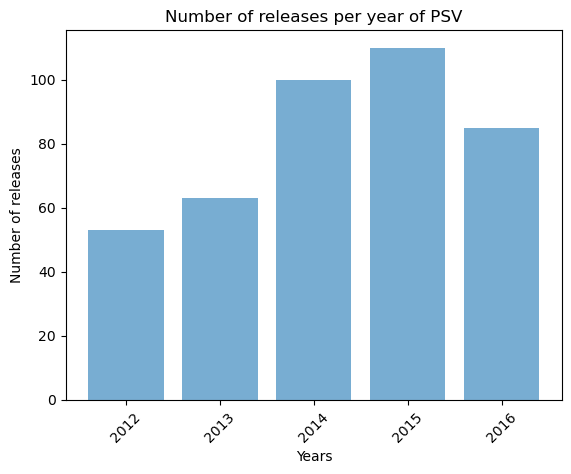

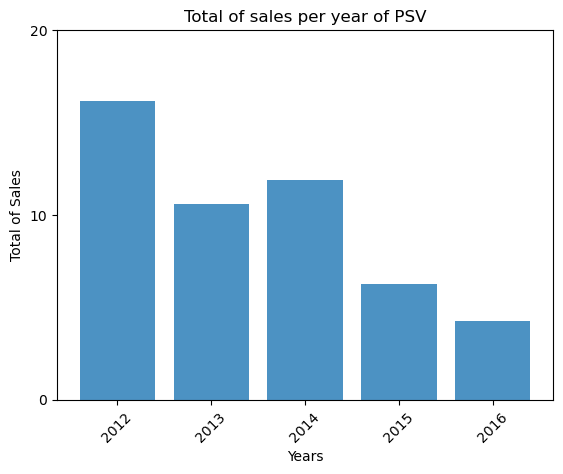

None


In [75]:
for platform in ice_df_best_plt['platform']:
    ice_platform1=distribution_graphs(platform)
    print(ice_platform1)

### 3.5 Muestra las plataformas lideres en ventas, las que crecen y las que se reducen. Elegir plataformas rentables.

Las plataformas posiblemente rentables serán aquellas que tengan una buena relación de estrenos de videojuegos contra las ventas, en los ultimos 5 años.  Así que del top 10 de plataformas que tienen estrenos desde 2012, que nos indica que es una plataforma en la que los desarrolladores siguen trabajando se detectó que las plataformas rentables para el año 2017 son:

PS4 ya que presenta un aumento constante en videjuegos estreno año con año y muestra una cantidad de ventas por encima de 60 incluso en el último año. En el 2016 se ve que en cada plataforma hay un comportamiento donde los juegos nuevos todavía no son tan vendidos como los de otros años.

Xbox One debido a que desde salió a la venta en 2013 sus ganancias han ido aumentando con excepción del último año, pero que se espera que el otro año la cifra del 2016 sea similar o mayor a la de los demás años (2013-2015), y además su número de estrenos ha ido aumentando año con año al igual que con PS4.

PC porque ha ido en aumento el número de estreno de viedejuegos y aunque no tenga ganacias a nivel de PS4 y Xone aún así se espera un rango de ganacias que se mantenga en un cierto rango o que puede que aumente. 

3DS es uno de los casos que sus estrenos se encontraron dentro de un rango de entre 80 y 93 a excepción del último año, por lo que se espera que los juegos estrenados los ultimos dos años (2015 y 2016) den un poco más de ganancias.

WiiU a pesar de que ya pasó su pico de ventas podría ser que el 2017 sea su último año con un número de ventas mayor o igual a 20 en titulos del 2015 y un poco más de ventas en títulos del 2016



### 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [79]:
# ##Comprobación
# ice_platform, sales_values, sales_mean= distribution_total('Wii')
# display(ice_platform['total_sales'].median())
# display(ice_platform['total_sales'].mean())

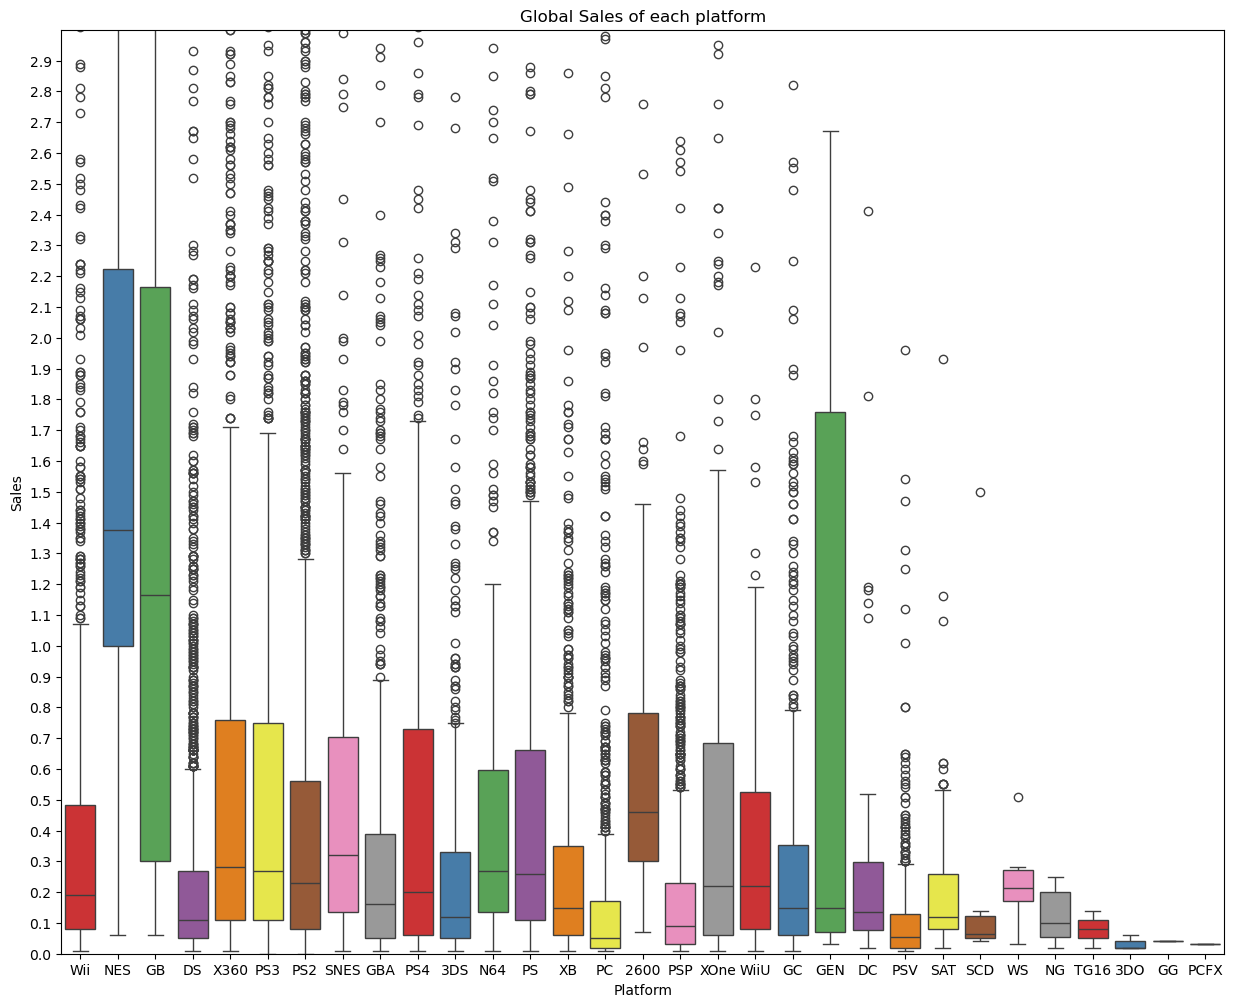

In [80]:
    # Boxplot
plt.figure(figsize=(15,12))  # Cambiar tamaño del gráfico
sns.boxplot(data=ice_df, x='platform', y='total_sales',meanline=True, palette='Set1',hue='platform')

plt.title(f'Global Sales of each platform')
plt.ylim(0,3)
plt.yticks(np.arange(0, 3, 0.1))
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

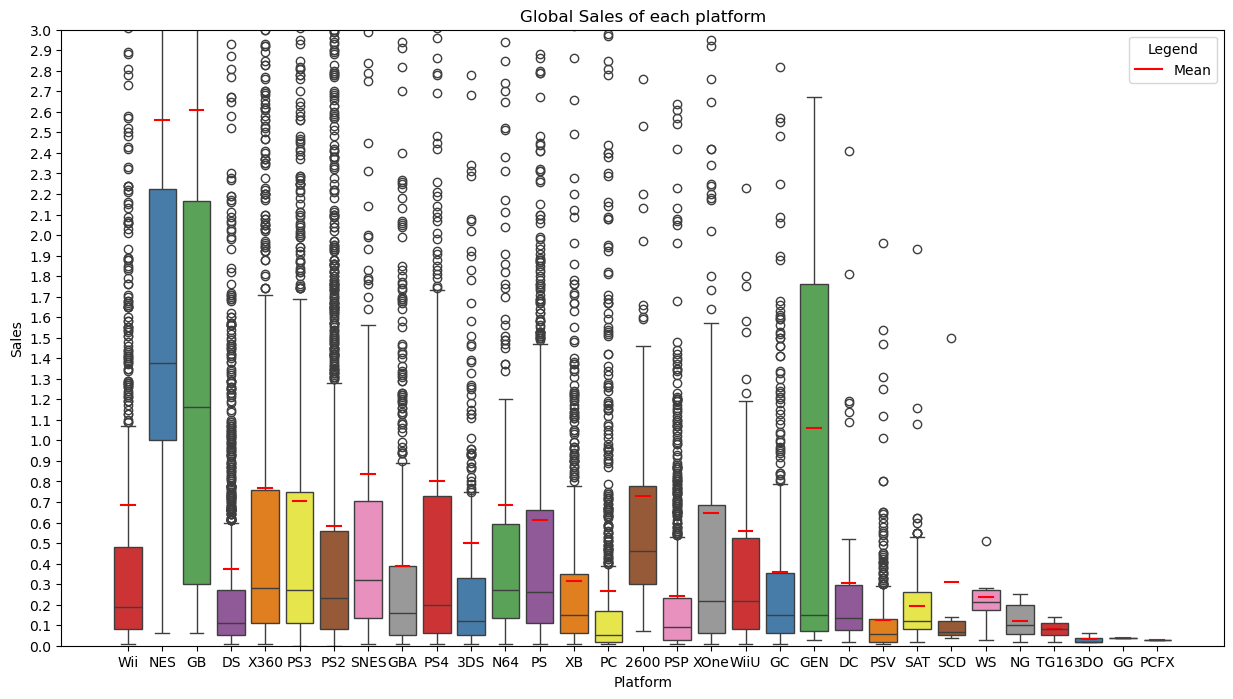

In [81]:
plt.figure(figsize=(15,8))
sns.boxplot(data=ice_df, x='platform', y='total_sales', palette='Set1',hue='platform')

# Dibujar manualmente líneas de la media
for i, platform in enumerate(ice_df['platform'].unique()):
    mean_value = ice_df[ice_df['platform'] == platform]['total_sales'].mean()
    plt.plot([i-0.2, i+0.2], [mean_value, mean_value], color='red', label=f'Mean' if i == 0 else "")

plt.title(f'Global Sales of each platform')
plt.ylim(0, 3)  # Ajustar el rango de las ventas
plt.yticks(np.arange(0, 3.1, 0.1))  # Ajuste de los valores en el eje Y
plt.xlabel('Platform')
plt.ylabel('Sales')

# Mostrar leyenda si es necesario
plt.legend(title='Legend')

plt.show()

NES, GB Y GEN muestran ser las plataformas con mayor promedio de ventas de manera global.PCFX, 3DO y GG son las que tienen menor promedio de ventas. Entre mas ancha este la caja una mayor dispersión o variabilidad de los datos entre el Q1 y el Q3. Es decir, los datos están más extendidos y hay una mayor diferencia. Por el contrario cuando la caja esté más estrecha indica una menor dispersión de los datos. La mayoría de los valores están más concentrados alrededor de la mediana, sugiriendo que los datos son más similares entre sí.La mayoría tiene los bigotes superiores muy prolongados lo que sugiere valores significativamente altos

La media situada por encima de la línea superior del cuadro es cuando la media de una plataforma se encuentra por encima del cuartil superior, significa que está fuera del rango intercuartil y pertenece al 25% de los valores más altos del conjunto de datos. Esto indica que los valores promedio de esta plataforma están en el rango de los valores extremos superiores al 75% de los datos. No es común, pero ocurre porque los datos están sesgados hacia valores altos.

Por otro lado, cuando la media está por encima de la mediana pero aún dentro del cuadro, significa que el valor promedio está en el 50% superior del rango de los datos. Esto implica que los valores tienden a ser un poco más altos en promedio, lo que sugiere un sesgo leve hacia valores superiores (un sesgo positivo). Sin embargo, al estar contenida dentro del rango intercuartil, la media aún forma parte de los valores centrales y no de los extremos.

### 3.7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [84]:
ice_df['critic_score']=ice_df['critic_score']/10
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [85]:
ice_mean_critic=ice_df.groupby(by='platform')['critic_score'].mean().reset_index()
ice_mean_user=ice_df.groupby(by='platform')[['user_score','total_sales']].mean().reset_index()

# display(ice_mean_critic)
# display(ice_mean_user)
ice_means_cu= ice_mean_critic.merge(ice_mean_user,on='platform',how='left').dropna()
# ice_means_cu['diference']=ice_means_cu['critic_score']-ice_means_cu['user_score']
display(ice_means_cu)


platform  critic_score  user_score  total_sales
2       3DS      6.710119    6.896957     0.498077
3        DC      8.735714    8.528571     0.306731
4        DS      6.376151    7.069654     0.374765
6       GBA      6.737215    7.384526     0.386679
7        GC      6.948884    7.488273     0.357788
13       PC      7.592867    7.064713     0.266448
15       PS      7.151500    7.699034     0.610576
16      PS2      6.872727    7.541458     0.581106
17      PS3      7.038293    6.760270     0.705973
18      PS4      7.209127    6.756274     0.801378
19      PSP      6.742424    7.199265     0.243218
20      PSV      7.079167    7.325333     0.125744
26      Wii      6.282393    6.899900     0.687508
27     WiiU      7.073333    6.913333     0.559116
28     X360      6.861681    6.716857     0.769746
29       XB      6.985931    7.418886     0.312791
30     XOne      7.332544    6.554404     0.645020

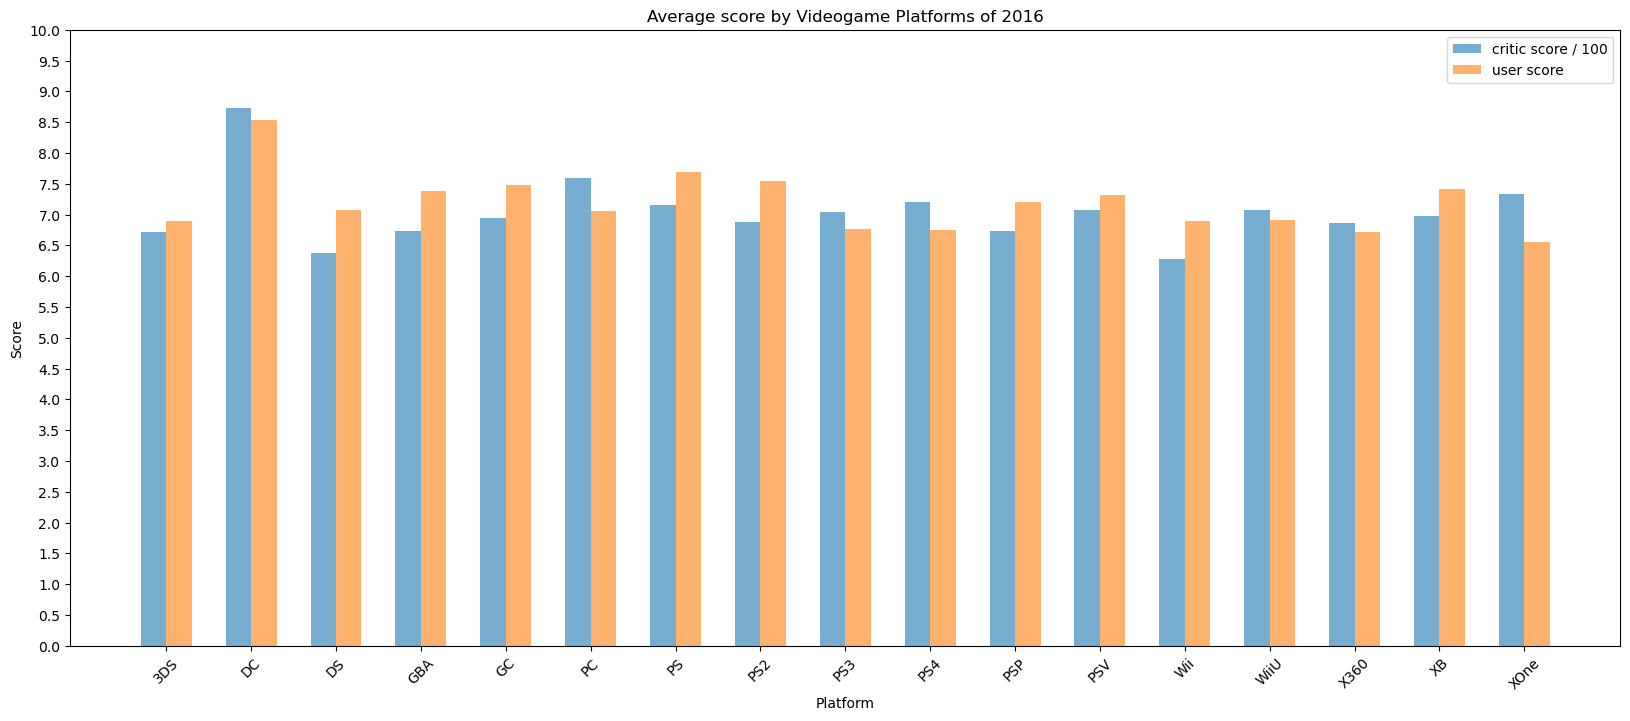

<Figure size 1000x600 with 0 Axes>

La correlación entre el puntaje de usuario y las ventas es: -0.5142631137858212
La correlación entre el puntaje de critica y las ventas es: -0.19847197806849243


In [86]:
x= np.arange(len(ice_means_cu['platform']))
plt.figure(figsize=(20,8))
width=0.3
plt.bar(x - width/2,ice_means_cu['critic_score'],width=width,alpha=0.6, label='critic score / 100')
plt.bar(x + width/2,ice_means_cu['user_score'],width=width,alpha=0.6, label='user score')
plt.xticks(x,ice_means_cu['platform'],rotation=45)
plt.ylim(0,10)
plt.yticks(np.arange(0,10.5,0.5))
plt.xlabel('Platform')  
plt.ylabel('Score') 
plt.title('Average score by Videogame Platforms of 2016') 
plt.legend()
plt.figure(figsize=(10,6))
plt.show()

correlation1 = ice_means_cu['user_score'].corr(ice_means_cu['total_sales'])
correlation2 = ice_means_cu['critic_score'].corr(ice_means_cu['total_sales'])
print(f'La correlación entre el puntaje de usuario y las ventas es: {correlation1}')
print(f'La correlación entre el puntaje de critica y las ventas es: {correlation2}')

La correlación entre el puntaje de usuario y las ventas sugiere que a medida que aumentan las puntuaciones de los usuarios, las ventas tienden a disminuir, y viceversa. La relación entre las puntuaciones de los críticos y las ventas no es significativa. La puntuación critica se ajusto a valores de la puntuación de usuario. Se observa que las plataformas seleccionadas como potenciales a tener mayores ventas a futuro tienen una mayor puntuación por parte de la crítica que por parte de los usuarios, a excepción de  3DS que la diferencia entre sus puntuaciones es mínima pero que tiene mayor puntuación de usuario que de los críticos, por una pequeña diferencia de 0.18, la cual lo hace la plataforma con la menor diferencia de puntajes entre las que tienen mayor puntaje de usuario que de criticos.

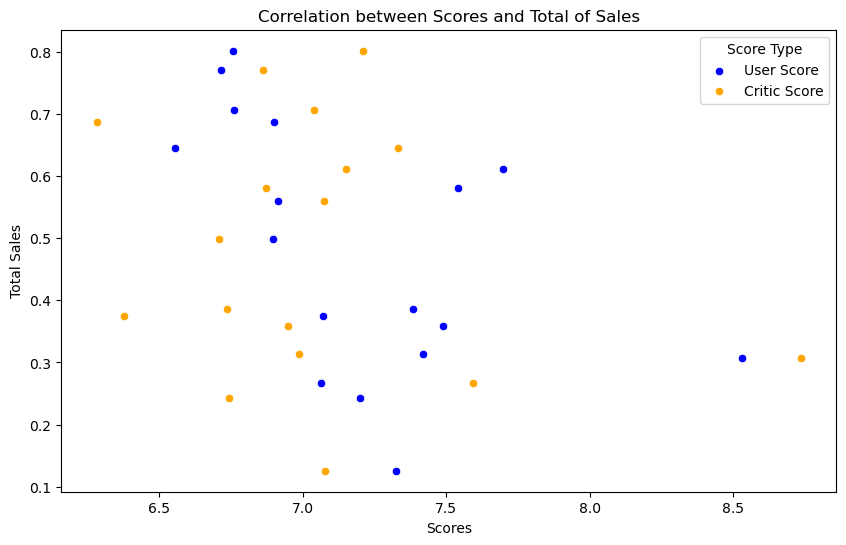

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ice_means_cu, x='user_score', y='total_sales', color='blue', label='User Score')
sns.scatterplot(data=ice_means_cu, x='critic_score', y='total_sales', color='orange', label='Critic Score')
plt.title('Correlation between Scores and Total of Sales')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.legend(title='Score Type')
plt.show()

En la gráfica de dispersión que relacione el puntaje de usuario y las ventas, se  observar un patrón descendente, donde las ventas disminuyen a medida que aumentan las puntuaciones de los usuarios, reflejando la correlación negativa identificada. Por otro lado, en la dispersión entre puntajes de críticos y ventas, se observa una distribución sin un patrón claro o significativo, dado que no se encontró una correlación fuerte entre estas variables. Estos resultados visuales refuerzan la idea de que el puntaje de usuario podría estar vinculado a las preferencias o expectativas de los consumidores en las regiones analizadas, mientras que los puntajes de los críticos parecen tener menos impacto directo en las ventas.

### 3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas

In [91]:
##Juegos que aparecen en más de una plataforma
duplicados=ice_df['name'].value_counts().reset_index()
duplicados.columns=['name_game','reps']
dup=duplicados[duplicados['reps']>7]
display(dup)

name_game  reps
0               Need for Speed: Most Wanted    12
1                             Madden NFL 07     9
2                                   FIFA 14     9
3                               Ratatouille     9
4                  LEGO Marvel Super Heroes     9
5              LEGO Harry Potter: Years 5-7     8
6                             Madden NFL 08     8
7                                  Monopoly     8
8                                   FIFA 15     8
9                            FIFA Soccer 13     8
10                          LEGO The Hobbit     8
11             Lego Batman 3: Beyond Gotham     8
12                                     Cars     8
13  LEGO Star Wars II: The Original Trilogy     8
14                 The LEGO Movie Videogame     8
15                      LEGO Jurassic World     8
16                    Angry Birds Star Wars     8
17                                 Terraria     8

In [92]:
def games(title):
    tabla=ice_df[(ice_df['name']==title)&(ice_df['year_of_release']!=-1)]
    plt.title(f'Releases in platforms of {title}')
    plt.bar(x=tabla['platform'],height=tabla['total_sales'],color='gray')
    plt.xlabel('Platform')
    plt.ylabel('Total of sales')
    min=tabla['year_of_release'].min()
    max=tabla['year_of_release'].max()
    print(f'Year of release of {title} between :{min}-{max}')
    return plt.show()

Year of release of Need for Speed: Most Wanted between :2005-2013


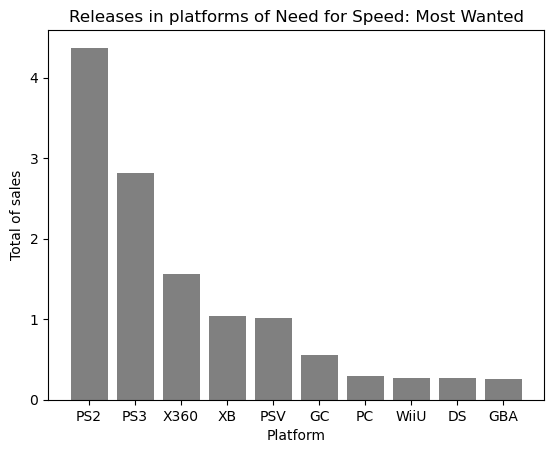

Year of release of Madden NFL 07 between :2006-2006


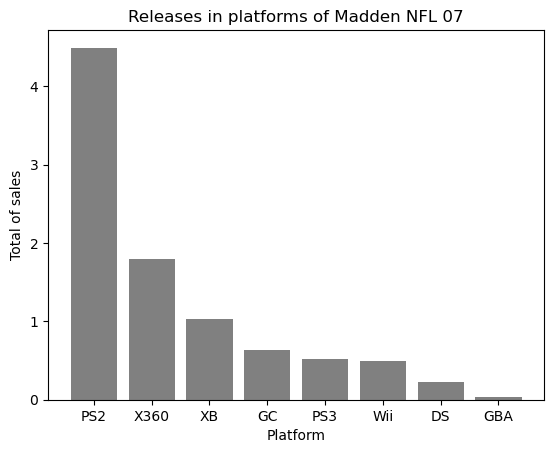

Year of release of FIFA 14 between :2013-2013


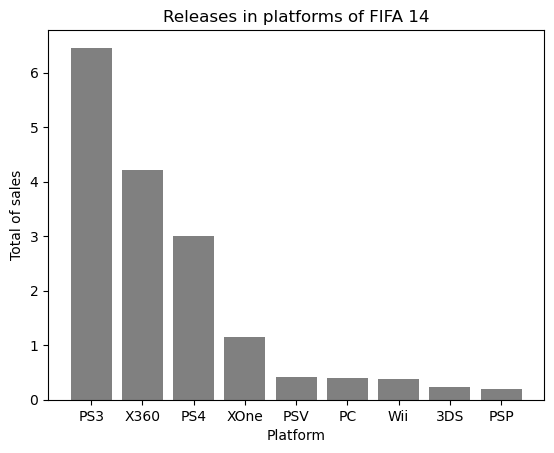

Year of release of Ratatouille between :2007-2007


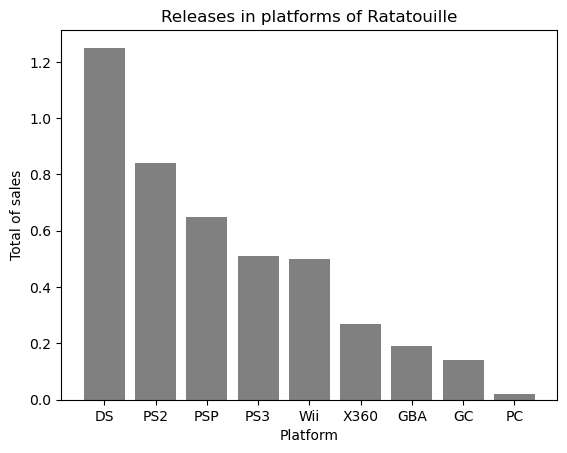

Year of release of LEGO Marvel Super Heroes between :2013-2013


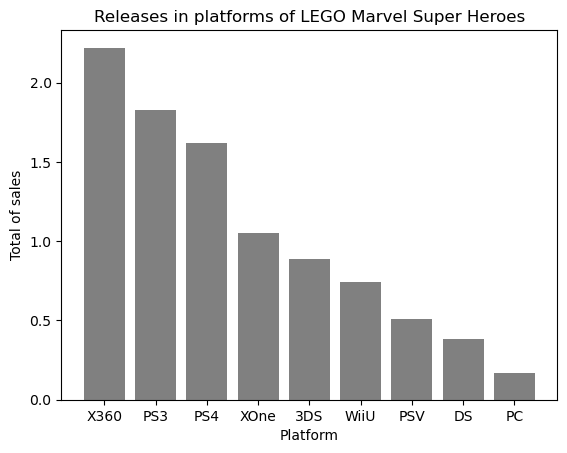

Year of release of LEGO Harry Potter: Years 5-7 between :2012-2012


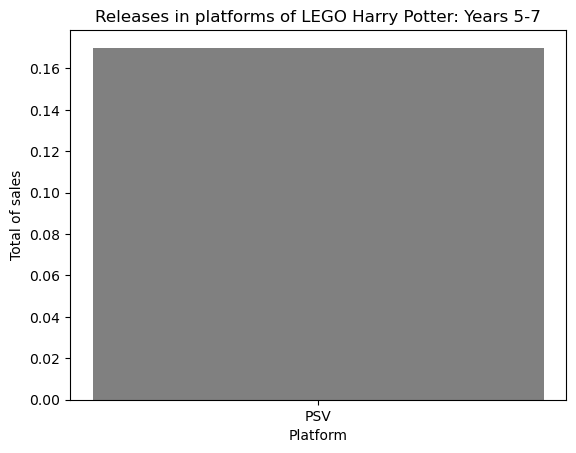

Year of release of Madden NFL 08 between :2007-2007


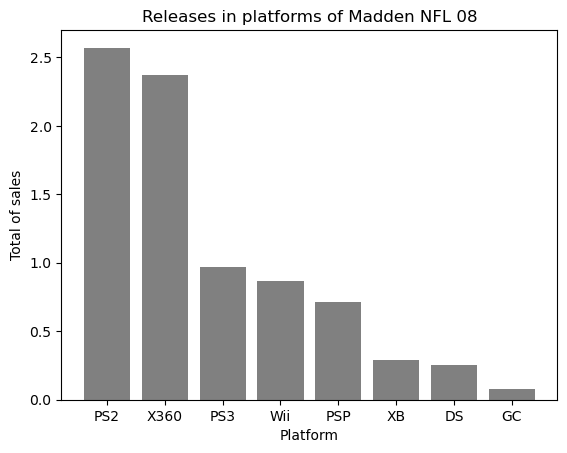

Year of release of Monopoly between :1994-2010


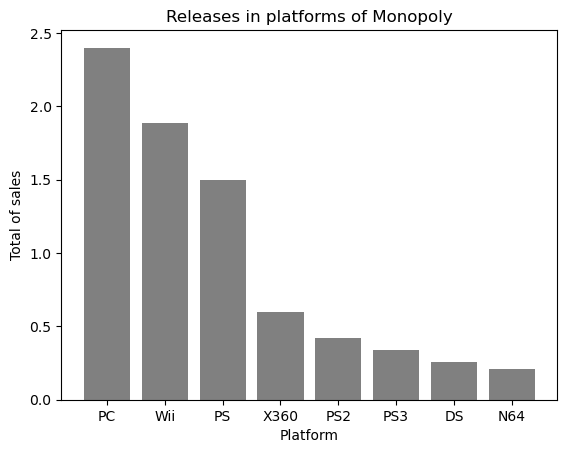

Year of release of FIFA 15 between :2014-2014


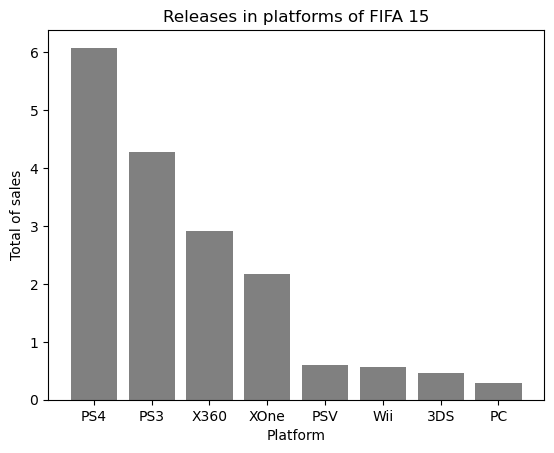

Year of release of FIFA Soccer 13 between :2012-2012


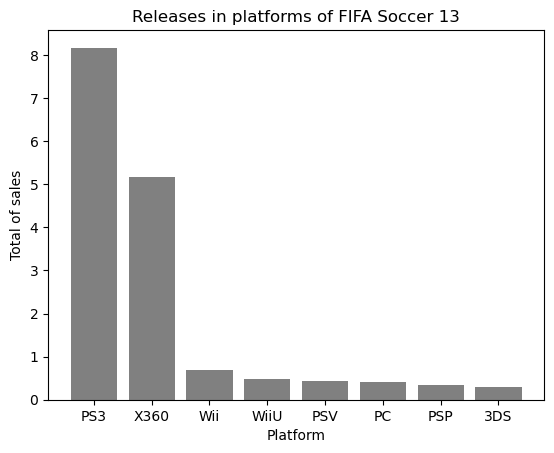

Year of release of LEGO The Hobbit between :2014-2014


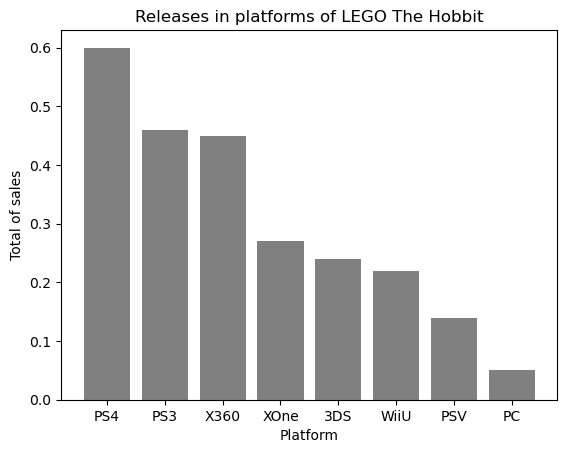

Year of release of Lego Batman 3: Beyond Gotham between :2014-2014


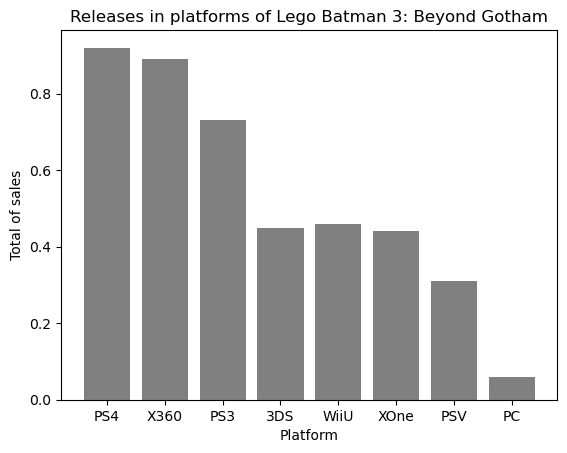

Year of release of Cars between :2006-2006


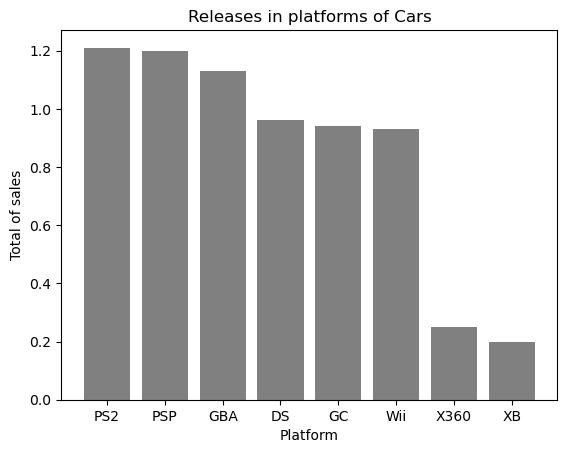

Year of release of LEGO Star Wars II: The Original Trilogy between :2006-2006


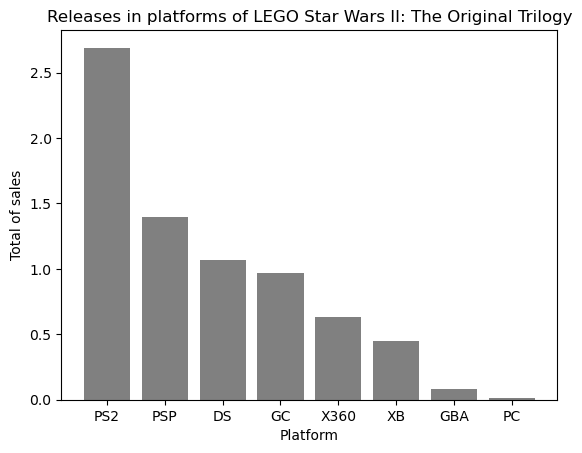

Year of release of The LEGO Movie Videogame between :2014-2014


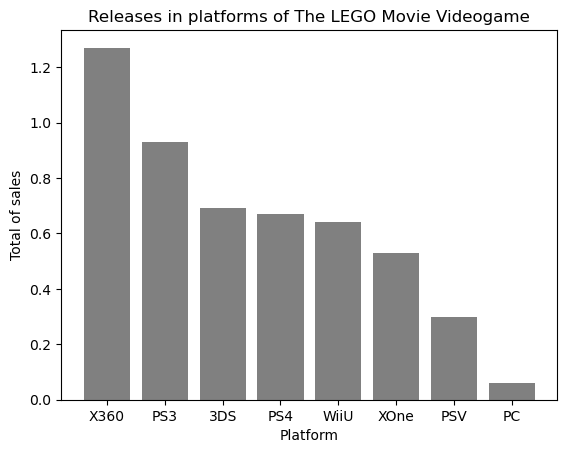

Year of release of LEGO Jurassic World between :2015-2015


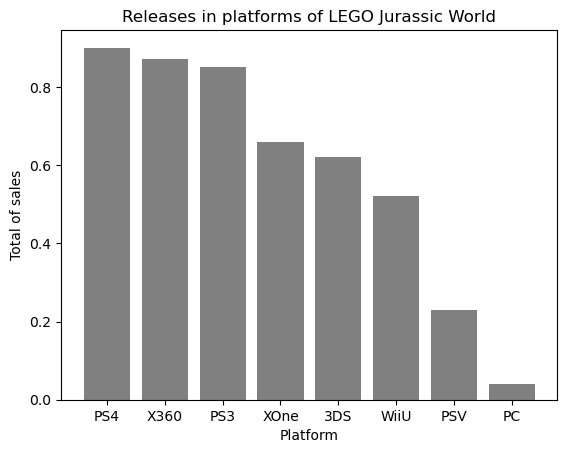

Year of release of Angry Birds Star Wars between :2013-2013


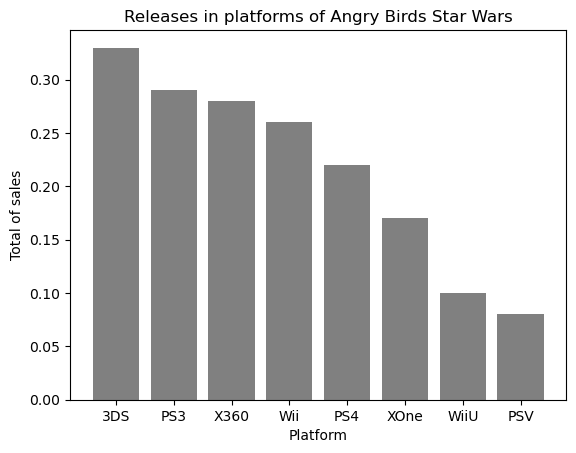

Year of release of Terraria between :2011-2016


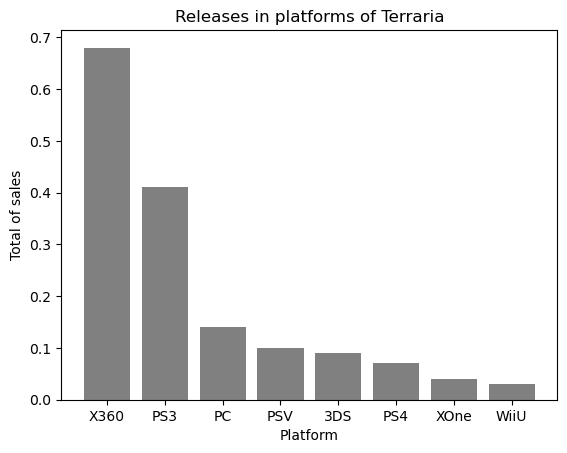

In [93]:
for title in dup['name_game']:
    games(title)

En el caso de considerar los videojuegos que tienen mas de 8 lanzamientos en plataformas diferentes. De esta muestra de 5 entregas que han tenido el mayor número de lanzamientos en diferentes plataformas 3 de ellas son estrenos del 2013 y dentro de ellos hay una entrega que se ha reproducido desde 2005, los cuales muestran que sus mayores ventas son en las plataformas que cuentan con el mayor número de ventas de videojuegos en 2016, y que también después se encuentran lanzamientos en las dos primeras plataformas que se consideran como rentables.

Con una muestra más grande de videojuegos mayores a 7 lanzamientos. Se observa que algunos videojuegos tienen un rango de años de lanzamiento en plataformas bastante amplio. En esos casos se observa que si su ultimo año se acerca al inicio de operación de las plataformas que anteriormente se consideraron como potenciales a crecer, existe visiblemente venta de esos videojuegos a las plataformas recientes. A medida que se observan juegos más nuevos se alcanza a observar que tienen un gran número de ventas en PS3 y XBOX 360 que son las plataformas con mayor número de ventas en 2016, pero que tras estos datos se encuentran las ventas de al menos una de las plataformas potencialmente a crecer.


3.8 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

### 3.9 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los géneros más rentables, como Acción y Deportes, destacan por su gran volumen de ventas. Esto tiene sentido ya que muchos juegos en estos géneros suelen ser multiplataforma, lo que amplía su alcance y facilita el acceso a un público más diverso y global. Por otro lado, géneros como Aventura y Estrategia parecen tener un enfoque más de nicho, atrayendo a públicos específicos en lugar de audiencias masivas. Esto podría explicar sus menores ventas globales, ya que no cuentan con el mismo nivel de popularidad o accesibilidad que los géneros más dominantes. 

In [98]:
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [99]:
ice_genre_best_gen=ice_df.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
display(ice_genre_best_gen)
ice_genre_best=ice_df.groupby(by=['genre','year_of_release'])['total_sales'].sum().reset_index()
display(ice_genre_best)

probe=ice_genre_best[ice_genre_best['year_of_release']==2009]
display(probe)

genre  total_sales
0         action      1744.17
1         sports      1331.27
2        shooter      1052.45
3   role-playing       934.56
4       platform       827.77
5           misc       802.51
6         racing       728.67
7       fighting       447.53
8     simulation       389.97
9         puzzle       242.57
10     adventure       237.59
11      strategy       174.23
12       unknown         2.42

genre  year_of_release  total_sales
0      action               -1        27.65
1      action             1980         0.34
2      action             1981        14.79
3      action             1982         6.50
4      action             1983         2.86
..        ...              ...          ...
395  strategy             2013         6.12
396  strategy             2014         0.98
397  strategy             2015         1.85
398  strategy             2016         1.13
399   unknown             1993         2.42

[400 rows x 3 columns]

genre  year_of_release  total_sales
30         action             2009       137.69
59      adventure             2009        20.23
89       fighting             2009        31.90
121          misc             2009        75.81
158      platform             2009        40.53
193        puzzle             2009        19.79
226        racing             2009        33.69
258  role-playing             2009        47.31
295       shooter             2009        69.29
326    simulation             2009        32.92
364        sports             2009       137.37
391      strategy             2009        12.29

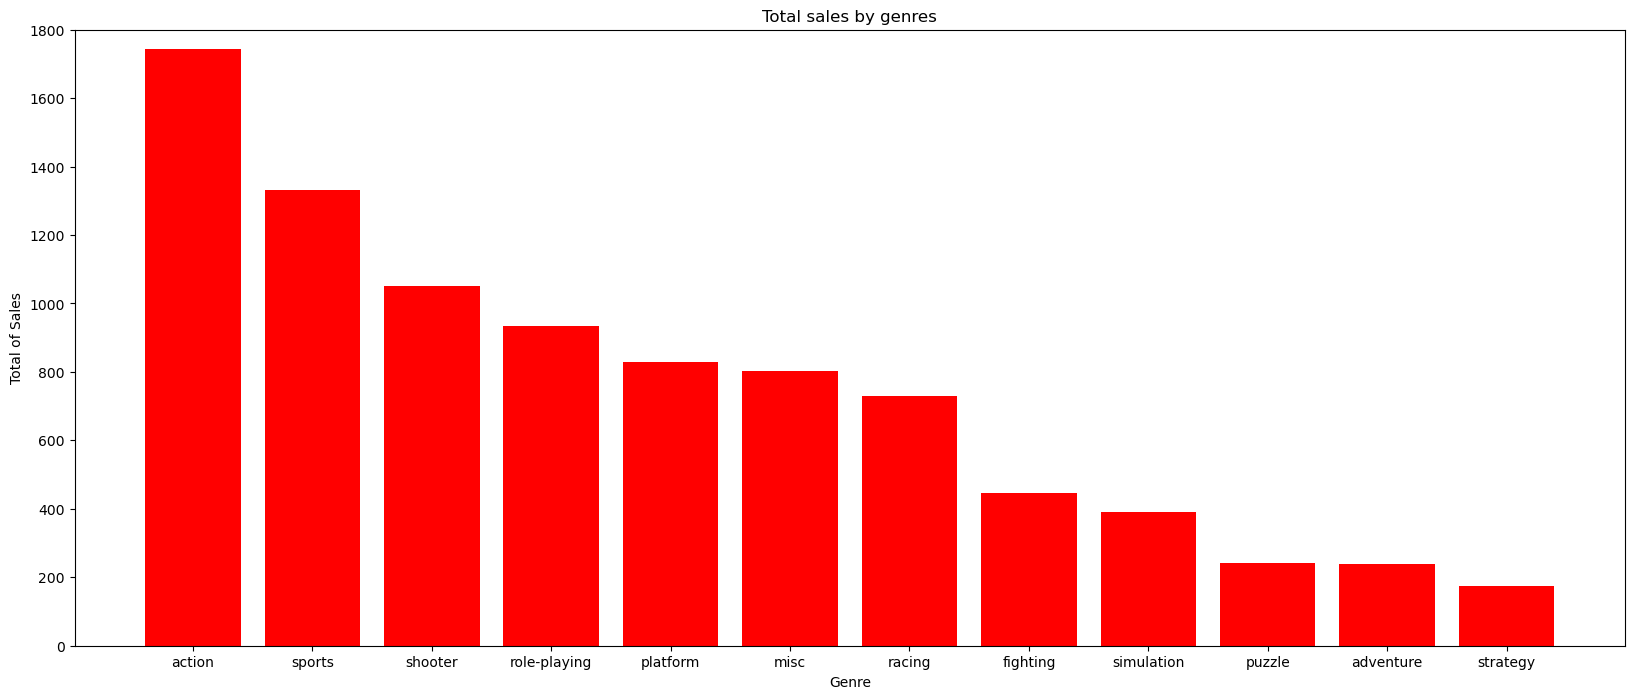

In [100]:
ice_genre_best_gen=ice_genre_best_gen[ice_genre_best_gen['genre']!='unknown']

plt.figure(figsize=(20,8))
plt.title('Total sales by genres')
plt.bar(x=ice_genre_best_gen['genre'],height=ice_genre_best_gen['total_sales'],color='red')
plt.xlabel('Genre')
plt.ylabel('Total of Sales')
plt.ylim(0,1800)
plt.show()

In [101]:
def scores(gen):
    plt.figure(figsize=(20,8))
    for genre in ice_genre_best:
        gen_graph=ice_genre_best[(ice_genre_best['genre']==gen)&(ice_genre_best['year_of_release']!=-1)&(ice_genre_best['genre']!='unknown')]
        plt.bar(x=gen_graph['year_of_release'],height=gen_graph['total_sales'])
        inf_lim = gen_graph['year_of_release'].min()
        sup_lim = gen_graph['year_of_release'].max()
        supy_lim = gen_graph['total_sales'].max() 
        plt.xlim(inf_lim-1,sup_lim+1)
        plt.xticks(np.arange(inf_lim,sup_lim+1,1))
        plt.yticks(np.arange(0,supy_lim+10,10))
        plt.title(f'Distribution of {gen}')
        plt.xlabel('Year of Release')
        plt.ylabel('Total of Sales')
    return 

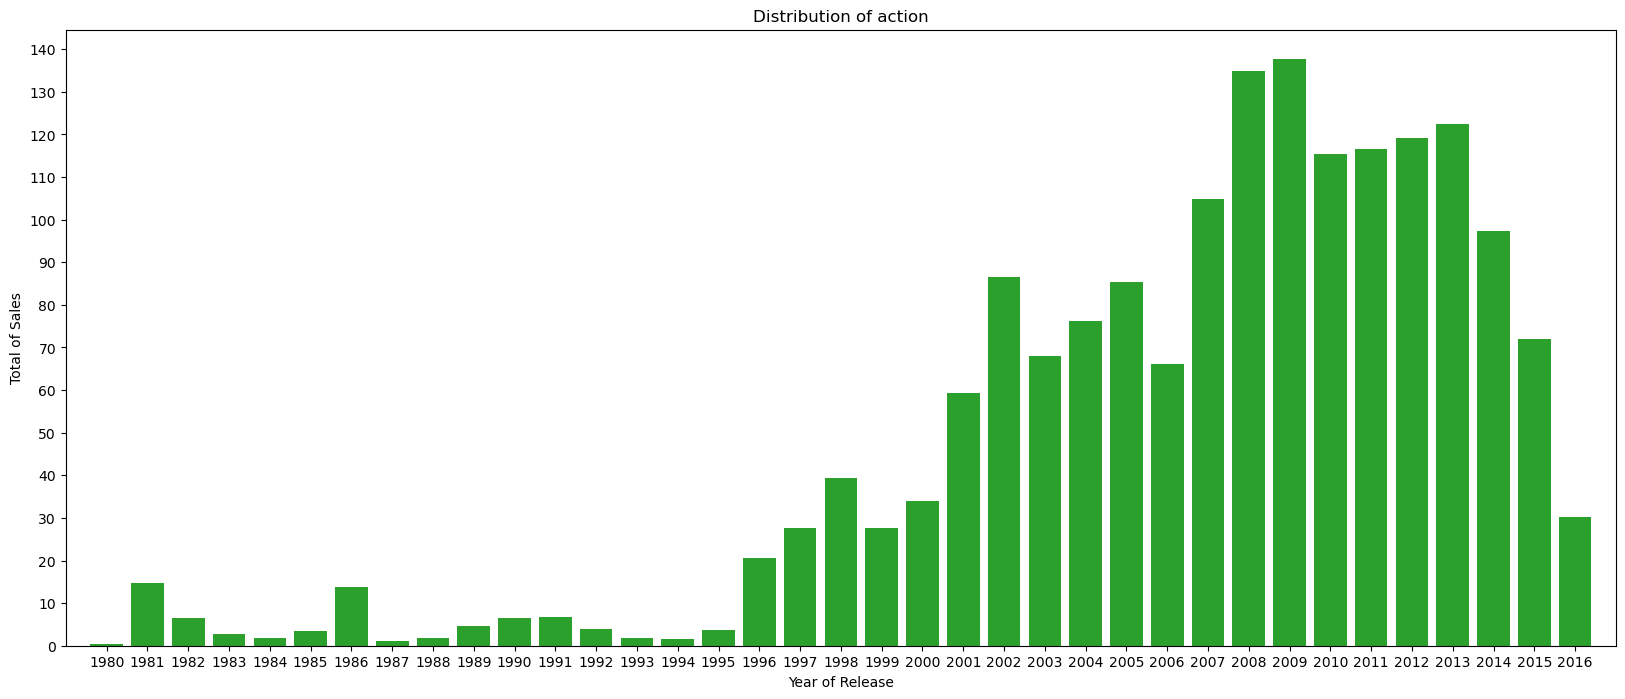

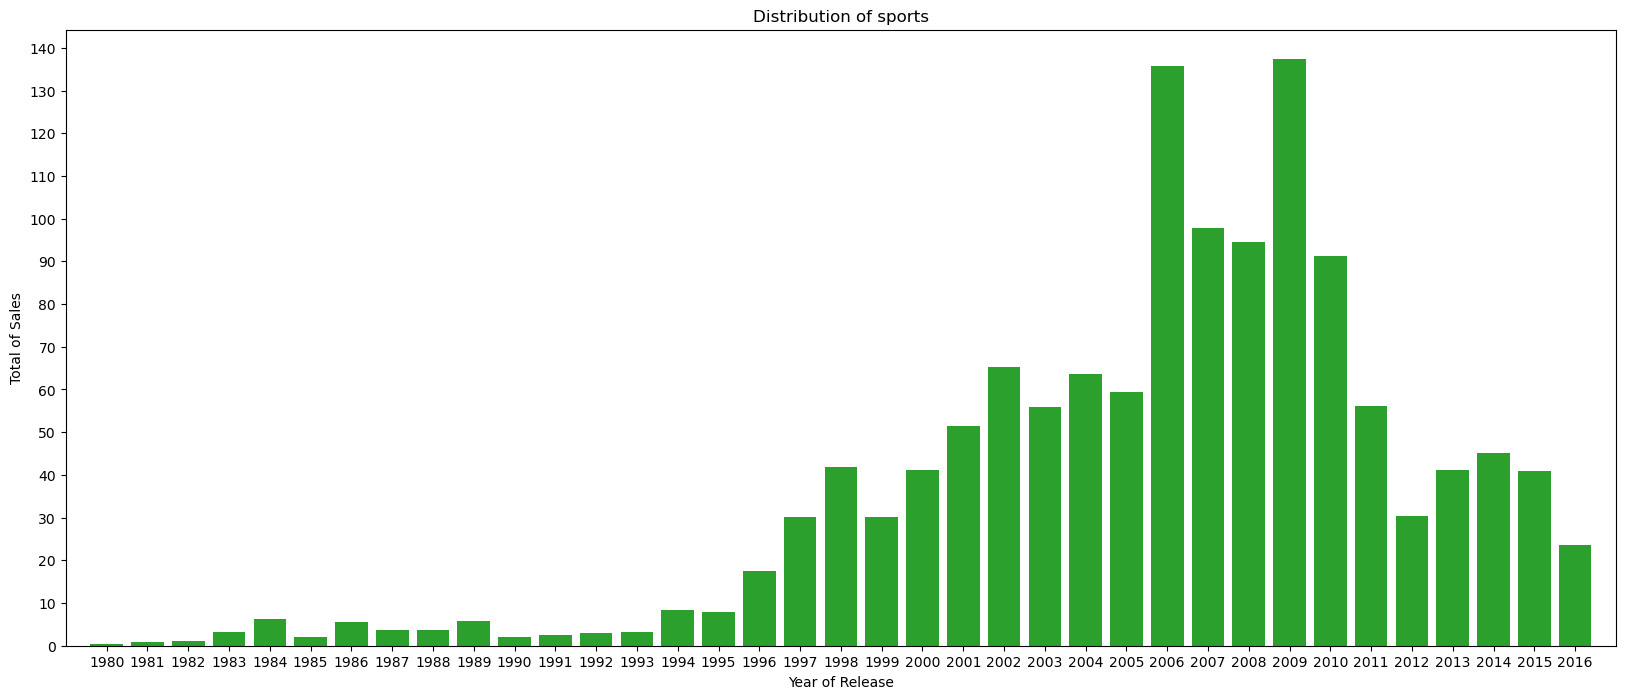

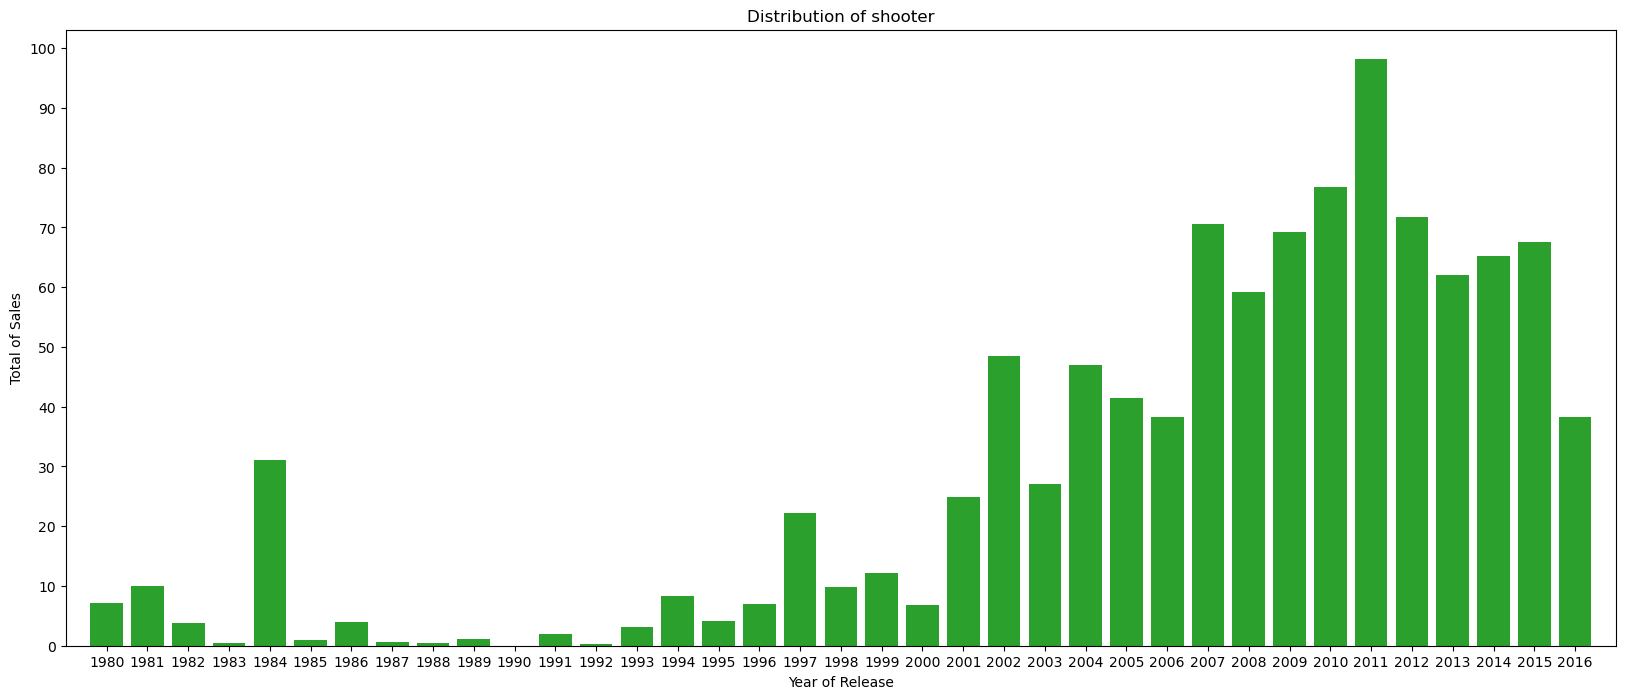

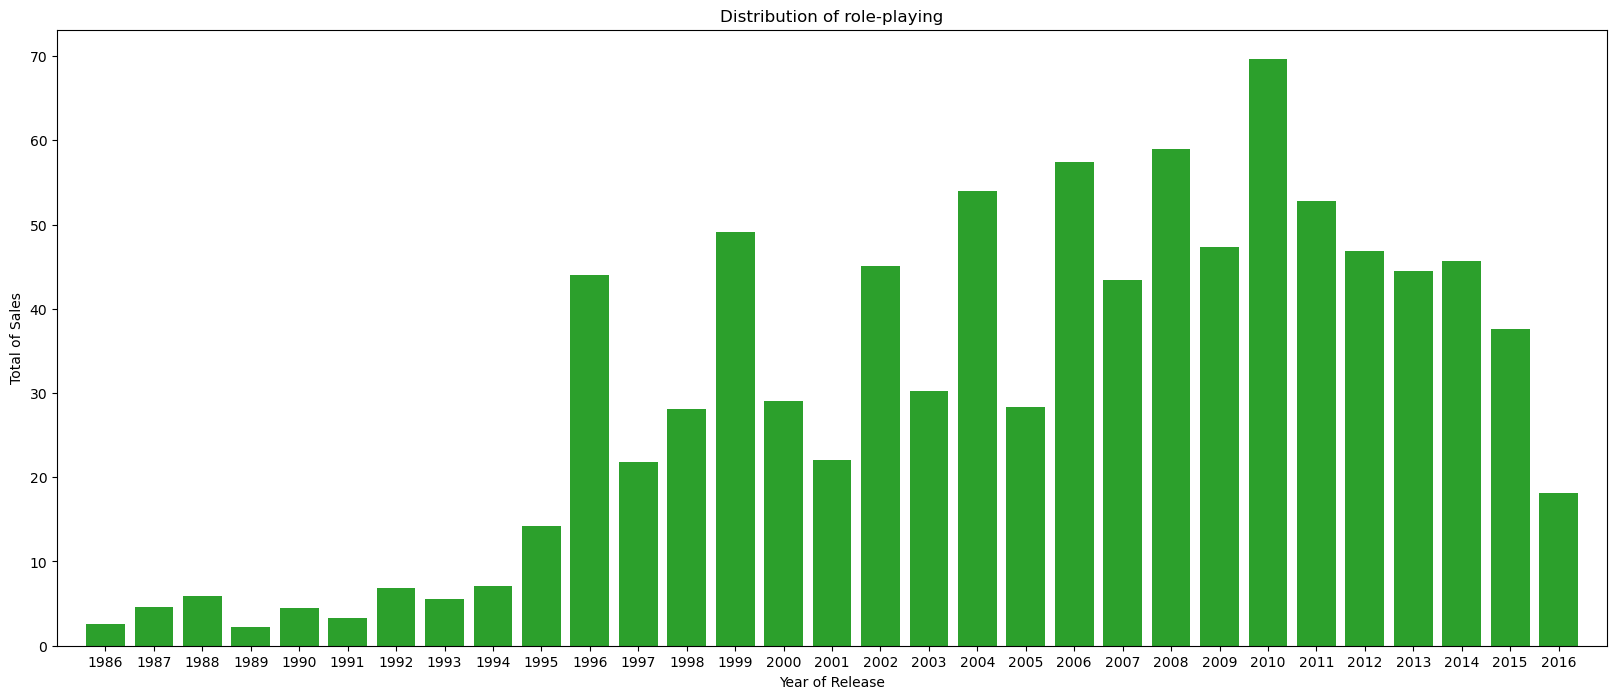

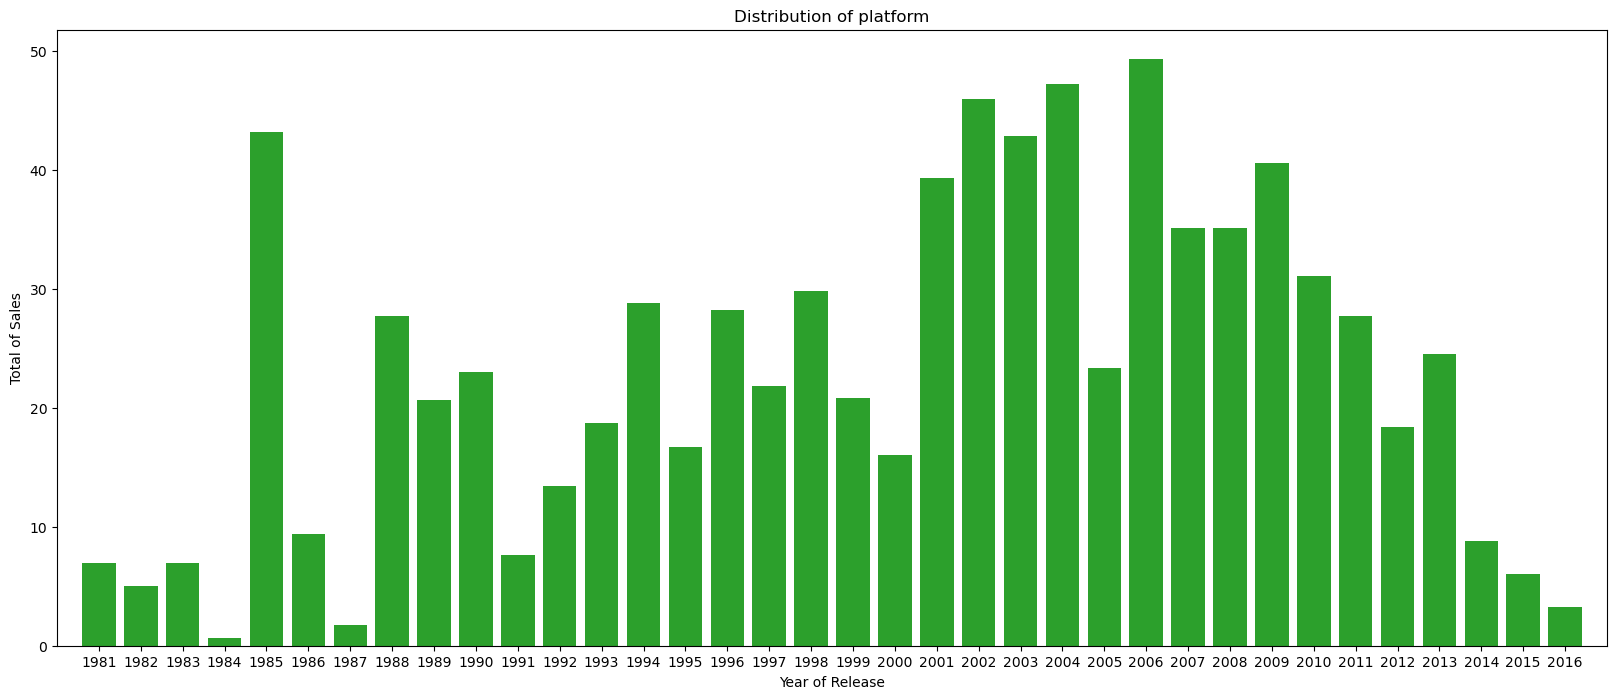

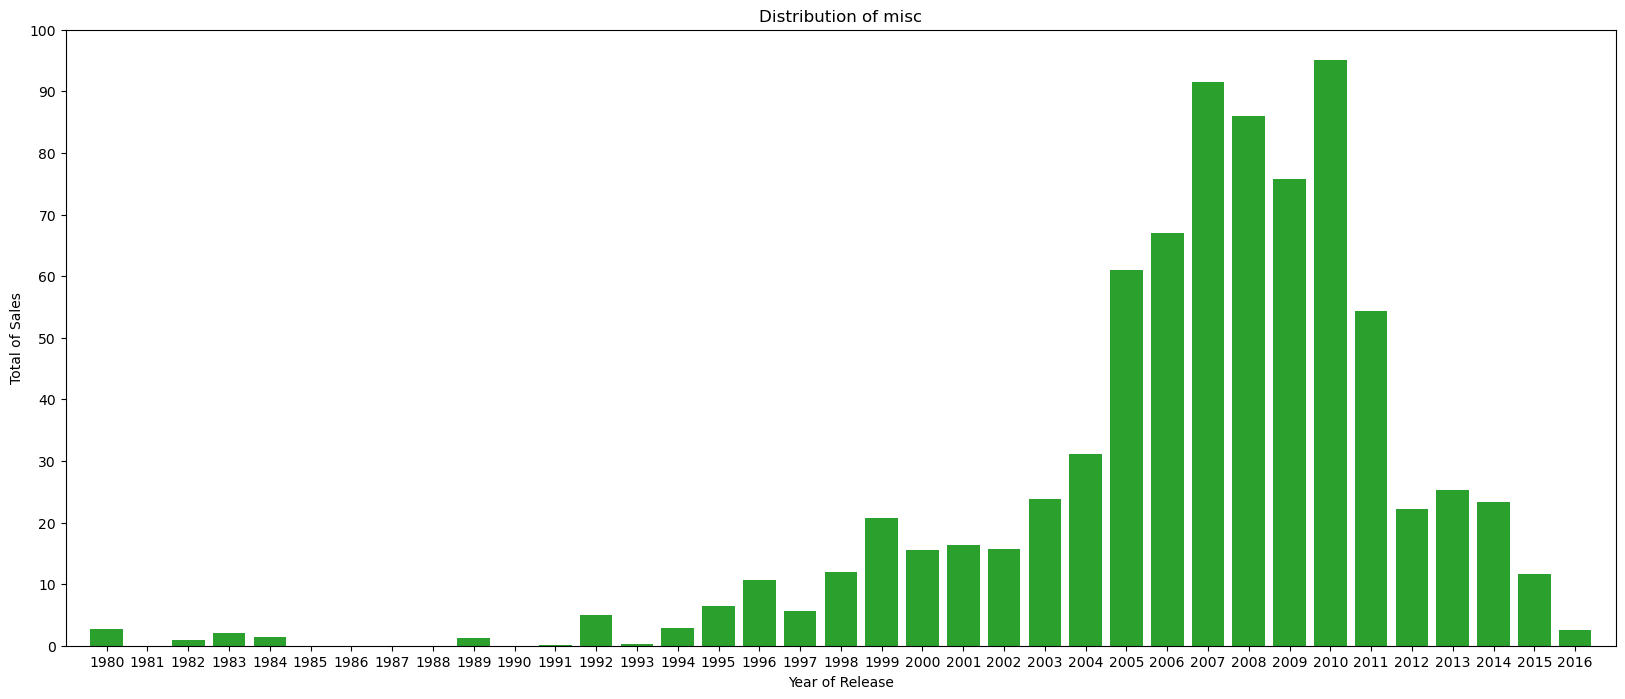

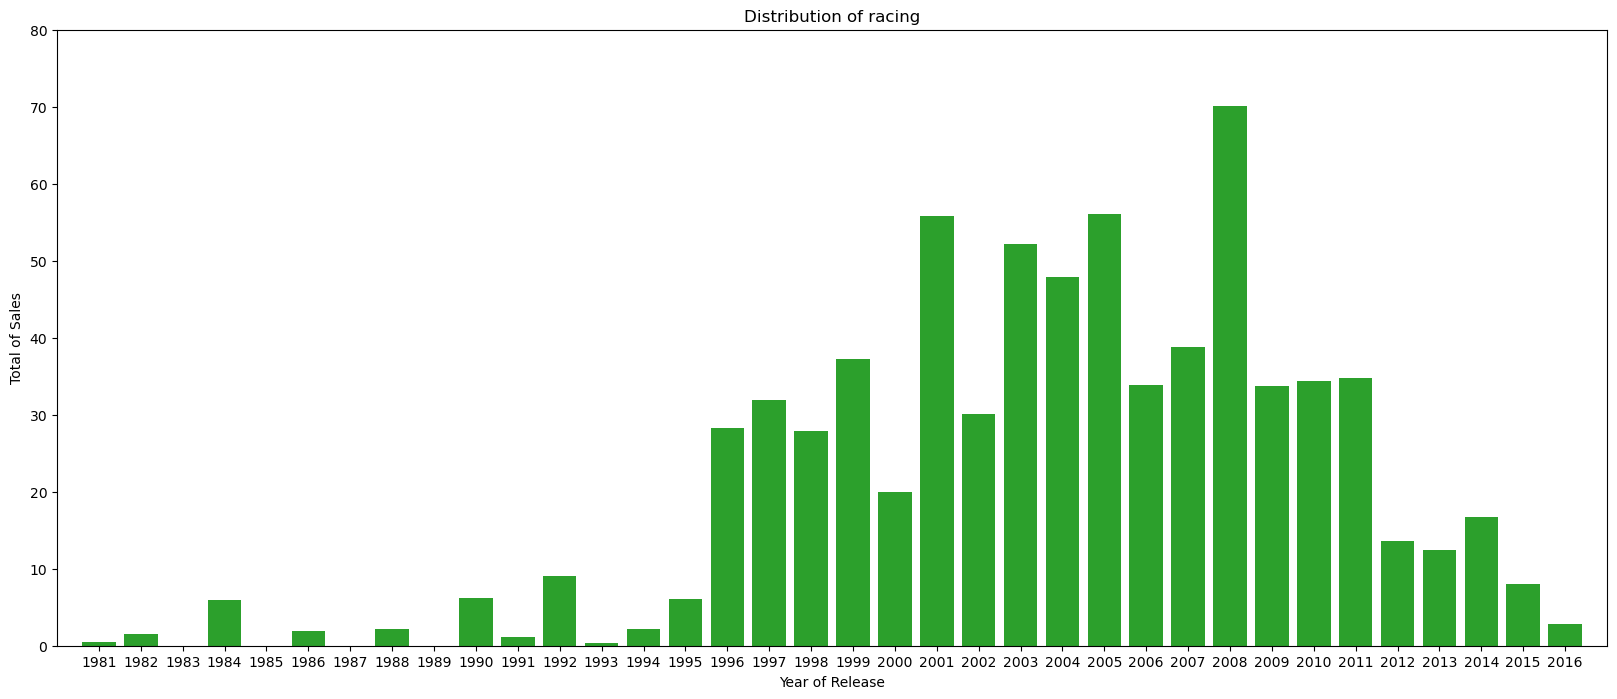

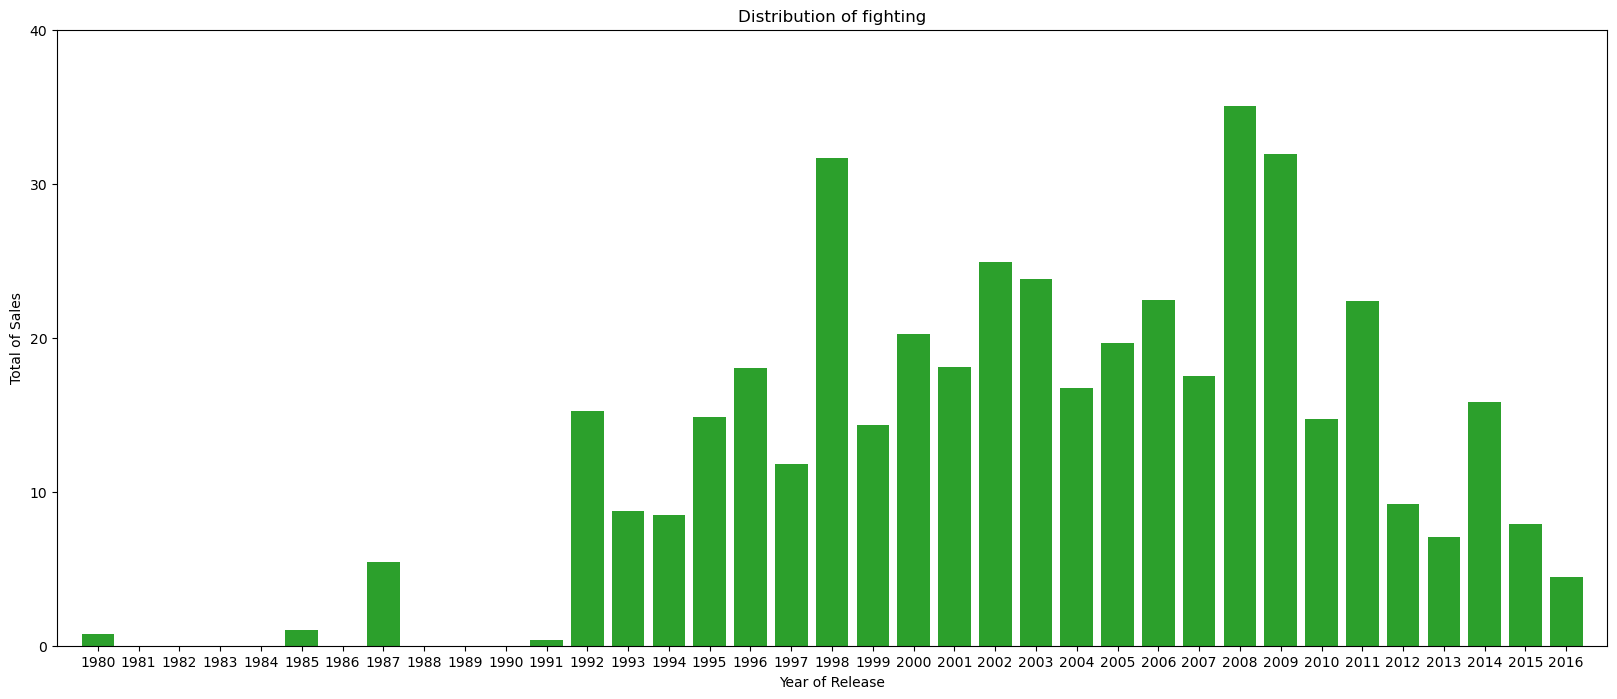

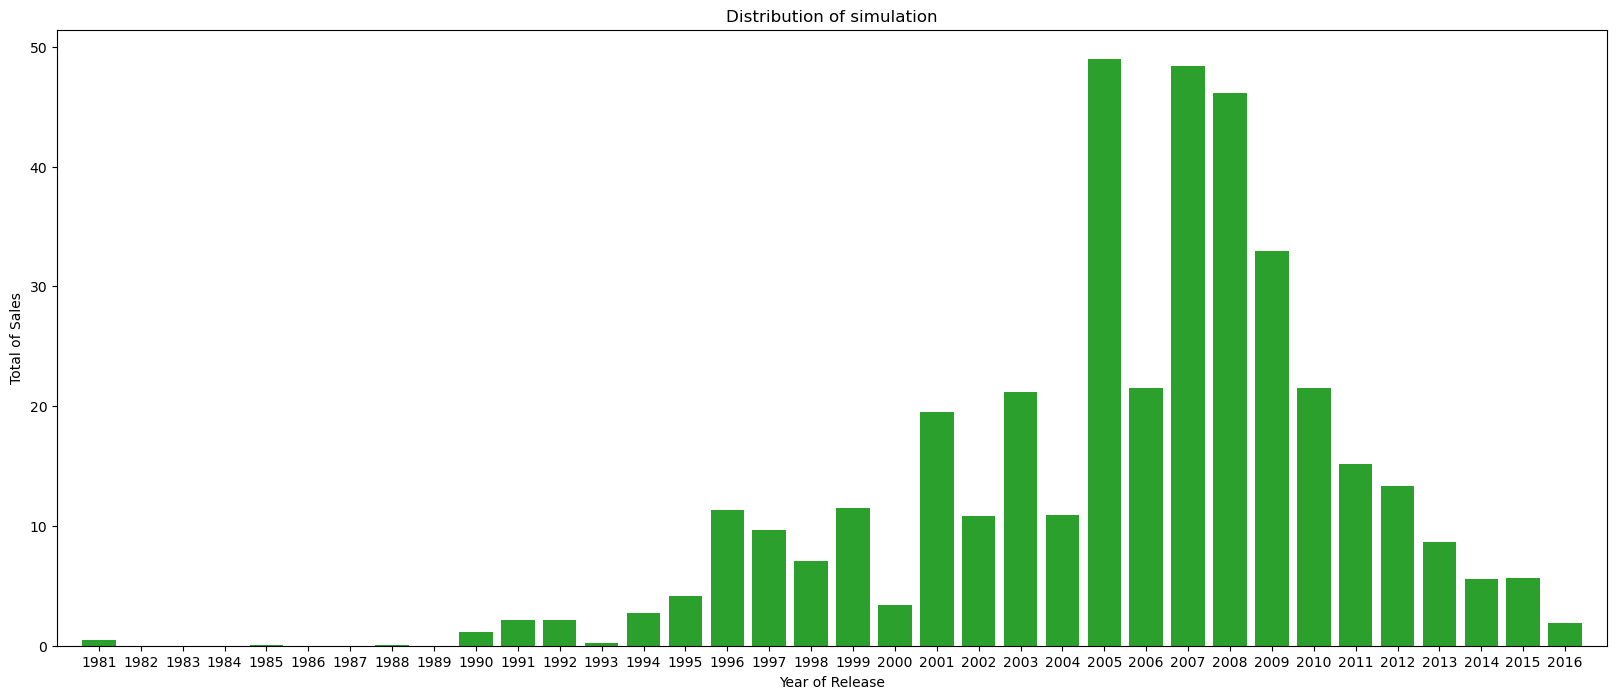

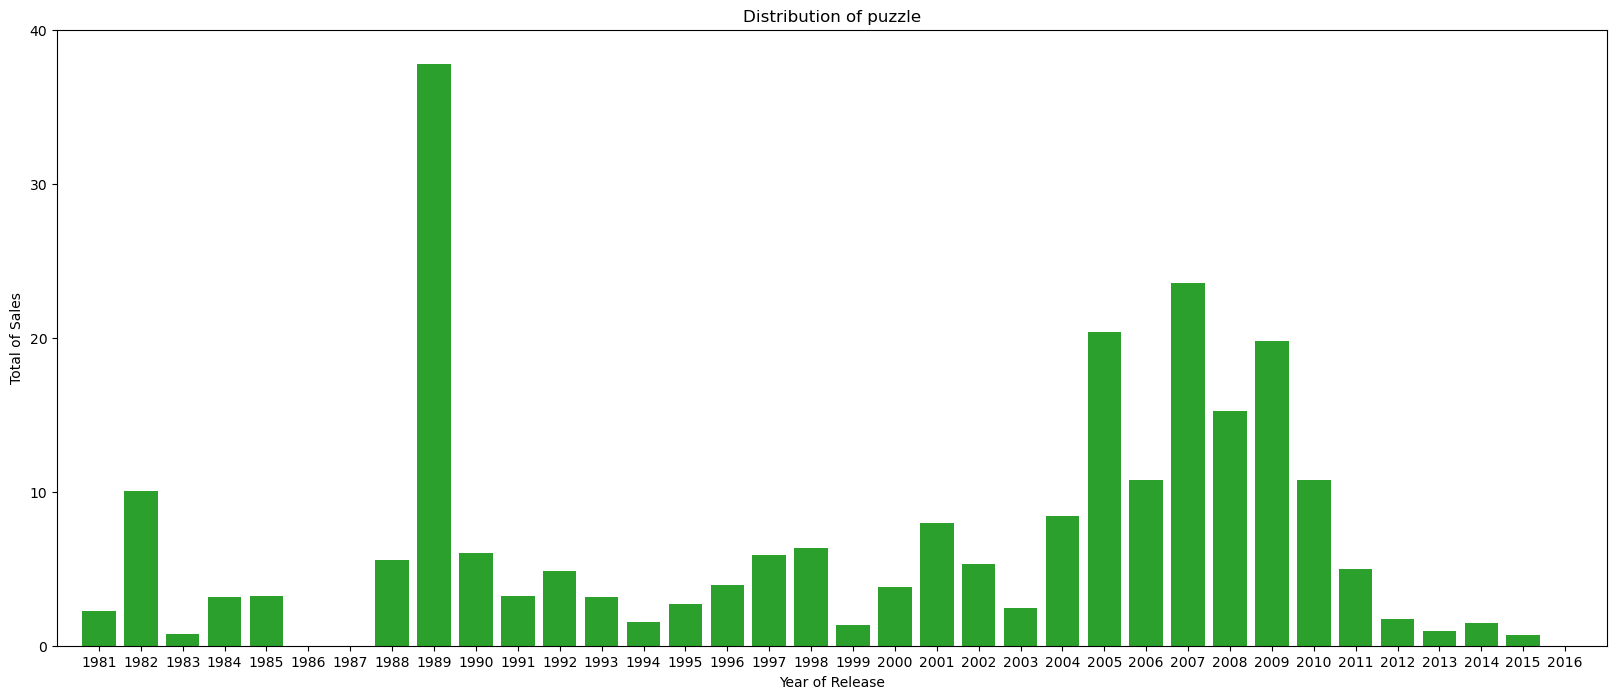

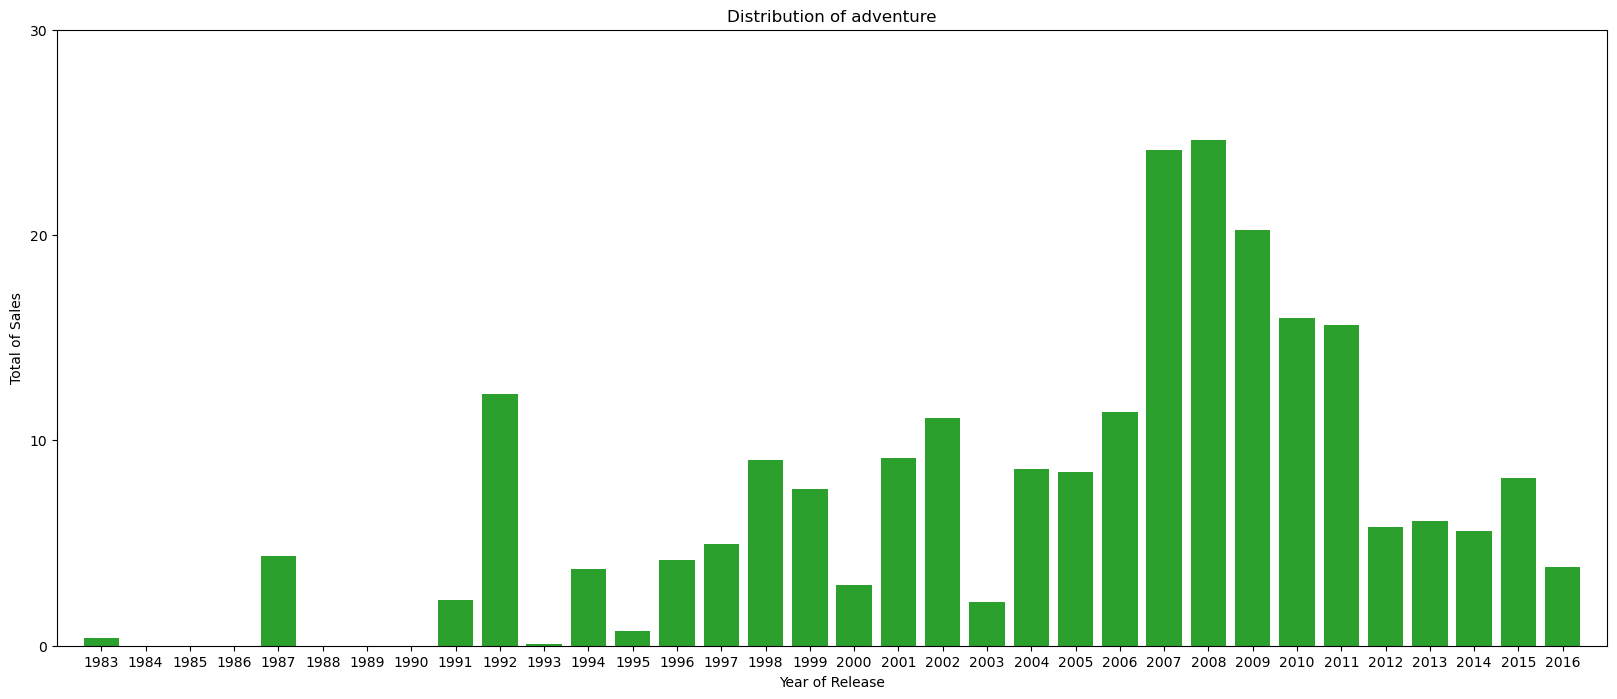

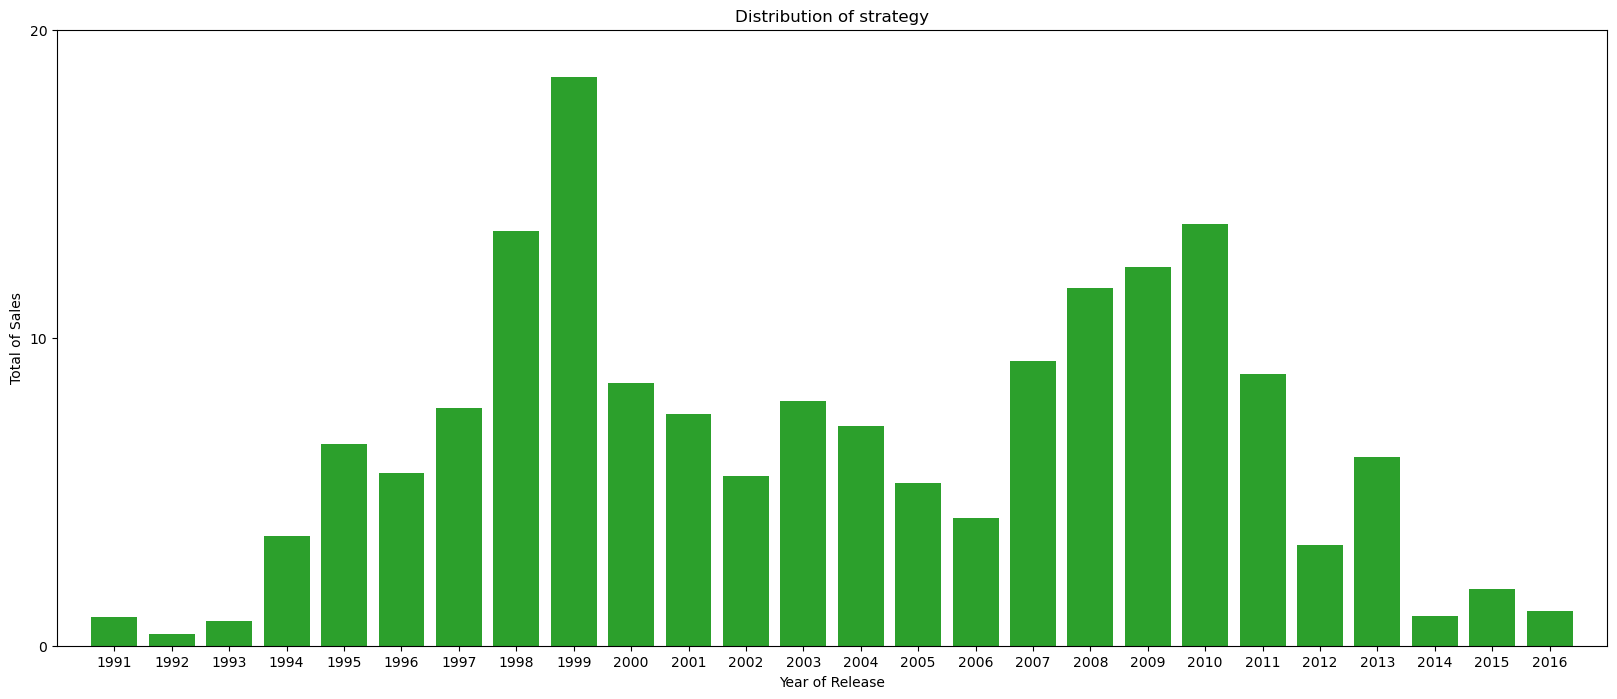

In [102]:
for genre in ice_genre_best_gen['genre']:
    scores(genre)

## Paso 4  Crea un perfil de usuario para cada región. Para cada región (NA, UE, JP) determina:

### 4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

En la región Na la plataforma que más ventas tiene es X360, PS2 y Wii. Es la región que tiene mayor número de ventas en sus 5 plataformas principales. Incluso la quinta plataforma con mayor número de ventas en na es mayor a las ventas de la primera plataforma de la región Eu. En la región Eu las principales plataformas son PS3, PS2 y X360. Sus 5 principales plataformas tienen mayores ventas que la principal plataforma de la región JP. Aqui la distribución es muy distinta a la de las primeras regiones porque predominan DC, PS y PS2, que casualmente son plataformas que tienen ventas limitadas. 

In [106]:
ice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [107]:
na_df=ice_df[['name','platform','year_of_release','genre','na_sales','critic_score','user_score','rating']]
na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   critic_score     8137 non-null   float64
 6   user_score       10014 non-null  float64
 7   rating           16715 non-null  object 
dtypes: float64(3), int32(1), object(4)
memory usage: 979.5+ KB


In [108]:
na_region=na_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
ice_df_totals = ice_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
display(na_region.head(5))
# ice_df_totals.head(5)

platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40

In [109]:
eu_df=ice_df[['name','platform','year_of_release','genre','eu_sales','critic_score','user_score','rating']]
eu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   eu_sales         16715 non-null  float64
 5   critic_score     8137 non-null   float64
 6   user_score       10014 non-null  float64
 7   rating           16715 non-null  object 
dtypes: float64(3), int32(1), object(4)
memory usage: 979.5+ KB


In [110]:
eu_region=eu_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
display(eu_region.head(5))

platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61

In [111]:
jp_df=ice_df[['name','platform','year_of_release','genre','jp_sales','critic_score','user_score','rating']]
jp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   jp_sales         16715 non-null  float64
 5   critic_score     8137 non-null   float64
 6   user_score       10014 non-null  float64
 7   rating           16715 non-null  object 
dtypes: float64(3), int32(1), object(4)
memory usage: 979.5+ KB


In [112]:
jp_region=jp_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
display(jp_region.head(5))

platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67

In [113]:
regions=na_region.merge(eu_region,on='platform',how='right')
regions=regions.merge(jp_region,on='platform',how='left')
regions=regions.merge(ice_df_totals,on='platform',how='left')
display(regions)

platform  na_sales  eu_sales  jp_sales  total_sales
0       PS2    583.84    339.29    139.20      1255.77
1       PS3    393.49    330.29     80.19       939.65
2      X360    602.47    270.76     12.43       971.42
3       Wii    496.90    262.21     69.33       907.51
4        PS    336.52    213.61    139.82       730.86
5        DS    382.40    188.89    175.57       806.12
6        PC     94.53    142.44      0.17       259.52
7       PS4    108.74    141.09     15.96       314.14
8       GBA    187.54     75.25     47.33       317.85
9       PSP    109.17     66.68     76.78       294.05
10      3DS     83.49     61.48    100.67       259.00
11       XB    186.69     60.95      1.38       257.74
12     XOne     93.12     51.59      0.34       159.32
13       GB    114.32     47.82     85.12       255.46
14      N64    139.02     41.06     34.22       218.68
15       GC    133.46     38.71     21.58       198.93
16     WiiU     38.10     25.13     13.01        82.19
17      NES    125.94     21.15     98.65       251.05
18     SNES     61.23     19.04    116.55       200.04
19      PSV     12.58     13.12     21.91        54.07
20      GEN     21.05      6.05      2.70        30.77
21     2600     90.60      5.47      0.00        96.98
22       DC      5.43      1.69      8.56        15.95
23      SAT      0.72      0.54     32.26        33.59
24      SCD      1.00      0.36      0.45         1.86
25       WS      0.00      0.00      1.42         1.42
26     TG16      0.00      0.00      0.16         0.16
27     PCFX      0.00      0.00      0.03         0.03
28       GG      0.00      0.00      0.04         0.04
29      3DO      0.00      0.00      0.10         0.10
30       NG      0.00      0.00      1.44         1.44

In [114]:
ice_df_totals.head(5)
na_region.head()

platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40

In [115]:
##Porcentaje de ventas mundial
na_reg=na_region.merge(ice_df_totals,on='platform',how='right')
na_reg['market_share']= (na_reg['na_sales']/na_reg['total_sales'])*100
display(na_reg.head(5).sort_values(by='na_sales',ascending=False))
eu_reg=eu_region.merge(ice_df_totals,on='platform',how='left')
eu_reg['market_share']= (eu_reg['eu_sales']/eu_reg['total_sales'])*100
display(eu_reg.head(5).sort_values(by='eu_sales',ascending=False))
jp_reg=jp_region.merge(ice_df_totals,on='platform',how='left')
jp_reg['market_share']= (jp_reg['jp_sales']/jp_reg['total_sales'])*100
display(jp_reg.head(5).sort_values(by='jp_sales',ascending=False))

platform  na_sales  total_sales  market_share
1     X360    602.47       971.42     62.019518
0      PS2    583.84      1255.77     46.492590
3      Wii    496.90       907.51     54.754218
2      PS3    393.49       939.65     41.876231
4       DS    382.40       806.12     47.437106

platform  eu_sales  total_sales  market_share
0      PS2    339.29      1255.77     27.018483
1      PS3    330.29       939.65     35.150322
2     X360    270.76       971.42     27.872599
3      Wii    262.21       907.51     28.893346
4       PS    213.61       730.86     29.227212

platform  jp_sales  total_sales  market_share
0       DS    175.57       806.12     21.779636
1       PS    139.82       730.86     19.130887
2      PS2    139.20      1255.77     11.084832
3     SNES    116.55       200.04     58.263347
4      3DS    100.67       259.00     38.868726

### 4.2 Los cinco géneros principales. Explica la diferencia.

Tanto Eu como Na tienen el mismo comportamiento en cuanto a sus principales generos consumidos, con una pequeña variación. Están en el siguiente orden action, sports, shooter, platform y misc. En Eu la diferencia está en que en lugar de platform se ubica el genero de racing. Sorpresivamente en la región Jp en primer lugar se encuentra el genero de role-playing, después action, sports, platform y misc. 

In [118]:
def graph_gen(reg):
    if reg == 'na':
        graph = na_gen_prf['genre']
        hg = na_gen_prf['na_sales']
    elif reg == 'eu':
        graph = eu_gen_prf['genre']
        hg = eu_gen_prf['eu_sales']
    elif reg == 'jp':
        graph = jp_gen_prf['genre']
        hg = jp_gen_prf['jp_sales']
    else:
        print("Región no válida. Usa 'na', 'eu' o 'jp'.")
        return

    # Gráfico solo si se define correctamente
    plt.figure(figsize=(10, 6))
    plt.bar(x=graph, height=hg, alpha=0.6,color='pink')
    plt.ylim(0, 900)
    plt.yticks(np.arange(0, 901, 30))
    plt.title(f"Ventas por género en la región {reg.upper()}")
    plt.xlabel("Género")
    plt.ylabel("Ventas")
    plt.xticks(rotation=45)
    plt.show()

In [119]:
na_gen_pr=na_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_gen_prf=na_gen_pr.head()
display(na_gen_prf)

genre  na_sales
0    action    879.01
1    sports    684.43
2   shooter    592.24
3  platform    445.50
4      misc    407.27

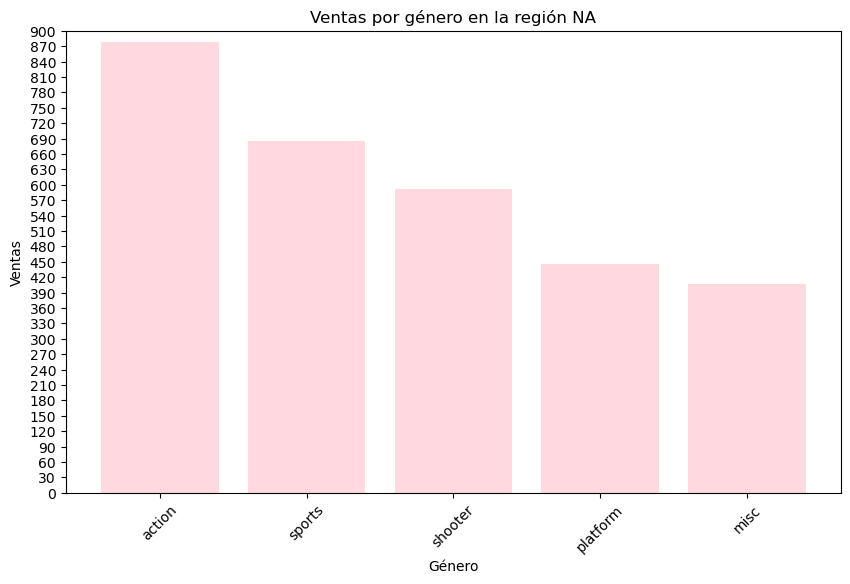

In [120]:
graph_gen('na')

In [121]:
eu_gen_pr=eu_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_gen_prf=eu_gen_pr.head()
display(eu_gen_prf)

genre  eu_sales
0   action    519.13
1   sports    376.79
2  shooter    317.34
3   racing    236.51
4     misc    212.74

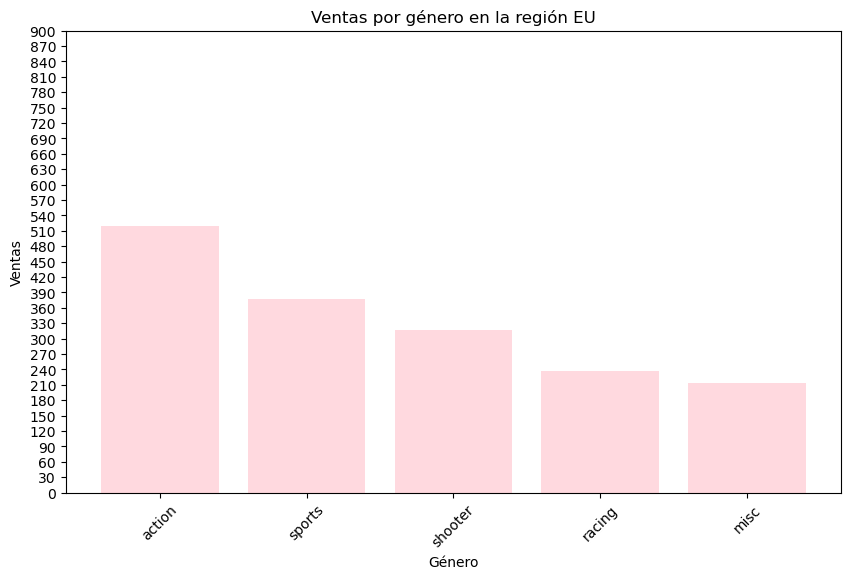

In [122]:
graph_gen('eu')

In [123]:
jp_gen_pr=jp_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_gen_prf=jp_gen_pr.head()
display(jp_gen_prf)

genre  jp_sales
0  role-playing    355.41
1        action    161.43
2        sports    135.54
3      platform    130.83
4          misc    108.11

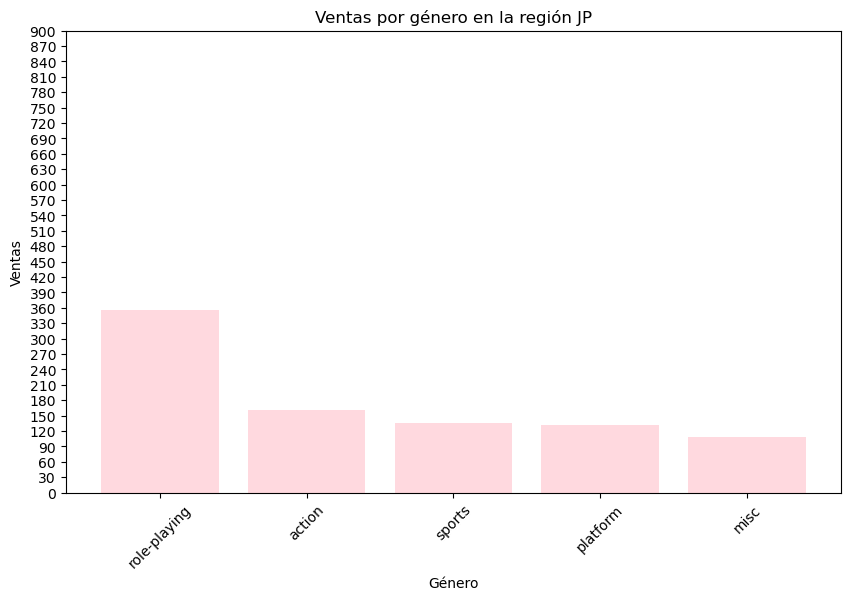

In [124]:
graph_gen('jp')

### 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

No se observa una afectación significativa en las ventas individuales según las clasificaciones de ESRB, ya que en todas las clasificaciones, la región de NA domina, seguida de EU, y finalmente JP. Sin embargo, en la segunda gráfica, se destaca una variación en las clasificaciones AO (Adults Only) y EC (Early Childhood). En particular, JP no tiene ventas para la clasificación AO, lo que podría indicar que los juegos con esta clasificación no son populares o accesibles en esta región, posiblemente debido a restricciones culturales o de mercado. Por otro lado, la clasificación EC muestra ventas muy reducidas, pero esto no es tan relevante, ya que no representa una restricción por edad, sino una clasificación que podría no ser tan atractiva para una audiencia más amplia.

En la clasificación KA (Kids to Adults), observamos que Europa tiene ventas notablemente reducidas en comparación con otras regiones. Sin embargo, esto no parece estar relacionado con alguna limitación de edad, ya que la clasificación KA permite que tanto niños como adultos jueguen. La diferencia podría deberse a factores de mercado o preferencias culturales en cada región, pero no necesariamente a una restricción de edad. Es aquí donde Japón tiene un mayor número de ventas, que puede indicar que es más probable que lleven a cabo la compra siempre y cuando tengan esta clasificación.

In [127]:
ice_class=ice_df.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
ice_class['total']=(ice_class['na_sales']+ice_class['eu_sales']+ice_class['jp_sales'])
ice_class=ice_class.sort_values(by='total',ascending=False).reset_index()
ice_class=ice_class[ice_class['rating']!='unknown']
# ice_class=ice_class[ice_class['index']!='unknown']
display(ice_class)

rating  na_sales  eu_sales  jp_sales    total
1      E   1292.99    710.25    198.11  2201.35
2      T    759.75    427.03    151.40  1338.18
3      M    748.48    483.97     64.24  1296.69
4   E10+    353.32    188.52     40.20   582.04
5    K-A      2.56      0.27      1.46     4.29
6     AO      1.26      0.61      0.00     1.87
7     EC      1.53      0.11      0.00     1.64
8     RP      0.00      0.08      0.00     0.08

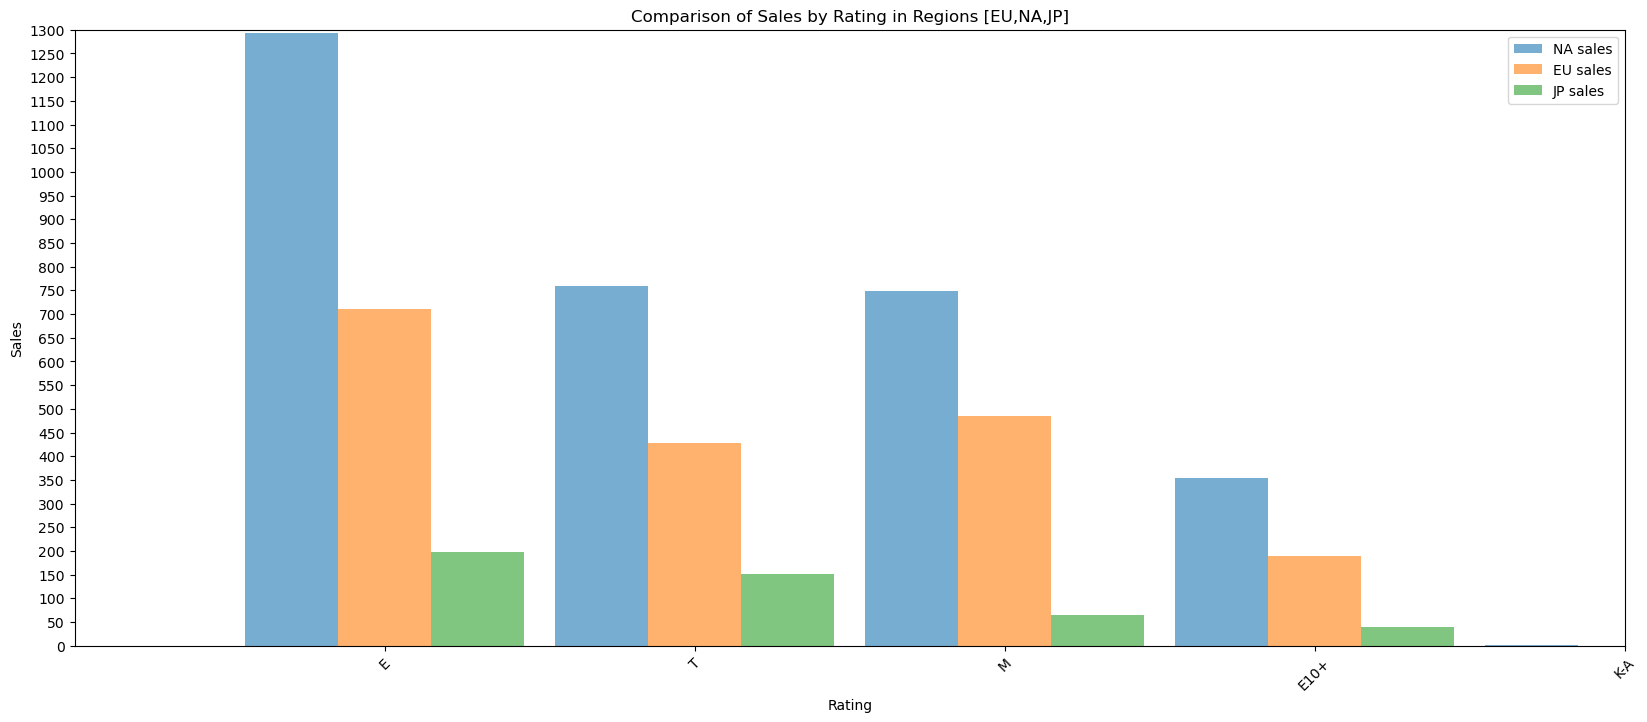

In [128]:
x=np.arange(len(ice_class['rating']))
width=0.3
plt.figure(figsize=(20,8))
plt.bar(x - width,ice_class['na_sales'],alpha=0.6,width=width,label='NA sales')
plt.bar(x,ice_class['eu_sales'],alpha=0.6,width=width,label='EU sales')
plt.bar(x + width,ice_class['jp_sales'],alpha=0.6,width=width,label='JP sales')
plt.ylim(0,1300)
plt.legend()
# plt.xlim(-1,4)
plt.yticks(np.arange(0,1350,50))
# plt.xticks(np.arange(0,4,1))irs
ice_class_1= ice_class['rating'].iloc
plt.xticks(ticks=x, labels=ice_class['rating'], rotation=45)
plt.xlim(-1,4)
plt.xlabel('Rating')  
plt.ylabel('Sales') 
plt.title('Comparison of Sales by Rating in Regions [EU,NA,JP]') 
plt.show()

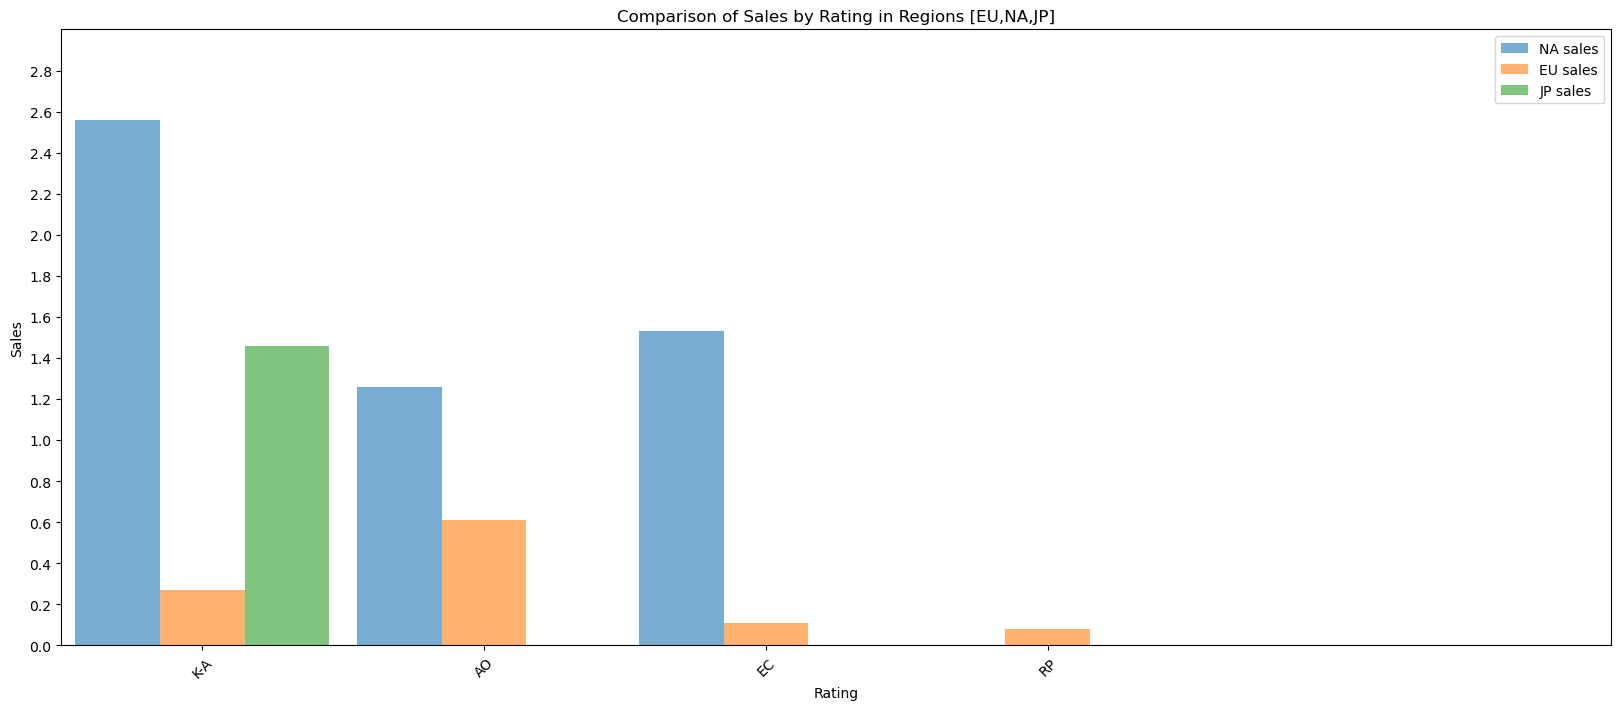

In [129]:
x=np.arange(len(ice_class['rating']))
width=0.3
plt.figure(figsize=(20,8))
plt.bar(x - width,ice_class['na_sales'],label='NA sales',alpha=0.6,width=width)
plt.bar(x,ice_class['eu_sales'],label='EU sales',alpha=0.6,width=width)
plt.bar(x + width,ice_class['jp_sales'],label='JP sales',alpha=0.6,width=width)
plt.ylim(0,3)
# plt.xlim(3.5,9)
plt.yticks(np.arange(0,3,0.2))
plt.xticks(ticks=x, labels=ice_class['rating'], rotation=45)
plt.xlim(3.5,9)
plt.xlabel('Rating')  
plt.ylabel('Sales') 
plt.title('Comparison of Sales by Rating in Regions [EU,NA,JP]') 
plt.legend()
plt.show()

## Paso 5. Prueba las siguientes hipotesis

Una hipotesis nula plantea que no existe diferencia significativa entre las varibales que se están comparando. Desde ahí se parte en una prueba estadística porque representa la suposición inicial que se intenta refutar. Cuando se encuentra la evidencia para rechazar la hipotesis nula con base en los datos se plantea la hipotesis alternativa que establece que existe una diferencia significativa entre las varibales que se están comparando. En ella se formula que los grupos a comparar no son iguales porque una variable es mayor o menor a la otra.
En la hipótesis uno se tiene una hipotesis nula porque se dice que ambas variables tienen el mismo valor debido a la variabilidad natural de los datos y su hipotesis alternativa sería que los valores fueran diferentes significativamente entre sí.
La segunda hipótesis es una hipótesis alternativa debido a que indica que los valores comparados son diferentes, en este caso se debe consutruir la hipótesis nula donde se dirá que las calificaciones promedio entre esos dos generos son iguales.

El valor de alpha a considerar en la prueba t-student fue de 0.05 porque es comunmente el más utilizado, es un equilibrio entre ser demasiado estricto y ser demasiado flexible a cometer un error tipo I. La prueba t es ideal para evaluar si las diferencias observadas entre estas medias son estadísticamente significativas. Es robusta ante pequeñas desviaciones de normalidad, especialmente con muestras de tamaño moderado o grande. Antes de realizar la prueba se revisan si las varianzas de los dos grupos son iguales. Si es así, establece este parámetro equal_var en True y la varianza de cada muestra se estimará a partir del dataset combinado de las dos muestras, no por separado para cada una.

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Hipótesis 1

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Hipótesis 2 

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [136]:
ice_Xone=ice_df[(ice_df['platform']=='XOne')]

In [137]:
# display(ice_Xbox)

In [138]:
ice_PC=ice_df[(ice_df['platform']=='PC')]
display(ice_PC)

name platform  year_of_release  \
85                            The Sims 3       PC             2009   
138                    World of Warcraft       PC             2004   
192                           Diablo III       PC             2012   
195           Microsoft Flight Simulator       PC             1996   
218       StarCraft II: Wings of Liberty       PC             2010   
...                                  ...      ...              ...   
16690                     Pony Friends 2       PC             2009   
16692  Metal Gear Solid V: Ground Zeroes       PC             2014   
16696                             Breach       PC             2011   
16702            STORM: Frontline Nation       PC             2011   
16705                            15 Days       PC             2009   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
85       simulation      0.99      6.42       0.0         0.60           8.6   
138    role-playing      0.08      6.21       0.0         0.00           9.3   
192    role-playing      2.44      2.16       0.0         0.54           8.8   
195      simulation      3.22      1.69       0.0         0.20           NaN   
218        strategy      2.57      1.68       0.0         0.58           9.3   
...             ...       ...       ...       ...          ...           ...   
16690    simulation      0.00      0.01       0.0         0.00           NaN   
16692        action      0.00      0.01       0.0         0.00           8.0   
16696       shooter      0.01      0.00       0.0         0.00           6.1   
16702      strategy      0.00      0.01       0.0         0.00           6.0   
16705     adventure      0.00      0.01       0.0         0.00           6.3   

       user_score   rating  total_sales  
85            7.6        T         8.01  
138           7.3        T         6.29  
192           4.0        M         5.14  
195           NaN  unknown         5.11  
218           8.2        T         4.83  
...           ...      ...          ...  
16690         NaN  unknown         0.01  
16692         7.6        M         0.01  
16696         5.8        T         0.01  
16702         7.2     E10+         0.01  
16705         5.8  unknown         0.01  

[974 rows x 12 columns]

In [150]:
# Prueba las hipótesis 1
Xone=ice_Xone['user_score'].dropna()
Xone_mean=Xone.mean()
PC=ice_PC['user_score'].dropna()
PC_mean=PC.mean()
display(f'la varianza de XOne es {Xone.var()} ')
display(f'la varianza de PC es {PC.var()} ')
print(f'Promedio de PC {PC_mean}')
print(f'Promedio de Xone {Xone_mean}')

alpha = 0.05

results=st.ttest_ind(Xone,PC,equal_var=False)

print('valor p:',results.pvalue)# tu código: imprime el valor p obtenido)

if (results.pvalue<alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    

'la varianza de XOne es 1.8158268566493942 '

'la varianza de PC es 2.200648175513706 '

Promedio de PC 7.0647130647130645
Promedio de Xone 6.55440414507772
valor p: 5.138108155955271e-06
Rechazamos la hipótesis nula


In [142]:
ice_action=ice_df[(ice_df['genre']=='action')]
ice_sports=ice_df[(ice_df['genre']=='sports')]

In [148]:
# Prueba las hipótesis 2
action=ice_action['user_score'].dropna()
action_mean=action.mean()
print(f'la varianza de action es {action.var()} ')
sports=ice_sports['user_score'].dropna()
sports_mean=sports.mean()
print(f'la varianza de sports es {sports.var()} ')
print(f'Promedio de acción {action_mean}')
print(f'Promedio de deportes {sports_mean}')
alpha = 0.05

results=st.ttest_ind(action,sports,equal_var=True)

print('valor p:',results.pvalue)# tu código: imprime el valor p obtenido)

if (results.pvalue<alpha):# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

la varianza de action es 1.6855890387584582 
la varianza de sports es 1.8925072711756803 
Promedio de acción 7.061876699909338
Promedio de deportes 6.999010554089709
valor p: 0.15671747864039545
No podemos rechazar la hipótesis nula


## Paso 6 Escribe una conclusión general

Paso 1
Debe ser una costumbre anotar todas aquellas liibrerías que se utilizan al inicio de un notebook o un código para descartar el error que se genera cuando el archivo no encuentra un método. Por lo que una buena práctica es aprenderse las librerías que se van a utilizar con las abreviaciones de siempre para que los comandos que se escriban se ejecuten sin problema.

Paso2
El acondicionamiento de los datos es un paso que puede beneficiarte en cuestiones de ahorrar tiempo o perjudicarte debido a que el tipo de valores no te ayuda a seguir con el proyecto. Como es un paso que debe de tener perspicacia por parte del analizador.Donde se debe de pensar que se pueden hacer con esos datos; si es que graficarlos ayudaría a resolver una incógnita en mente, si se pueden hacer tablas, graficar o calcular valores importantes. La práctica ayuda a saberse anticipar ante estas posibles opciones a desarrollar. Si al menos no se acierta en todas, se debe de identificar en donde se puede volver a intervenir para que los datos de una columan sirvan para responder una pregunta. De igual forma al ser el primer paso, se debe de verificar que no se dejen valores ausentes indeseables por error, y que los valores de los que no se tienen registro y se planean dejar como desconocidos se puedan identificar como tal. Más por el hecho que quizá textualmente no se etiqueten con esa palabra, pero que con suma atención se idenfique bajo un código propio. En el caso númerico habrá ocasiones que exista un string que esté en espera de un valor númerico a futuro, por lo tanto es útil asignarle un valor promedio cuando se traten de muchos datos dentro del dataframe, para que de esta forma se consideren otros datos que porte en otras categorías. En el caso de las fechas, cuando se trate de solamente años y que no posean días o meses, se pueden manejar como enteros y seguir trabajando. Porque a veces la costumbre nos hace dejar esos valores en datetime, pero cuando se encuentran datos sencillos lo mejor es procesarlos a conveniencia y sin que se afecte lo que se tiene registrado.Con ello, se debe de tener un registro de en que tipos de datos se dejan las columnas por si se debe de hacer un tratamiento más adelante. Con el dataframe limpio se puede proseguir con el paso de ver si no le hace falta un valor que se pueda obtener de los que se tienen, la suma de algunos valores para unificar un valor total o la resta de valores para detectar diferencias. Aquí fue el caso de crear una columan con las ventas totales de las 3 regiones a evaluar. 

Paso 3
En el siguiente paso se realizó un filtro que permitió trabajar más comodamente el dataframe ya que a pesar de apreciar toda la información que se puede convertir en una vistoza distribución, para ajustarlo a nuestro objetivo de predecir el mercado para 2017, se acorta el amplio rando de años que contienen datos de las plataformas y de los videojuegos individuales. Las distribuciones nos relatan los números que se tuvieron durante un periodo de tiempo y como es que se siguen comportando. Más alla de ver barras subir o bajar existen factores culturales y económicos que explican el comportamiento. Se debe en su gran mayoría a la inversión en las plataformas. Las ventas están intimamente relacionadas con el número de estrenos de la plataforma y esto a su vez, con el nacimiento de algo nuevo o el decamiento de lo viejo. Una plataforma que tiene pocos estrenos nos habla de que es aquella en la que ya no están invirtiendo tanto tiempo o dinero por parte de los dueños, y muy probablemente lleven todos esos recursos a otra plataforma en desarrollo.  Aunque directamente el dataframe no te dice cuando emergió una plataforma o cuando fue cuando la declararon como descontinuada, los datos nos dan por si solos esas variables y las distribuciones es muy evidente que año se comenzó a comercializar la plataforma junto con sus juegos. Se tomaron valores de 2012 a 2016 para observar de manera más clara los números que estaban teniendo las plataformas y el número de estrenos en 5 años antes al año 2017. Con la finalidad de identificar de forma más sencilla las plataformas próximas a considerarse muy rentables. Gracias a esto se pudo concluir que PS4, Xone, PC, 3DS y WiiU son las plataformas que tienen más rentabilidad a futuro para el año en cuestión. Las plataformas lideres en ventas se espera que sean alcanzadas por estas plataformas potenciales ya que sus números de ventas están aumentando cada vez más. En general, los juegos del año, es decir, los del 2016 en las distribuciones, se ven con ventas promedio, pero se pronostica que el siguiente año tengan un repunte igual a los juegos del 2014 y 2015, ya que sean más populares y conocidos por la audiencia. El mercado de videojuegos es muy cambiente porque para las plataformas que tienen mayores ventas no es una garantía que siempre vayan a tener ventas constantes. A pesar de que algunas siguen teniendo entregas en el último año, con ayuda de otros años se  puede identificar que tanta popularidad está ganando o perdiendo. El diagrama de caja nos enseña la variabilidad de las ventas y el porcentaje de datos que se encuentran en valores específicos, junto con los promedios de ventas de cada plataforma y los valores fuera de rango. Un buen indicador para afirmar que las plataformas seleccionadas serán populares fueron los puntajes de crítica y de usuario porque se encontro que entre mayor sea la puntuación crítica escalada a la puntuación de usuario mejores ventas poseerá.  Incluso en las ventas de los videojuegos multiplataforma se observan las ventas de las plataformas que se seleccionaron. Siendo un punto crucial en el mercado debido a que nos habla de que son muy tomadas en cuenta algunas plataformas para adaptar los videojuegos a ellas, y además el usuario las consume. 

Paso 4
Entrando un poco en lo particular, se hizo el análisis de los generos más destacados a nivel global y después a nivel región. La region Na resulta ser la más consumidora de videojuegos, la region Eu tiene un comportamiento similar en cuanto a los generos más populares pero con menores números de venta, y por último la región Jp si tiene cambios en los generos ya que los juegos de role-playing son los más comprados. En general, la región Jp apoya a diferentes plataformas a comparación de Eu y Na. A nivel mundial los generos más populares fueron action y sports, que incluso en los juegos con más entregas entre plataformas se puede observar la prevalencia.

Paso 5
En la Hipótesis 1, donde se compararon las calificaciones promedio de los usuarios entre Xbox One y PC, se encontró una diferencia estadísticamente significativa con un valor p de 5.14×10−6 que es menor que el umbral de α=0.05. Esto llevó a rechazar la hipótesis nula y concluir que las calificaciones promedio entre estas dos plataformas no son iguales. Los usuarios calificaron a PC con un promedio de 7.06, significativamente más alto que el promedio de Xbox One de 6.55. Aunque las varianzas no son idénticas (1.82 para Xbox One y 2.20 para PC), el análisis estadístico ajustó este aspecto, validando la conclusión. En la Hipótesis 2, que evaluó si las calificaciones promedio para los géneros de Acción y Deportes eran diferentes, no se encontraron diferencias estadísticamente significativas con un valor p de 0.157, mayor que el umbral de α=0.05. Esto nos impide rechazar la hipótesis nula, lo que sugiere que las calificaciones promedio de los usuarios son similares entre ambos géneros. Los promedios de 7.06 y de 7.00, de acción y deporte respectivamente. Los promedios son cercanos, y las varianzas (1.69 para Acción y 1.89 para Deportes) también reflejan una percepción uniforme de calidad o satisfacción entre estos géneros por parte de los usuarios.